# VL04 설비 기준 EDA 및 분석 (Shot 기준)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 200)

In [3]:
os.getcwd()

'D:\\jupyter\\01_Sangwoo_Project\\03_Project\\03_GyengnamTP\\03_Collecting_data'

In [4]:
file_list = os.listdir('D:\\jupyter\\01_Sangwoo_Project\\03_Project\\03_GyengnamTP\\03_Collecting_data')
file_list

['.ipynb_checkpoints',
 '01_Electronic_current',
 '02_Vibration',
 '03_SQL순서(파라미터기준)',
 'clustering_kimdaehyun.ipynb',
 'Collecting_data.ipynb',
 'Daeshin_parameter_detail_220704.csv',
 'Daeshin_parameter_detail_220705.csv',
 'Daeshin_parameter_detail_220706.csv',
 'Daeshin_parameter_detail_220707.csv',
 'Daeshin_parameter_detail_220708.csv',
 'Daeshin_parameter_detail_220709.csv',
 'Daeshin_parameter_detail_220710.csv',
 'Daeshin_parameter_detail_220711.csv',
 'Daeshin_parameter_detail_220712.csv',
 'Daeshin_parameter_detail_220713.csv',
 'Daeshin_parameter_detail_220714.csv',
 'Daeshin_parameter_detail_220715.csv',
 'Daeshin_parameter_detail_220716.csv',
 'Daeshin_parameter_detail_220717.csv',
 'Daeshin_parameter_detail_220718.csv',
 'Daeshin_parameter_detail_220719.csv',
 'Daeshin_parameter_detail_220720.csv',
 'Daeshin_parameter_detail_220721.csv',
 'Daeshin_parameter_detail_220725.csv',
 'Daeshin_parameter_detail_220726.csv',
 'Daeshin_parameter_detail_220729_0731.csv',
 'Daeshin_

In [5]:
file_list_csv = [file_csv for file_csv in file_list if file_csv.endswith('.csv')]
file_list_csv

['Daeshin_parameter_detail_220704.csv',
 'Daeshin_parameter_detail_220705.csv',
 'Daeshin_parameter_detail_220706.csv',
 'Daeshin_parameter_detail_220707.csv',
 'Daeshin_parameter_detail_220708.csv',
 'Daeshin_parameter_detail_220709.csv',
 'Daeshin_parameter_detail_220710.csv',
 'Daeshin_parameter_detail_220711.csv',
 'Daeshin_parameter_detail_220712.csv',
 'Daeshin_parameter_detail_220713.csv',
 'Daeshin_parameter_detail_220714.csv',
 'Daeshin_parameter_detail_220715.csv',
 'Daeshin_parameter_detail_220716.csv',
 'Daeshin_parameter_detail_220717.csv',
 'Daeshin_parameter_detail_220718.csv',
 'Daeshin_parameter_detail_220719.csv',
 'Daeshin_parameter_detail_220720.csv',
 'Daeshin_parameter_detail_220721.csv',
 'Daeshin_parameter_detail_220725.csv',
 'Daeshin_parameter_detail_220726.csv',
 'Daeshin_parameter_detail_220729_0731.csv',
 'Daeshin_parameter_detail_220801.csv',
 'Daeshin_parameter_detail_220802.csv',
 'Daeshin_parameter_detail_220803.csv',
 'Daeshin_parameter_detail_220804.c

# 사용데이터 정보

1. 22-07-22부터 07-25 14시49분까지 데이터 없음 -> 확인결과  2022-07-21 12시경 서버전원이 내려가면서 신호처리 서비스가 비정상적으로 종료
2. 2022-07-25 3시50분 경 데이터베이스 재시작
3. 07-22부터 07-25 2시49분까지 데이터 없음
4. 07-25일 데이터 부분적으로 존재하기 때문에 제외
5. 진동값 기준 0.2초 단위로 수집되는 것도 MIT 부서에서 13일 이후로 처리됨
6. 2022-07-13 15:09:29(index 1591144) 이후의 데이터로만 모델 수립 -> 따라서, 시작 : 07-14, 종료 : 07-20
7. 그러나, Tool1, Tool5, Tool9 교체 이력이 2022-07-10 09:36:40로 지정되어 있어 07-10부터의 데이터가 필요함
시작 : 07-10, 종료 : 07-20

# VL04 데이터 기준 처리(07-25 회의 결과)

1. VL04 설비의 spindle count가 2로 나오나 실제로는 1개가 맞음
2. 현재 VL04, VL05, VL06 설비가 팁 교체이력이 존재함
3. 현재 파손까지는 처리하지 않음
4. 팁을 자주교체 shift 마다 변경(예지보전)
5. 1개의 제품 가격이 약 200만원 정도

In [6]:
csv_df = pd.DataFrame()
for csv_idx in file_list_csv:
    read_csv = pd.read_csv(csv_idx)
    csv_df = pd.concat([csv_df, read_csv], axis = 0)
csv_df

,datetime,s_MC_No,tool_number,shot_no,s_ITEM_Name,work_type,spindle_count,axes,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,pos_x_2,pos_z_2,rpm,feed,load_1,load_2,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,2022-07-04 10:38:25.965127,VL01,101.0,14946.0,MD Retarder Housing,0,1.0,2.0,NaN,NaN,2035,NaN,130193.0,250.0,NaN,NaN,309.0,62.0,2.0,NaN,13.0,55.0,13.0,-55.0
1,2022-07-04 10:38:26.408913,VL01,101.0,14946.0,MD Retarder Housing,0,1.0,2.0,NaN,NaN,2037,NaN,131052.0,250.0,NaN,NaN,309.0,62.0,1.0,NaN,13.0,55.0,13.0,-55.0
2,2022-07-04 10:38:26.902217,VL01,101.0,14946.0,MD Retarder Housing,0,1.0,2.0,NaN,NaN,2037,NaN,131976.0,250.0,NaN,NaN,309.0,62.0,1.0,NaN,13.0,56.0,13.0,-56.0
3,2022-07-04 10:38:27.397398,VL01,101.0,14946.0,MD Retarder Housing,0,1.0,2.0,NaN,NaN,2035,NaN,133033.0,250.0,NaN,NaN,309.0,62.0,1.0,NaN,13.0,56.0,13.0,-56.0
4,2022-07-04 10:38:27.892503,VL01,101.0,14946.0,MD Retarder Housing,0,1.0,2.0,NaN,NaN,2035,NaN,134024.0,250.0,NaN,NaN,309.0,62.0,1.0,NaN,13.0,56.0,13.0,-56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155307,2022-08-23 23:59:59.039756,VL01,500.0,19484.0,MD Retarder Housing,1,1.0,2.0,0.0,3.0,0,252.0,640000.0,408342.0,NaN,NaN,0.0,0.0,0.0,NaN,1.0,64.0,-1.0,-64.0
2155308,2022-08-23 23:59:59.240095,VL01,500.0,19484.0,MD Retarder Housing,1,1.0,2.0,0.0,3.0,0,252.0,640000.0,408342.0,NaN,NaN,0.0,0.0,0.0,NaN,1.0,64.0,-1.0,-64.0
2155309,2022-08-23 23:59:59.470460,VL01,500.0,19484.0,MD Retarder Housing,1,1.0,2.0,0.0,3.0,0,252.0,640000.0,408342.0,NaN,NaN,0.0,0.0,0.0,NaN,1.0,64.0,-1.0,-64.0
2155310,2022-08-23 23:59:59.664977,VL01,500.0,19484.0,MD Retarder Housing,1,1.0,2.0,0.0,3.0,0,254.0,640000.0,408342.0,NaN,NaN,0.0,0.0,0.0,NaN,1.0,64.0,-1.0,-64.0


In [7]:
csv_df[csv_df['datetime'] == '2022-08-02 09:57:04.611016']

,datetime,s_MC_No,tool_number,shot_no,s_ITEM_Name,work_type,spindle_count,axes,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,pos_x_2,pos_z_2,rpm,feed,load_1,load_2,servo_load_x,servo_load_z,servo_current_x,servo_current_z
1470557,2022-08-02 09:57:04.611016,VL04,NaN,0.0,NaN,0,NaN,NaN,0.0,0.0,0,94.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82226178 entries, 0 to 2155311
Data columns (total 24 columns):
 #   Column           Dtype  
---  ------           -----  
 0   datetime         object 
 1   s_MC_No          object 
 2   tool_number      float64
 3   shot_no          float64
 4   s_ITEM_Name      object 
 5   work_type        int64  
 6   spindle_count    float64
 7   axes             float64
 8   current_x        float64
 9   current_z        float64
 10  current_spindle  int64  
 11  vibration        float64
 12  pos_x_1          float64
 13  pos_z_1          float64
 14  pos_x_2          float64
 15  pos_z_2          float64
 16  rpm              float64
 17  feed             float64
 18  load_1           float64
 19  load_2           float64
 20  servo_load_x     float64
 21  servo_load_z     float64
 22  servo_current_x  float64
 23  servo_current_z  float64
dtypes: float64(19), int64(2), object(3)
memory usage: 15.3+ GB


In [9]:
df_VL04 = csv_df[(csv_df['s_MC_No'] == 'VL04')]
df_VL04['datetime'] = pd.to_datetime(df_VL04['datetime'])
df_VL04['date'] = df_VL04['datetime'].dt.date
df_VL04['hour'] = df_VL04['datetime'].dt.hour
df_VL04['minute'] = df_VL04['datetime'].dt.minute
df_VL04['second'] = df_VL04['datetime'].dt.second
df_VL04['date'] = pd.to_datetime(df_VL04['date'])

# 해당 기간의 데이터 추출을 위하여 df_VL04_mod1 변수 생성
df_VL04_mod1 = df_VL04[(df_VL04['date'] > '2022-07-09')]
df_VL04_mod1 = df_VL04.reset_index()
df_VL04_mod1.drop('index', axis = 1, inplace = True)
df_VL04_mod1

,datetime,s_MC_No,tool_number,shot_no,s_ITEM_Name,work_type,spindle_count,axes,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,pos_x_2,pos_z_2,rpm,feed,load_1,load_2,servo_load_x,servo_load_z,servo_current_x,servo_current_z,date,hour,minute,second
0,2022-07-04 20:07:12.495226,VL04,101.0,5662.0,HD Retarder Housing,0,2.0,4.0,NaN,NaN,2028,278.0,703263.0,8250.0,266481.0,0.0,299.0,75.0,1.0,0.0,16.0,60.0,-16.0,-60.0,2022-07-04,20,7,12
1,2022-07-04 20:07:13.046945,VL04,101.0,5662.0,HD Retarder Housing,0,2.0,4.0,NaN,NaN,2027,276.0,701186.0,8250.0,266481.0,0.0,299.0,75.0,1.0,0.0,16.0,60.0,-16.0,-60.0,2022-07-04,20,7,13
2,2022-07-04 20:07:13.563830,VL04,101.0,5662.0,HD Retarder Housing,0,2.0,4.0,NaN,NaN,2031,278.0,699748.0,8250.0,266481.0,0.0,299.0,75.0,1.0,0.0,16.0,60.0,-16.0,-60.0,2022-07-04,20,7,13
3,2022-07-04 20:07:14.127557,VL04,101.0,5662.0,HD Retarder Housing,0,2.0,4.0,NaN,NaN,2032,202.0,698470.0,8250.0,266481.0,0.0,300.0,75.0,1.0,0.0,16.0,59.0,-16.0,-59.0,2022-07-04,20,7,14
4,2022-07-04 20:07:14.635017,VL04,101.0,5662.0,HD Retarder Housing,0,2.0,4.0,NaN,NaN,2033,203.0,697112.0,8250.0,266481.0,0.0,299.0,75.0,1.0,0.0,16.0,60.0,-16.0,-60.0,2022-07-04,20,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16770559,2022-08-23 23:59:59.070822,VL04,505.0,6557.0,HD Retarder Housing,2,2.0,4.0,2.0,160.0,4183,70.0,365000.0,-1280.0,266481.0,120000.0,299.0,60.0,18.0,1.0,4.0,58.0,4.0,-58.0,2022-08-23,23,59,59
16770560,2022-08-23 23:59:59.245354,VL04,505.0,6557.0,HD Retarder Housing,2,2.0,4.0,2.0,160.0,4183,69.0,365000.0,-1280.0,266481.0,120000.0,299.0,60.0,18.0,1.0,4.0,58.0,4.0,-58.0,2022-08-23,23,59,59
16770561,2022-08-23 23:59:59.459136,VL04,505.0,6557.0,HD Retarder Housing,2,2.0,4.0,2.0,156.0,3879,70.0,365000.0,-1632.0,266481.0,120000.0,299.0,60.0,16.0,0.0,4.0,57.0,4.0,-57.0,2022-08-23,23,59,59
16770562,2022-08-23 23:59:59.670790,VL04,505.0,6557.0,HD Retarder Housing,2,2.0,4.0,2.0,156.0,3879,70.0,365000.0,-1919.0,266481.0,120000.0,300.0,60.0,15.0,1.0,4.0,57.0,4.0,-57.0,2022-08-23,23,59,59


In [10]:
for column in list(df_VL04_mod1.columns):
    print('{}의 분포 현황은'.format(column))
    print(df_VL04_mod1[column].value_counts())
    print('{}의 분포 개수는 {}'.format(column, len(df_VL04_mod1[column].value_counts())))
    print(end = '\n\n')

datetime의 분포 현황은
2022-07-04 20:07:12.495226    1
2022-08-11 00:59:53.562648    1
2022-08-11 00:59:50.979880    1
2022-08-11 00:59:51.197090    1
2022-08-11 00:59:51.356360    1
                             ..
2022-07-29 01:40:40.547327    1
2022-07-29 01:40:40.712936    1
2022-07-29 01:40:40.941566    1
2022-07-29 01:40:41.097301    1
2022-08-23 23:59:59.860938    1
Name: datetime, Length: 16770564, dtype: int64
datetime의 분포 개수는 16770564


s_MC_No의 분포 현황은
VL04    16770564
Name: s_MC_No, dtype: int64
s_MC_No의 분포 개수는 1


tool_number의 분포 현황은
 101.0     6155402
 707.0     5160561
 1111.0    1657866
 505.0     1560731
 909.0     1488718
 0.0        399102
 303.0      272606
 700.0       15934
 100.0       15906
 1100.0      13975
 300.0       10593
 900.0        8158
 500.0        7356
-1.0           457
 599.0         163
 799.0         144
 399.0         142
 1199.0        140
 999.0         123
 199.0          83
Name: tool_number, dtype: int64
tool_number의 분포 개수는 20


shot_no의 분포 현황은
62

4.0      4113291
8.0      1391893
3.0      1364482
5.0      1339827
14.0     1223378
9.0      1220097
15.0      904473
7.0       877057
10.0      824088
12.0      737989
13.0      579568
11.0      469667
1.0       457862
6.0       365658
16.0      321972
2.0       278426
0.0        86209
19.0       33965
17.0       33948
18.0       28315
20.0       26347
21.0       14877
22.0        9532
23.0        6893
24.0        5729
25.0        4577
26.0        3800
27.0        3069
28.0        2258
30.0        1831
29.0        1827
37.0        1585
36.0        1538
31.0        1497
32.0        1486
33.0        1397
38.0        1365
34.0        1317
35.0        1312
39.0        1158
40.0         934
41.0         871
42.0         732
43.0         658
44.0         658
47.0         575
52.0         575
45.0         558
51.0         550
49.0         546
46.0         541
50.0         535
48.0         532
54.0         510
55.0         460
53.0         452
60.0         430
58.0         405
59.0         4

In [11]:
df_VL04_mod1[df_VL04_mod1['tool_number'] == 0]

,datetime,s_MC_No,tool_number,shot_no,s_ITEM_Name,work_type,spindle_count,axes,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,pos_x_2,pos_z_2,rpm,feed,load_1,load_2,servo_load_x,servo_load_z,servo_current_x,servo_current_z,date,hour,minute,second
7461231,2022-08-02 09:59:04.985722,VL04,0.0,6217.0,NaN,0,2.0,4.0,5.0,2.0,0,92.0,639983.0,483830.0,329820.0,15.0,0.0,0.0,0.0,0.0,3.0,81.0,3.0,-81.0,2022-08-02,9,59,4
7461232,2022-08-02 09:59:05.208215,VL04,0.0,6217.0,NaN,0,2.0,4.0,18.0,2.0,0,93.0,639983.0,483830.0,329820.0,15.0,0.0,0.0,0.0,0.0,3.0,81.0,3.0,-81.0,2022-08-02,9,59,5
7461233,2022-08-02 09:59:05.382653,VL04,0.0,6217.0,NaN,0,2.0,4.0,18.0,2.0,0,92.0,640000.0,483830.0,329820.0,15.0,0.0,0.0,0.0,0.0,19.0,81.0,19.0,-81.0,2022-08-02,9,59,5
7461234,2022-08-02 09:59:05.581171,VL04,0.0,6217.0,NaN,0,2.0,4.0,18.0,2.0,0,92.0,640000.0,483830.0,329820.0,15.0,0.0,0.0,0.0,1.0,21.0,81.0,21.0,-81.0,2022-08-02,9,59,5
7461235,2022-08-02 09:59:05.785299,VL04,0.0,6217.0,NaN,0,2.0,4.0,18.0,2.0,0,93.0,640000.0,483830.0,329820.0,15.0,0.0,0.0,0.0,1.0,21.0,81.0,21.0,-81.0,2022-08-02,9,59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860328,2022-08-03 08:14:34.539374,VL04,0.0,6217.0,HD Retarder Housing,0,2.0,4.0,1.0,2.0,0,116.0,640000.0,483830.0,329820.0,240000.0,0.0,0.0,0.0,0.0,13.0,83.0,13.0,-83.0,2022-08-03,8,14,34
7860329,2022-08-03 08:14:34.715580,VL04,0.0,6217.0,HD Retarder Housing,0,2.0,4.0,1.0,2.0,0,117.0,640000.0,483830.0,329820.0,240000.0,0.0,0.0,0.0,1.0,13.0,83.0,13.0,-83.0,2022-08-03,8,14,34
7860330,2022-08-03 08:14:34.939415,VL04,0.0,6217.0,HD Retarder Housing,0,2.0,4.0,1.0,2.0,0,116.0,640000.0,483830.0,329820.0,240000.0,0.0,0.0,0.0,0.0,13.0,83.0,13.0,-83.0,2022-08-03,8,14,34
7860331,2022-08-03 08:14:35.139378,VL04,0.0,6217.0,HD Retarder Housing,0,2.0,4.0,1.0,2.0,0,115.0,640000.0,483830.0,329820.0,240000.0,0.0,0.0,0.0,0.0,13.0,83.0,13.0,-83.0,2022-08-03,8,14,35


# Tool_number의 0, -1 값의 의미를 파악할 수 없음

In [12]:
df_VL04_mod1[df_VL04_mod1['shot_no'] == 6217]['tool_number'].value_counts()

101.0     489975
0.0       399102
1111.0      2289
505.0       2161
909.0       2069
707.0       1281
303.0        411
700.0         24
1100.0        22
300.0         17
100.0         12
900.0         11
500.0         10
Name: tool_number, dtype: int64

In [13]:
print(df_VL04_mod1['tool_number'].value_counts())
print(len(df_VL04_mod1))

 101.0     6155402
 707.0     5160561
 1111.0    1657866
 505.0     1560731
 909.0     1488718
 0.0        399102
 303.0      272606
 700.0       15934
 100.0       15906
 1100.0      13975
 300.0       10593
 900.0        8158
 500.0        7356
-1.0           457
 599.0         163
 799.0         144
 399.0         142
 1199.0        140
 999.0         123
 199.0          83
Name: tool_number, dtype: int64
16770564


# tool_number 정보
프로그램 종료 코드가 모든 공구에 대하여 상당히 적은 것으로 나타남
VL04 shot 4194개(총 데이터 16,339,189개)에서 
1. 599	150	14.28231%
2. 799	138	19.05103%
3. 399	136	9.51359%
4. 1199	136	28.58846%
5. 999	121	23.81974%
6. 199	81	4.74487%

100%의 종료코드 존재

단, tool_number 0값(399,102)의 의미 파악이 필요하며, 소수이나 -1.0에 대한 데이터 값 처리가 필요함

In [14]:
len(df_VL04_mod1['servo_load_x'].value_counts())

134

# 초기 컬럼 정보 및 제거 (1개의 값만 있는 컬럼 삭제)
1. s_MC_No : VL04로 설정하여 VL04만 존재 -> 삭제
2. Tool_number : 1, 7, 11, 5, 9, 3 Tool 사용
3. shot_no : 216개의 분포가 존재
4. s_ITEM_Name : HD Retarder Housing 한개만 존재 -> 삭제
5. work_type : 황/정삭 구분자로 0값만 존재 -> 삭제
6. spindle_count : 2 값만 존재(실제로는 1개의 스핀들) -> 삭제
7. axes : 4 값만 존재(spindle_count와 연관) -> 삭제
8. current_x : 1293개의 분포 존재
9. current_z : 2419개의 분포 존재
10. current_spindle : 6532개의 분포 존재
11. vibration : 154개의 분포 존재
12. pos_x_1 : 448206의 분포 존재
13. pos_z_1 : 72286개의 분포 존재
14. pos_x_2 : 752개의 분포 존재(spindle 2개가 아니기 때문에 삭제) -> 삭제
15. pos_z_2 : 645개의 분포 존재(spindle 2개가 아니기 때문에 삭제) -> 삭제
16. rpm : 356개의 분포 존재
17. feed : 915개의 분포 존재
18. load_1 : 164개의 분포 존재(0값이 2686114개)
19. load_2 : 147개의 분포 존재(0값이 4015773개, spindle 1개로 삭제) -> 삭제
20. servo_load_x : 130개의 분포 존재
21. servo_load_z : 262개의 분포 존재
22. servo_current_x : 254개의 분포 존재
23. servo_current_z : 331개의 분포 존재
24. date : 초기 데이터 컬럼 아님 (8일 치 데이터)

기본 정보(7개 컬럼)는 삭제되며, 수치형 변수만 활용하면 됨

<AxesSubplot:>

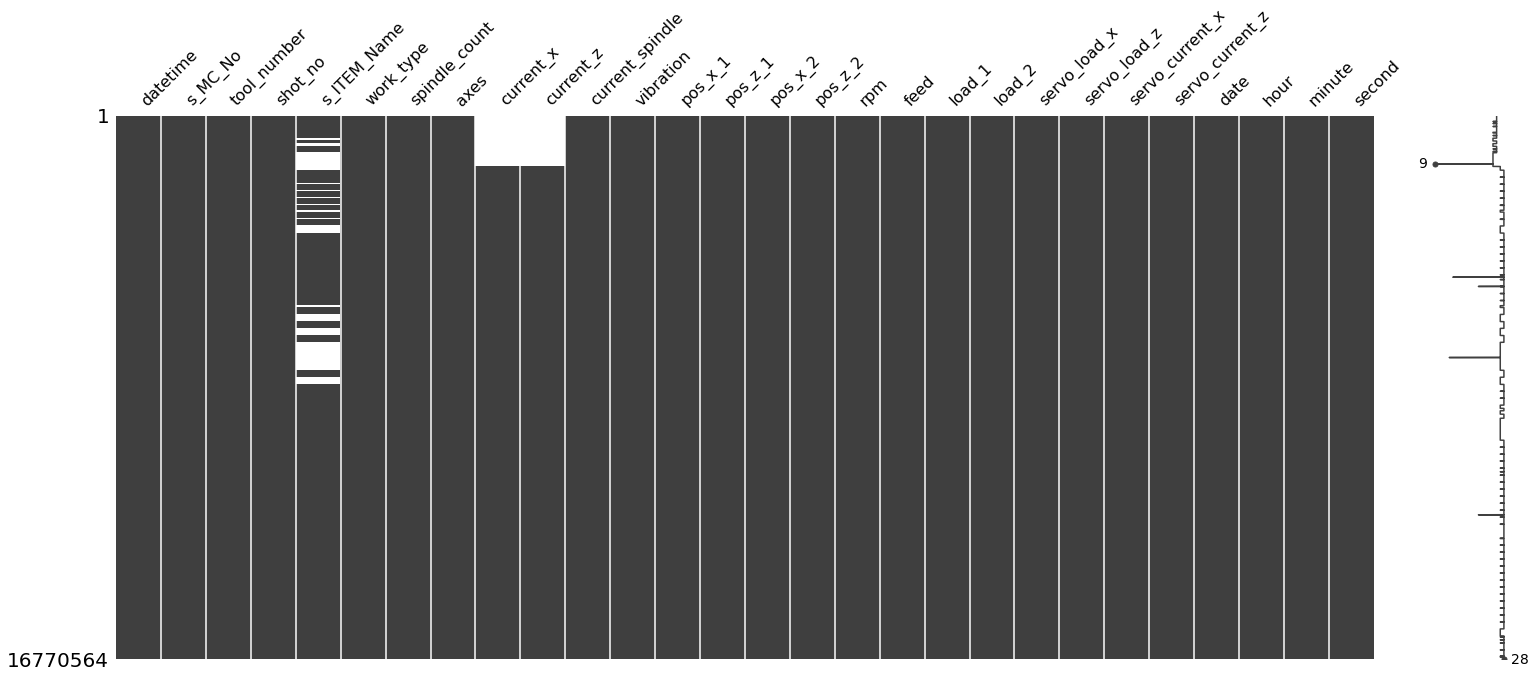

In [15]:
msno.matrix(df_VL04_mod1)

<AxesSubplot:>

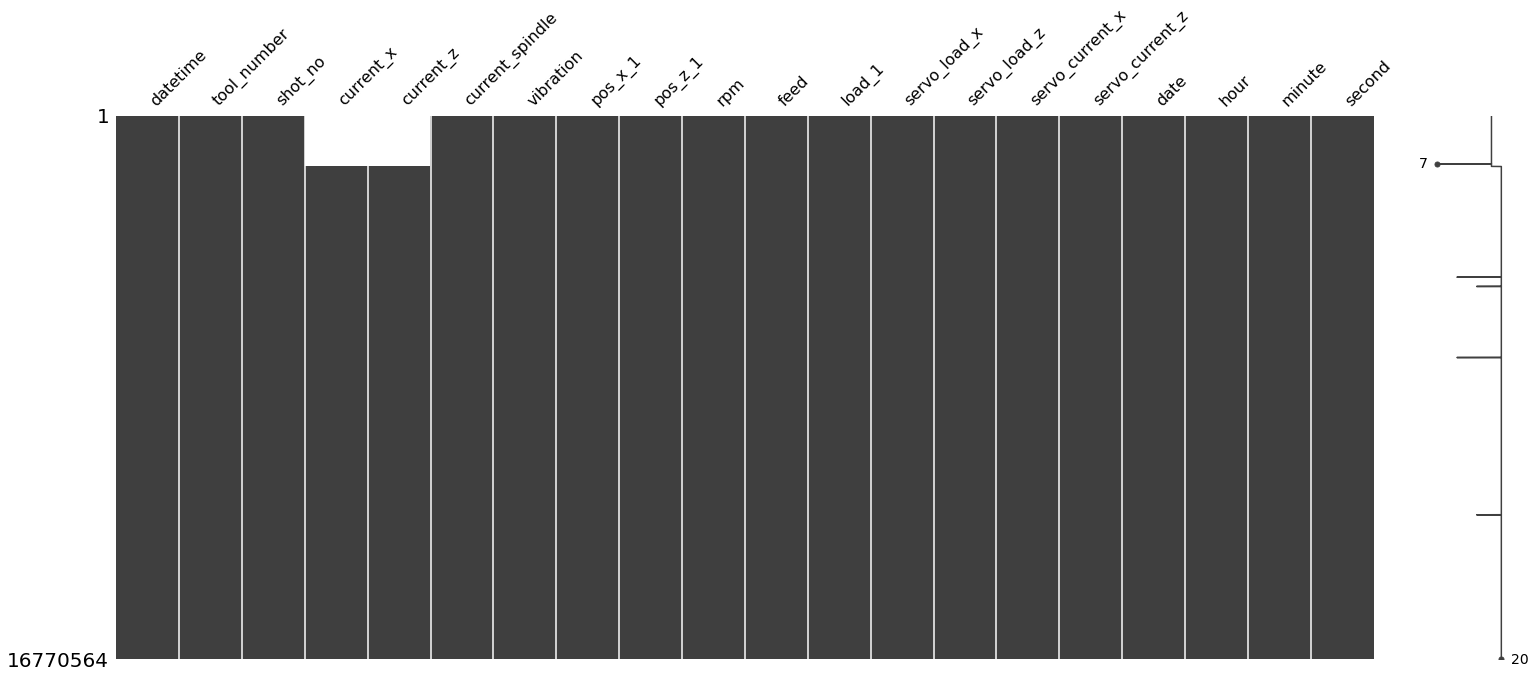

In [16]:
# current_X,Z에 대한 결측치 값, 결측치가 많은 시점에 대한 값 처리
# 필요없는 컬럼 삭제
df_VL04_mod2 = df_VL04_mod1.drop(['s_MC_No', 's_ITEM_Name', 'work_type', 'spindle_count', 'axes', 'pos_x_2', 'pos_z_2', 'load_2'], axis = 1)
# df_VL04_mod2['current_x'] = df_VL04_mod2['current_x'].fillna(0)
# df_VL04_mod2['current_z'] = df_VL04_mod2['current_z'].fillna(0)
msno.matrix(df_VL04_mod2)

In [17]:
df_VL04_mod2.isnull().sum()

datetime                 0
tool_number           2404
shot_no               1596
current_x          1567342
current_z          1567342
current_spindle          0
vibration                0
pos_x_1               2067
pos_z_1               2067
rpm                   1465
feed                  2067
load_1                3970
servo_load_x          3419
servo_load_z          3419
servo_current_x       3419
servo_current_z       3419
date                     0
hour                     0
minute                   0
second                   0
dtype: int64

In [18]:
df_VL04_mod2[df_VL04_mod2['current_x'].isnull() == False].index

Int64Index([ 1567140,  1567143,  1567146,  1567149,  1567152,  1567155,
             1567158,  1567161,  1567164,  1567167,
            ...
            16770554, 16770555, 16770556, 16770557, 16770558, 16770559,
            16770560, 16770561, 16770562, 16770563],
           dtype='int64', length=15203222)

In [19]:
df_VL04_mod2[df_VL04_mod2['current_z'].isnull() == False].index

Int64Index([ 1567138,  1567141,  1567144,  1567147,  1567150,  1567153,
             1567156,  1567159,  1567162,  1567165,
            ...
            16770554, 16770555, 16770556, 16770557, 16770558, 16770559,
            16770560, 16770561, 16770562, 16770563],
           dtype='int64', length=15203222)

In [20]:
df_VL04_mod2 = df_VL04_mod2.loc[df_VL04_mod2[df_VL04_mod2['current_x'].isnull() == False].index]
print('current_x의 결측값이 제거된 데이터의 길이는 {}입니다.'.format(len(df_VL04_mod2)))
df_VL04_mod2 = df_VL04_mod2.loc[df_VL04_mod2[df_VL04_mod2['current_z'].isnull() == False].index]
print('추가로 current_z를 제거한 결측값이 제거된 데이터의 길이는 {}입니다.'.format(len(df_VL04_mod2)))
df_VL04_mod2

current_x의 결측값이 제거된 데이터의 길이는 15203222입니다.
추가로 current_z를 제거한 결측값이 제거된 데이터의 길이는 15203120입니다.


,datetime,tool_number,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,date,hour,minute,second
1567444,2022-07-13 15:09:30.476106,707.0,5831.0,0.0,2.0,2,194.0,640000.0,483830.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,2022-07-13,15,9,30
1567445,2022-07-13 15:09:30.485725,707.0,5831.0,0.0,2.0,0,194.0,640000.0,483830.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,2022-07-13,15,9,30
1567446,2022-07-13 15:09:30.945308,707.0,5831.0,0.0,2.0,0,195.0,640000.0,483830.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,2022-07-13,15,9,30
1567447,2022-07-13 15:09:31.455520,707.0,5831.0,0.0,2.0,2,196.0,640000.0,483830.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,2022-07-13,15,9,31
1567448,2022-07-13 15:09:31.463438,707.0,5831.0,0.0,2.0,0,196.0,640000.0,483830.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,2022-07-13,15,9,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16770559,2022-08-23 23:59:59.070822,505.0,6557.0,2.0,160.0,4183,70.0,365000.0,-1280.0,299.0,60.0,18.0,4.0,58.0,4.0,-58.0,2022-08-23,23,59,59
16770560,2022-08-23 23:59:59.245354,505.0,6557.0,2.0,160.0,4183,69.0,365000.0,-1280.0,299.0,60.0,18.0,4.0,58.0,4.0,-58.0,2022-08-23,23,59,59
16770561,2022-08-23 23:59:59.459136,505.0,6557.0,2.0,156.0,3879,70.0,365000.0,-1632.0,299.0,60.0,16.0,4.0,57.0,4.0,-57.0,2022-08-23,23,59,59
16770562,2022-08-23 23:59:59.670790,505.0,6557.0,2.0,156.0,3879,70.0,365000.0,-1919.0,300.0,60.0,15.0,4.0,57.0,4.0,-57.0,2022-08-23,23,59,59


<AxesSubplot:>

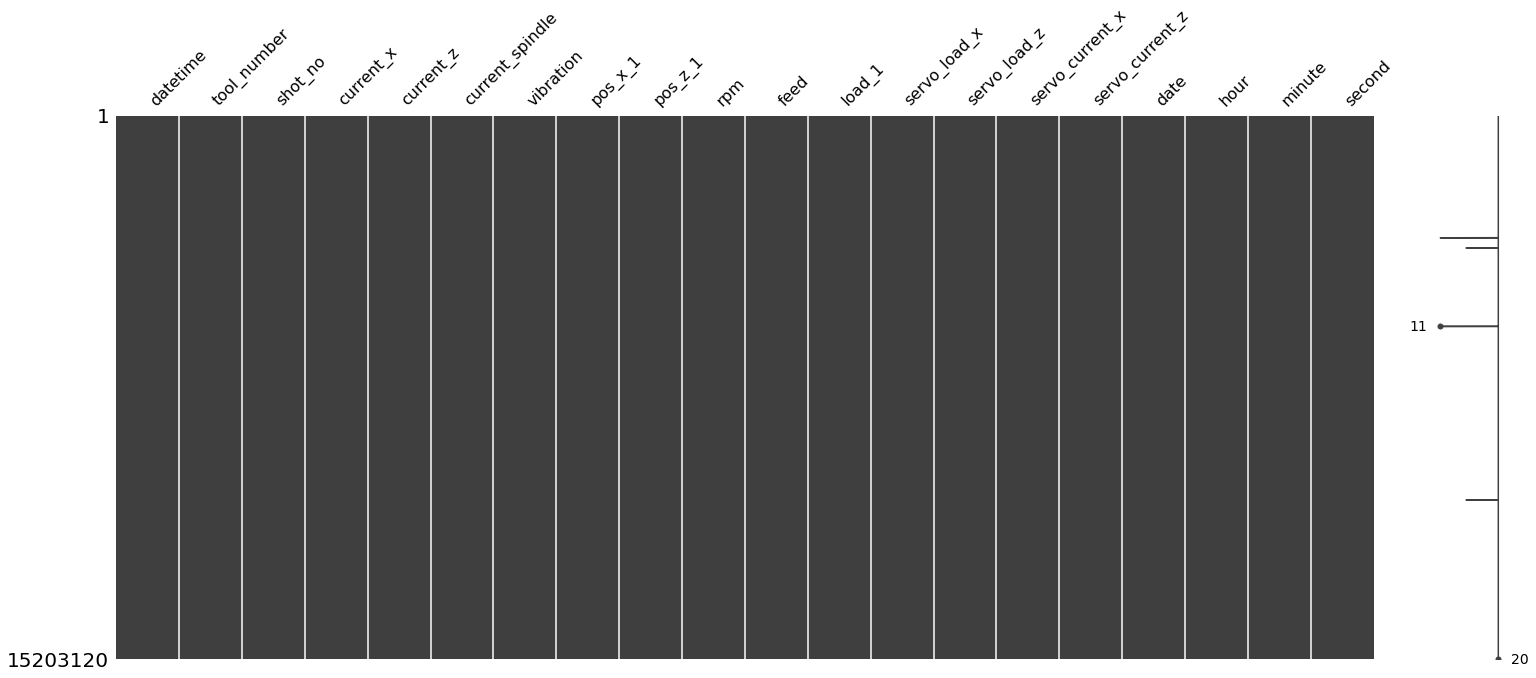

In [21]:
msno.matrix(df_VL04_mod2)

In [22]:
df_VL04_mod2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15203120 entries, 1567444 to 16770563
Data columns (total 20 columns):
 #   Column           Dtype         
---  ------           -----         
 0   datetime         datetime64[ns]
 1   tool_number      float64       
 2   shot_no          float64       
 3   current_x        float64       
 4   current_z        float64       
 5   current_spindle  int64         
 6   vibration        float64       
 7   pos_x_1          float64       
 8   pos_z_1          float64       
 9   rpm              float64       
 10  feed             float64       
 11  load_1           float64       
 12  servo_load_x     float64       
 13  servo_load_z     float64       
 14  servo_current_x  float64       
 15  servo_current_z  float64       
 16  date             datetime64[ns]
 17  hour             int64         
 18  minute           int64         
 19  second           int64         
dtypes: datetime64[ns](2), float64(14), int64(4)
memory usage: 2.

In [23]:
df_VL04_mod2.isnull().sum()

datetime              0
tool_number         602
shot_no               0
current_x             0
current_z             0
current_spindle       0
vibration             0
pos_x_1             602
pos_z_1             602
rpm                   0
feed                602
load_1             1971
servo_load_x       1512
servo_load_z       1512
servo_current_x    1512
servo_current_z    1512
date                  0
hour                  0
minute                0
second                0
dtype: int64

In [24]:
df_VL04_mod2.reset_index(inplace = True, drop = True)
df_VL04_mod2

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,date,hour,minute,second
0,2022-07-13 15:09:30.476106,707.0,5831.0,0.0,2.0,2,194.0,640000.0,483830.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,2022-07-13,15,9,30
1,2022-07-13 15:09:30.485725,707.0,5831.0,0.0,2.0,0,194.0,640000.0,483830.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,2022-07-13,15,9,30
2,2022-07-13 15:09:30.945308,707.0,5831.0,0.0,2.0,0,195.0,640000.0,483830.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,2022-07-13,15,9,30
3,2022-07-13 15:09:31.455520,707.0,5831.0,0.0,2.0,2,196.0,640000.0,483830.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,2022-07-13,15,9,31
4,2022-07-13 15:09:31.463438,707.0,5831.0,0.0,2.0,0,196.0,640000.0,483830.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,2022-07-13,15,9,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15203115,2022-08-23 23:59:59.070822,505.0,6557.0,2.0,160.0,4183,70.0,365000.0,-1280.0,299.0,60.0,18.0,4.0,58.0,4.0,-58.0,2022-08-23,23,59,59
15203116,2022-08-23 23:59:59.245354,505.0,6557.0,2.0,160.0,4183,69.0,365000.0,-1280.0,299.0,60.0,18.0,4.0,58.0,4.0,-58.0,2022-08-23,23,59,59
15203117,2022-08-23 23:59:59.459136,505.0,6557.0,2.0,156.0,3879,70.0,365000.0,-1632.0,299.0,60.0,16.0,4.0,57.0,4.0,-57.0,2022-08-23,23,59,59
15203118,2022-08-23 23:59:59.670790,505.0,6557.0,2.0,156.0,3879,70.0,365000.0,-1919.0,300.0,60.0,15.0,4.0,57.0,4.0,-57.0,2022-08-23,23,59,59


In [25]:
df_VL04_mod2[df_VL04_mod2['tool_number'].isnull() == True].index

Int64Index([3414392, 5893186, 5893187, 5893188, 5893189, 5893190, 5893191,
            5893192, 5893193, 5893194,
            ...
            5893777, 5893778, 5893779, 5893780, 5893781, 5893782, 5893783,
            5893784, 5893785, 5893786],
           dtype='int64', length=602)

tool_number         602, pos_x_1             602
pos_z_1             602, feed                602
load_1             1971
servo_load_x       1512
servo_load_z       1512
servo_current_x    1512
servo_current_z    1512
값에 대하여 결측치 채워넣기

1. 22-07-22부터 07-25 14시49분까지 데이터 없음 -> 확인결과  2022-07-21 12시경 서버전원이 내려가면서 신호처리 서비스가 비정상적으로 종료
2. 2022-07-25 3시50분 경 데이터베이스 재시작
3. 07-22부터 07-25 2시49분까지 데이터 없음

# Tool number 결측값 탐색 - tool_number, pos_x_1, pos_z_1, feed 같음

In [26]:
print('tool_number의 결측값 길이는 ', len(df_VL04_mod2[df_VL04_mod2['tool_number'].isnull() == True].index))
print('pos_x의 결측값 길이는 ', len(df_VL04_mod2[df_VL04_mod2['tool_number'].isnull() == True].index))
print('pos_z의 결측값 길이는 ', len(df_VL04_mod2[df_VL04_mod2['tool_number'].isnull() == True].index))
print('feed의 결측값 길이는 ', len(df_VL04_mod2[df_VL04_mod2['tool_number'].isnull() == True].index))
print("tool_number 결측치 인덱스와 pos_x_1의 결측치 인덱스가 같은가? {}".format(sorted(list(df_VL04_mod2[df_VL04_mod2['tool_number'].isnull() == True].index)) == sorted(list(df_VL04_mod2[df_VL04_mod2['pos_x_1'].isnull() == True].index))))
print("tool_number 결측치 인덱스와 pos_z_1의 결측치 인덱스가 같은가? {}".format(sorted(list(df_VL04_mod2[df_VL04_mod2['tool_number'].isnull() == True].index)) == sorted(list(df_VL04_mod2[df_VL04_mod2['pos_z_1'].isnull() == True].index))))
print("tool_number 결측치 인덱스와 feed의 결측치 인덱스가 같은가? {}".format(sorted(list(df_VL04_mod2[df_VL04_mod2['tool_number'].isnull() == True].index)) == sorted(list(df_VL04_mod2[df_VL04_mod2['feed'].isnull() == True].index))))

tool_number의 결측값 길이는  602
pos_x의 결측값 길이는  602
pos_z의 결측값 길이는  602
feed의 결측값 길이는  602
tool_number 결측치 인덱스와 pos_x_1의 결측치 인덱스가 같은가? True
tool_number 결측치 인덱스와 pos_z_1의 결측치 인덱스가 같은가? True
tool_number 결측치 인덱스와 feed의 결측치 인덱스가 같은가? True


In [27]:
df_VL04_mod2.iloc

In [28]:
# 첫번째 인덱스
df_VL04_mod2.iloc[3414390:3414396, :]

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,date,hour,minute,second
3414390,2022-07-21 11:51:42.715604,707.0,5999.0,0.0,0.0,0,91.0,639999.0,483823.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-21,11,51,42
3414391,2022-07-21 11:51:42.918108,707.0,5999.0,0.0,0.0,0,94.0,639999.0,483823.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-21,11,51,42
3414392,2022-07-25 15:45:44.606015,NaN,0.0,0.0,0.0,0,90.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-25,15,45,44
3414393,2022-07-25 15:45:44.775611,707.0,6080.0,0.0,0.0,0,90.0,365370.0,-34497.0,320.0,48.0,2.0,3.0,57.0,3.0,-57.0,2022-07-25,15,45,44
3414394,2022-07-25 15:45:44.974645,707.0,6080.0,0.0,0.0,0,90.0,365370.0,-34497.0,320.0,48.0,2.0,3.0,57.0,3.0,-57.0,2022-07-25,15,45,44
3414395,2022-07-25 15:45:45.175062,707.0,6080.0,0.0,0.0,2086,90.0,365370.0,-34727.0,319.0,48.0,2.0,2.0,55.0,2.0,-55.0,2022-07-25,15,45,45


In [29]:
df_VL04_mod3 = df_VL04_mod2[df_VL04_mod2['datetime'] > '2022-07-25 15:45:44.606015']
df_VL04_mod3.reset_index(inplace = True)
df_VL04_mod3.drop('index', axis = 1, inplace = True)

In [30]:
df_VL04_mod3[df_VL04_mod3['tool_number'].isnull() == True].index

Int64Index([2478793, 2478794, 2478795, 2478796, 2478797, 2478798, 2478799,
            2478800, 2478801, 2478802,
            ...
            2479384, 2479385, 2479386, 2479387, 2479388, 2479389, 2479390,
            2479391, 2479392, 2479393],
           dtype='int64', length=601)

해당 가동이력의 신호취득장비와, 진동기, 전력량기는 따로 구성되어 있어
실제 설비가 전원OFF 일지라도 진동기의 신호취득 장비의 전원이 켜져 있으면 DEASHIN_SIGNAL -> TPOP_MACHINE_PARAMETER DB 에 데이터가 들어올 수 있습니다.
VL04 : 2022-08-02 09:59:04 ~ 2022-08-03 08:14:35 (약 1일간) 비가동 or 전원 off
VL04 : 2022-08-13 15:58:29 ~ 2022-08-13 16:00:01 (약 1분 30초) 비가동 or 전원 off

In [31]:
# 두번째 인덱스부터
df_VL04_mod3.iloc[2478792:2479395]

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,date,hour,minute,second
2478792,2022-08-02 09:57:04.409424,101.0,6217.0,0.0,0.0,0,93.0,640001.0,483823.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2022-08-02,9,57,4
2478793,2022-08-02 09:57:04.611016,NaN,0.0,0.0,0.0,0,94.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-02,9,57,4
2478794,2022-08-02 09:57:04.834441,NaN,0.0,0.0,0.0,0,93.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-02,9,57,4
2478795,2022-08-02 09:57:05.045850,NaN,0.0,0.0,0.0,0,94.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-02,9,57,5
2478796,2022-08-02 09:57:05.223470,NaN,0.0,0.0,0.0,0,94.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-02,9,57,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479390,2022-08-02 09:59:04.202863,NaN,0.0,5.0,2.0,0,92.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-02,9,59,4
2479391,2022-08-02 09:59:04.402944,NaN,0.0,5.0,2.0,0,92.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-02,9,59,4
2479392,2022-08-02 09:59:04.597093,NaN,0.0,5.0,2.0,0,92.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-02,9,59,4
2479393,2022-08-02 09:59:04.797045,NaN,0.0,5.0,2.0,0,92.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-02,9,59,4


In [32]:
df_VL04_mod2[(df_VL04_mod2['shot_no'] == 6219) & (df_VL04_mod2['hour'] == 9) & (df_VL04_mod2['minute'] == 57) & (df_VL04_mod2['second'] == 4)]

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,date,hour,minute,second
6323519,2022-08-03 09:57:04.383243,505.0,6219.0,27.0,4.0,2439,93.0,164695.0,0.0,300.0,60.0,5.0,12.0,59.0,12.0,-59.0,2022-08-03,9,57,4
6323520,2022-08-03 09:57:04.480274,505.0,6219.0,27.0,4.0,2439,94.0,165334.0,0.0,299.0,60.0,6.0,12.0,59.0,12.0,-59.0,2022-08-03,9,57,4
6323521,2022-08-03 09:57:04.578496,505.0,6219.0,27.0,4.0,2439,93.0,165334.0,0.0,299.0,60.0,6.0,12.0,59.0,12.0,-59.0,2022-08-03,9,57,4
6323522,2022-08-03 09:57:04.764888,505.0,6219.0,26.0,4.0,2443,93.0,166164.0,0.0,299.0,60.0,6.0,12.0,60.0,12.0,-60.0,2022-08-03,9,57,4
6323523,2022-08-03 09:57:04.973337,505.0,6219.0,26.0,4.0,2443,93.0,166164.0,0.0,299.0,60.0,6.0,12.0,60.0,12.0,-60.0,2022-08-03,9,57,4


In [33]:
df_VL04_mod2[df_VL04_mod2['shot_no'] == 6217]

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,date,hour,minute,second
5406556,2022-08-01 06:49:04.294764,101.0,6217.0,0.0,2.0,0,89.0,640000.0,483830.0,0.0,0.0,0.0,3.0,71.0,3.0,-71.0,2022-08-01,6,49,4
5406557,2022-08-01 06:49:04.495090,101.0,6217.0,0.0,2.0,0,88.0,640000.0,483830.0,0.0,0.0,0.0,3.0,71.0,3.0,-71.0,2022-08-01,6,49,4
5406558,2022-08-01 06:49:04.720321,101.0,6217.0,0.0,2.0,0,89.0,640000.0,483830.0,0.0,0.0,0.0,3.0,72.0,3.0,-72.0,2022-08-01,6,49,4
5406559,2022-08-01 06:49:04.892796,101.0,6217.0,0.0,2.0,0,89.0,640000.0,483830.0,0.0,0.0,0.0,3.0,72.0,3.0,-72.0,2022-08-01,6,49,4
5406560,2022-08-01 06:49:05.094532,101.0,6217.0,0.0,2.0,0,88.0,640000.0,483830.0,0.0,0.0,0.0,3.0,72.0,3.0,-72.0,2022-08-01,6,49,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6304536,2022-08-03 08:53:37.119829,707.0,6217.0,0.0,4.0,2178,95.0,683420.0,378120.0,299.0,0.0,93.0,4.0,76.0,4.0,-76.0,2022-08-03,8,53,37
6304537,2022-08-03 08:53:37.291830,707.0,6217.0,0.0,4.0,2178,95.0,683420.0,378120.0,249.0,0.0,120.0,4.0,76.0,4.0,-76.0,2022-08-03,8,53,37
6304538,2022-08-03 08:53:37.502889,707.0,6217.0,0.0,12.0,6973,95.0,683420.0,378120.0,167.0,0.0,122.0,4.0,75.0,4.0,-75.0,2022-08-03,8,53,37
6304539,2022-08-03 08:53:37.696617,707.0,6217.0,7.0,12.0,6973,96.0,683420.0,378120.0,167.0,0.0,122.0,4.0,75.0,4.0,-75.0,2022-08-03,8,53,37


In [34]:
df_VL04_mod2[df_VL04_mod2['shot_no'] == 6218]

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,date,hour,minute,second
6304541,2022-08-03 08:53:38.108062,707.0,6218.0,0.0,12.0,1179,96.0,683420.0,378120.0,1.0,0.0,0.0,3.0,76.0,3.0,-76.0,2022-08-03,8,53,38
6304542,2022-08-03 08:53:38.308097,707.0,6218.0,0.0,4.0,1179,97.0,683420.0,378120.0,1.0,0.0,0.0,3.0,76.0,3.0,-76.0,2022-08-03,8,53,38
6304543,2022-08-03 08:53:38.501477,707.0,6218.0,0.0,4.0,1179,98.0,640000.0,483830.0,0.0,0.0,0.0,4.0,76.0,4.0,-76.0,2022-08-03,8,53,38
6304544,2022-08-03 08:53:38.694584,707.0,6218.0,0.0,2.0,56,98.0,640000.0,483830.0,0.0,0.0,0.0,4.0,76.0,4.0,-76.0,2022-08-03,8,53,38
6304545,2022-08-03 08:53:38.895916,707.0,6218.0,0.0,2.0,56,98.0,640000.0,483830.0,0.0,0.0,0.0,4.0,76.0,4.0,-76.0,2022-08-03,8,53,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6317323,2022-08-03 09:36:22.262911,707.0,6218.0,7.0,12.0,7767,90.0,683420.0,378120.0,226.0,0.0,121.0,4.0,75.0,4.0,-75.0,2022-08-03,9,36,22
6317324,2022-08-03 09:36:22.463003,707.0,6218.0,7.0,12.0,7767,90.0,683420.0,378120.0,226.0,0.0,121.0,4.0,75.0,4.0,-75.0,2022-08-03,9,36,22
6317325,2022-08-03 09:36:22.657211,707.0,6218.0,6.0,12.0,7767,90.0,683420.0,378120.0,133.0,0.0,122.0,4.0,75.0,4.0,-75.0,2022-08-03,9,36,22
6317326,2022-08-03 09:36:22.851334,707.0,6218.0,6.0,9.0,5042,90.0,683420.0,378120.0,133.0,0.0,122.0,4.0,75.0,4.0,-75.0,2022-08-03,9,36,22


In [35]:
df_VL04_mod2[(df_VL04_mod2['shot_no'] == 6219) & (df_VL04_mod2['hour'] == 9) & (df_VL04_mod2['minute'] == 57) & (df_VL04_mod2['second'] == 4)]

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,date,hour,minute,second
6323519,2022-08-03 09:57:04.383243,505.0,6219.0,27.0,4.0,2439,93.0,164695.0,0.0,300.0,60.0,5.0,12.0,59.0,12.0,-59.0,2022-08-03,9,57,4
6323520,2022-08-03 09:57:04.480274,505.0,6219.0,27.0,4.0,2439,94.0,165334.0,0.0,299.0,60.0,6.0,12.0,59.0,12.0,-59.0,2022-08-03,9,57,4
6323521,2022-08-03 09:57:04.578496,505.0,6219.0,27.0,4.0,2439,93.0,165334.0,0.0,299.0,60.0,6.0,12.0,59.0,12.0,-59.0,2022-08-03,9,57,4
6323522,2022-08-03 09:57:04.764888,505.0,6219.0,26.0,4.0,2443,93.0,166164.0,0.0,299.0,60.0,6.0,12.0,60.0,12.0,-60.0,2022-08-03,9,57,4
6323523,2022-08-03 09:57:04.973337,505.0,6219.0,26.0,4.0,2443,93.0,166164.0,0.0,299.0,60.0,6.0,12.0,60.0,12.0,-60.0,2022-08-03,9,57,4


# Load1, servo_load_x, servo_current_x, servo_current_z 결측치 탐색
추가적인 변수로 사용할 것으로 우선 Feature를 제거하여 수행

In [36]:
print('load1 의 결측값 길이는 ', len(df_VL04_mod2[df_VL04_mod2['load_1'].isnull() == True].index))
print('servo_load_x의 결측값 길이는 ', len(df_VL04_mod2[df_VL04_mod2['servo_load_x'].isnull() == True].index))
print('servo_load_z의 결측값 길이는 ', len(df_VL04_mod2[df_VL04_mod2['servo_load_z'].isnull() == True].index))
print('servo_current_x의 결측값 길이는 ', len(df_VL04_mod2[df_VL04_mod2['servo_current_x'].isnull() == True].index))
print('servo_current_z의 결측값 길이는 ', len(df_VL04_mod2[df_VL04_mod2['servo_current_z'].isnull() == True].index))
print("servo_load_x 결측치 인덱스와 servo_load_z의 결측치 인덱스가 같은가? {}".format(sorted(list(df_VL04_mod2[df_VL04_mod2['servo_load_x'].isnull() == True].index)) == sorted(list(df_VL04_mod2[df_VL04_mod2['servo_load_z'].isnull() == True].index))))
print("servo_load_x 결측치 인덱스와 servo_current_x의 결측치 인덱스가 같은가? {}".format(sorted(list(df_VL04_mod2[df_VL04_mod2['servo_load_x'].isnull() == True].index)) == sorted(list(df_VL04_mod2[df_VL04_mod2['servo_current_x'].isnull() == True].index))))
print("servo_load_x 결측치 인덱스와 servo_current_z의 결측치 인덱스가 같은가? {}".format(sorted(list(df_VL04_mod2[df_VL04_mod2['servo_load_x'].isnull() == True].index)) == sorted(list(df_VL04_mod2[df_VL04_mod2['servo_current_z'].isnull() == True].index))))
print("servo_load_z 결측치 인덱스와 servo_current_x의 결측치 인덱스가 같은가? {}".format(sorted(list(df_VL04_mod2[df_VL04_mod2['servo_load_z'].isnull() == True].index)) == sorted(list(df_VL04_mod2[df_VL04_mod2['servo_current_x'].isnull() == True].index))))
print("servo_load_z 결측치 인덱스와 servo_current_z의 결측치 인덱스가 같은가? {}".format(sorted(list(df_VL04_mod2[df_VL04_mod2['servo_load_z'].isnull() == True].index)) == sorted(list(df_VL04_mod2[df_VL04_mod2['servo_current_z'].isnull() == True].index))))

load1 의 결측값 길이는  1971
servo_load_x의 결측값 길이는  1512
servo_load_z의 결측값 길이는  1512
servo_current_x의 결측값 길이는  1512
servo_current_z의 결측값 길이는  1512
servo_load_x 결측치 인덱스와 servo_load_z의 결측치 인덱스가 같은가? True
servo_load_x 결측치 인덱스와 servo_current_x의 결측치 인덱스가 같은가? True
servo_load_x 결측치 인덱스와 servo_current_z의 결측치 인덱스가 같은가? True
servo_load_z 결측치 인덱스와 servo_current_x의 결측치 인덱스가 같은가? True
servo_load_z 결측치 인덱스와 servo_current_z의 결측치 인덱스가 같은가? True


In [37]:
df_VL04_mod2[df_VL04_mod2['load_1'].isnull() ==  True].index

Int64Index([ 3414392,  3700124,  3700125,  3700126,  3700127,  3700128,
             3700129,  3700130,  3700131,  3700132,
            ...
            10745376, 10745377, 10745378, 10745379, 10745380, 10745381,
            10745382, 10745383, 10745384, 10745385],
           dtype='int64', length=1971)

In [38]:
# load1의 대한 결측치 탐색
df_VL04_mod2.loc[df_VL04_mod2[df_VL04_mod2['load_1'].isnull() ==  True].index]

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,date,hour,minute,second
3414392,2022-07-25 15:45:44.606015,NaN,0.0,0.0,0.0,0,90.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-25,15,45,44
3700124,2022-07-26 07:41:39.460409,101.0,6097.0,4.0,2.0,1714,87.0,526274.0,8250.0,60.0,3.0,NaN,NaN,NaN,NaN,NaN,2022-07-26,7,41,39
3700125,2022-07-26 07:41:39.563596,101.0,6097.0,4.0,2.0,1714,87.0,526274.0,8250.0,60.0,3.0,NaN,NaN,NaN,NaN,NaN,2022-07-26,7,41,39
3700126,2022-07-26 07:41:39.620763,101.0,6097.0,4.0,2.0,1714,87.0,526274.0,8250.0,60.0,3.0,NaN,NaN,NaN,NaN,NaN,2022-07-26,7,41,39
3700127,2022-07-26 07:41:39.780833,101.0,6097.0,4.0,2.0,1714,87.0,526274.0,8250.0,60.0,3.0,NaN,NaN,NaN,NaN,NaN,2022-07-26,7,41,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10745381,2022-08-13 16:00:00.456833,-1.0,6339.0,22.0,81.0,2016,75.0,367361.0,204.0,320.0,48.0,NaN,NaN,NaN,NaN,NaN,2022-08-13,16,0,0
10745382,2022-08-13 16:00:00.656177,-1.0,6339.0,22.0,81.0,2016,75.0,367361.0,204.0,320.0,48.0,NaN,NaN,NaN,NaN,NaN,2022-08-13,16,0,0
10745383,2022-08-13 16:00:00.882220,-1.0,6339.0,51.0,70.0,2018,75.0,367361.0,204.0,320.0,48.0,NaN,NaN,NaN,NaN,NaN,2022-08-13,16,0,0
10745384,2022-08-13 16:00:01.070933,-1.0,6339.0,51.0,70.0,2018,75.0,367361.0,204.0,320.0,48.0,NaN,NaN,NaN,NaN,NaN,2022-08-13,16,0,1


# current_spindle과 vibration 이외의 변수 제거

In [69]:
df_VL04_mod3 = df_VL04_mod2.drop(['current_x', 'current_z', 'pos_x_1', 'pos_z_1', 'rpm', 'feed', 'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x', 'servo_current_z'], axis = 1)
df_VL04_mod3

,datetime,tool_number,shot_no,current_spindle,vibration,date,hour,minute,second
0,2022-07-13 15:09:30.476106,707.0,5831.0,2,194.0,2022-07-13,15,9,30
1,2022-07-13 15:09:30.485725,707.0,5831.0,0,194.0,2022-07-13,15,9,30
2,2022-07-13 15:09:30.945308,707.0,5831.0,0,195.0,2022-07-13,15,9,30
3,2022-07-13 15:09:31.455520,707.0,5831.0,2,196.0,2022-07-13,15,9,31
4,2022-07-13 15:09:31.463438,707.0,5831.0,0,196.0,2022-07-13,15,9,31
...,...,...,...,...,...,...,...,...,...
15203115,2022-08-23 23:59:59.070822,505.0,6557.0,4183,70.0,2022-08-23,23,59,59
15203116,2022-08-23 23:59:59.245354,505.0,6557.0,4183,69.0,2022-08-23,23,59,59
15203117,2022-08-23 23:59:59.459136,505.0,6557.0,3879,70.0,2022-08-23,23,59,59
15203118,2022-08-23 23:59:59.670790,505.0,6557.0,3879,70.0,2022-08-23,23,59,59


In [70]:
df_VL04_mod3.isnull().sum()

datetime             0
tool_number        602
shot_no              0
current_spindle      0
vibration            0
date                 0
hour                 0
minute               0
second               0
dtype: int64

<AxesSubplot:>

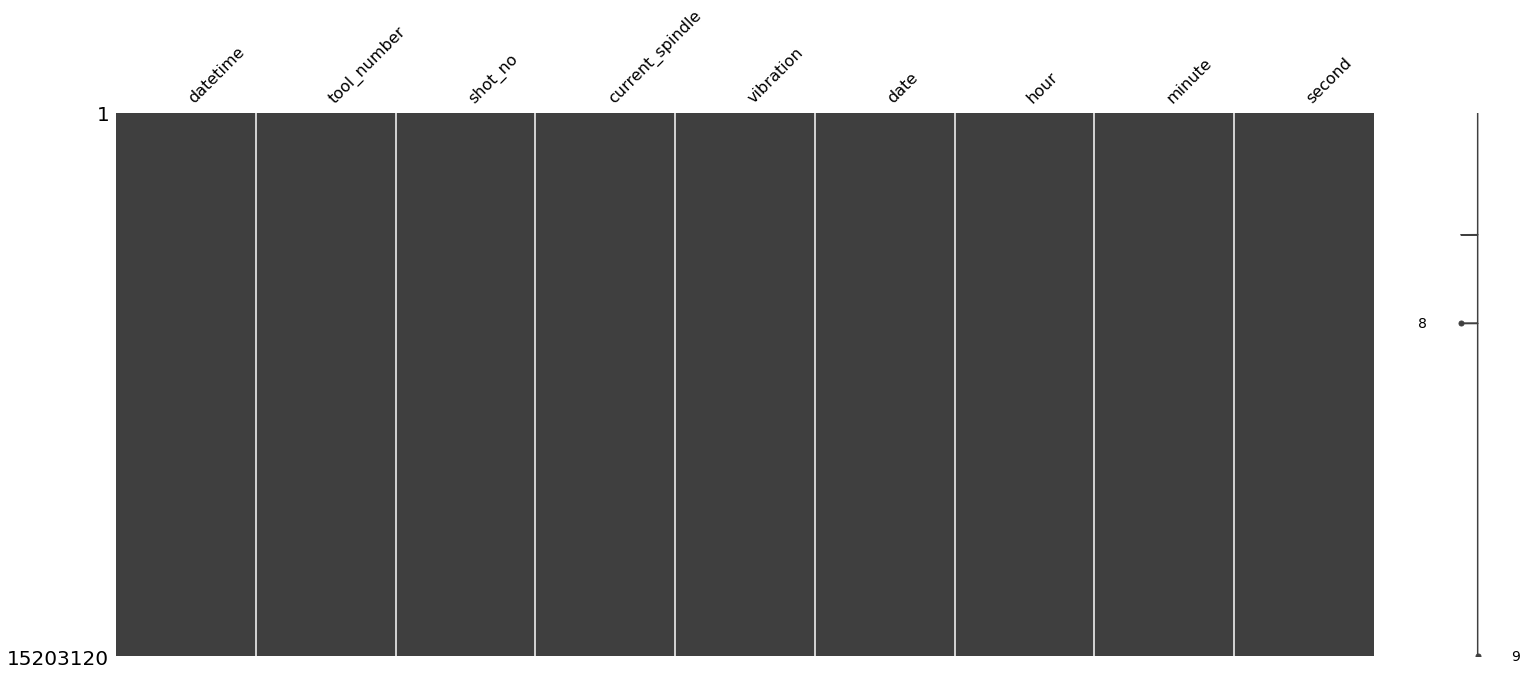

In [71]:
msno.matrix(df_VL04_mod3)

In [72]:
#dropna로 tool number 결측치 제거 -> 해당시기는 비가동 시기이기 때문에
df_VL04_mod3.dropna(axis = 0, inplace = True)

In [73]:
df_VLO4_mod3

,datetime,tool_number,shot_no,current_spindle,vibration,date,hour,minute,second
0,2022-07-13 15:09:30.476106,707.0,5831.0,2,194.0,2022-07-13,15,9,30
1,2022-07-13 15:09:30.485725,707.0,5831.0,0,194.0,2022-07-13,15,9,30
2,2022-07-13 15:09:30.945308,707.0,5831.0,0,195.0,2022-07-13,15,9,30
3,2022-07-13 15:09:31.455520,707.0,5831.0,2,196.0,2022-07-13,15,9,31
4,2022-07-13 15:09:31.463438,707.0,5831.0,0,196.0,2022-07-13,15,9,31
...,...,...,...,...,...,...,...,...,...
15203115,2022-08-23 23:59:59.070822,505.0,6557.0,4183,70.0,2022-08-23,23,59,59
15203116,2022-08-23 23:59:59.245354,505.0,6557.0,4183,69.0,2022-08-23,23,59,59
15203117,2022-08-23 23:59:59.459136,505.0,6557.0,3879,70.0,2022-08-23,23,59,59
15203118,2022-08-23 23:59:59.670790,505.0,6557.0,3879,70.0,2022-08-23,23,59,59


In [74]:
df_VL04_mod3['tool_number'] = df_VL04_mod3['tool_number'].astype('int64')
df_VL04_mod3['tool'] = df_VL04_mod3['tool_number']
df_VL04_mod3['state'] = df_VL04_mod3['tool_number']
df_VL04_mod3.reset_index(inplace = True, drop = True)

In [75]:
df_VL04_mod3

,datetime,tool_number,shot_no,current_spindle,vibration,date,hour,minute,second,tool,state
0,2022-07-13 15:09:30.476106,707,5831.0,2,194.0,2022-07-13,15,9,30,707,707
1,2022-07-13 15:09:30.485725,707,5831.0,0,194.0,2022-07-13,15,9,30,707,707
2,2022-07-13 15:09:30.945308,707,5831.0,0,195.0,2022-07-13,15,9,30,707,707
3,2022-07-13 15:09:31.455520,707,5831.0,2,196.0,2022-07-13,15,9,31,707,707
4,2022-07-13 15:09:31.463438,707,5831.0,0,196.0,2022-07-13,15,9,31,707,707
...,...,...,...,...,...,...,...,...,...,...,...
15202513,2022-08-23 23:59:59.070822,505,6557.0,4183,70.0,2022-08-23,23,59,59,505,505
15202514,2022-08-23 23:59:59.245354,505,6557.0,4183,69.0,2022-08-23,23,59,59,505,505
15202515,2022-08-23 23:59:59.459136,505,6557.0,3879,70.0,2022-08-23,23,59,59,505,505
15202516,2022-08-23 23:59:59.670790,505,6557.0,3879,70.0,2022-08-23,23,59,59,505,505


In [76]:
df_VL04_mod3['state'].unique()

array([ 707,  100,  101,  500,  505,  900,  909, 1100, 1111,  700,  300,
        303,  399,  599,  199,  999,  799, 1199,    0,   -1], dtype=int64)

In [77]:
# tool, state 값 변경
temp_state = df_VL04_mod3['state'].unique()
temp_tool = df_VL04_mod3['tool'].unique()
state_list = ['operation', 'cancel', 'operation', 'cancel', 'operation', 'cancel', 'operation', 'cancel', 'operation', 'cancel', 'cancel', 'operation', 'end', 'end', 'end', 'end', 'end', 'end', 'etc0', 'ect-1']
tool_list = [7,1,1,5,5,9,9,11,11,7,3,3,3,5,1,9,7,11,0,-1]
df_VL04_mod3['state'] = df_VL04_mod3['state'].replace(temp_state, state_list)
df_VL04_mod3['tool'] = df_VL04_mod3['tool'].replace(temp_tool, tool_list)

In [78]:
df_VL04_mod3['tool'].unique()

array([ 7,  1,  5,  9, 11,  3,  0, -1], dtype=int64)

In [79]:
df_VL04_mod3.head()

,datetime,tool_number,shot_no,current_spindle,vibration,date,hour,minute,second,tool,state
0,2022-07-13 15:09:30.476106,707,5831.0,2,194.0,2022-07-13,15,9,30,7,operation
1,2022-07-13 15:09:30.485725,707,5831.0,0,194.0,2022-07-13,15,9,30,7,operation
2,2022-07-13 15:09:30.945308,707,5831.0,0,195.0,2022-07-13,15,9,30,7,operation
3,2022-07-13 15:09:31.455520,707,5831.0,2,196.0,2022-07-13,15,9,31,7,operation
4,2022-07-13 15:09:31.463438,707,5831.0,0,196.0,2022-07-13,15,9,31,7,operation


In [80]:
# nano second -> second로 변경
# nano second 값 평균값으로 대체
# groupby를 통해 초단위로 변경
# df_VL04_mod3 = df_VL04_mod1.resample('s').mean()
df_VL04_mod3 = df_VL04_mod3.groupby(['date', 'hour', 'minute', 'second', 'tool_number', 'tool', 'state', 'shot_no']).mean()
df_VL04_mod3.reset_index(inplace=True)
df_VL04_mod3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050613 entries, 0 to 3050612
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   date             datetime64[ns]
 1   hour             int64         
 2   minute           int64         
 3   second           int64         
 4   tool_number      int64         
 5   tool             int64         
 6   state            object        
 7   shot_no          float64       
 8   current_spindle  float64       
 9   vibration        float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 232.7+ MB


In [81]:
df_VL04_mod3.head()

,date,hour,minute,second,tool_number,tool,state,shot_no,current_spindle,vibration
0,2022-07-13,15,9,30,707,7,operation,5831.0,0.666667,194.333333
1,2022-07-13,15,9,31,707,7,operation,5831.0,0.666667,195.666667
2,2022-07-13,15,9,32,707,7,operation,5831.0,0.666667,196.000000
3,2022-07-13,15,9,33,707,7,operation,5831.0,0.666667,194.666667
4,2022-07-13,15,9,34,707,7,operation,5831.0,0.666667,195.333333


In [82]:
df_VL04_mod3['date'] = df_VL04_mod3['date'].astype('str')
df_VL04_mod3['hour'] = df_VL04_mod3['hour'].astype('str')
df_VL04_mod3['minute'] = df_VL04_mod3['minute'].astype('str')
df_VL04_mod3['second'] = df_VL04_mod3['second'].astype('str')
df_VL04_mod3['datetime'] = df_VL04_mod3['date'] + ' ' + df_VL04_mod3['hour']+ ':' + df_VL04_mod3['minute'] + ':' + df_VL04_mod3['second']
df_VL04_mod3['datetime'] = pd.to_datetime(df_VL04_mod3['datetime'])

In [83]:
df_VL04_mod3

,date,hour,minute,second,tool_number,tool,state,shot_no,current_spindle,vibration,datetime
0,2022-07-13,15,9,30,707,7,operation,5831.0,0.666667,194.333333,2022-07-13 15:09:30
1,2022-07-13,15,9,31,707,7,operation,5831.0,0.666667,195.666667,2022-07-13 15:09:31
2,2022-07-13,15,9,32,707,7,operation,5831.0,0.666667,196.000000,2022-07-13 15:09:32
3,2022-07-13,15,9,33,707,7,operation,5831.0,0.666667,194.666667,2022-07-13 15:09:33
4,2022-07-13,15,9,34,707,7,operation,5831.0,0.666667,195.333333,2022-07-13 15:09:34
...,...,...,...,...,...,...,...,...,...,...,...
3050608,2022-08-23,23,59,55,505,5,operation,6557.0,2402.000000,85.600000,2022-08-23 23:59:55
3050609,2022-08-23,23,59,56,505,5,operation,6557.0,2045.200000,72.800000,2022-08-23 23:59:56
3050610,2022-08-23,23,59,57,505,5,operation,6557.0,2034.000000,69.200000,2022-08-23 23:59:57
3050611,2022-08-23,23,59,58,505,5,operation,6557.0,3195.400000,69.400000,2022-08-23 23:59:58


In [84]:
df_VL04_mod4 = df_VL04_mod3.groupby(['date','hour','minute', 'tool_number', 'tool', 'state', 'shot_no']).mean()
df_VL04_mod4 = df_VL04_mod4.reset_index(drop = False)
df_VL04_mod4.head(100)

,date,hour,minute,tool_number,tool,state,shot_no,current_spindle,vibration
0,2022-07-13,15,10,707,7,operation,5831.0,0.666667,195.522222
1,2022-07-13,15,11,707,7,operation,5831.0,0.650063,194.839223
2,2022-07-13,15,12,707,7,operation,5831.0,0.666667,193.816667
3,2022-07-13,15,13,707,7,operation,5831.0,0.665337,193.116825
4,2022-07-13,15,14,707,7,operation,5831.0,0.667302,191.987778
5,2022-07-13,15,15,707,7,operation,5831.0,0.666667,192.257778
6,2022-07-13,15,16,707,7,operation,5831.0,0.667498,192.570073
7,2022-07-13,15,17,707,7,operation,5831.0,0.666667,192.741111
8,2022-07-13,15,18,707,7,operation,5831.0,0.665217,192.458465
9,2022-07-13,15,19,707,7,operation,5831.0,0.666667,192.344444


In [85]:
df_VL04_mod4

,date,hour,minute,tool_number,tool,state,shot_no,current_spindle,vibration
0,2022-07-13,15,10,707,7,operation,5831.0,0.666667,195.522222
1,2022-07-13,15,11,707,7,operation,5831.0,0.650063,194.839223
2,2022-07-13,15,12,707,7,operation,5831.0,0.666667,193.816667
3,2022-07-13,15,13,707,7,operation,5831.0,0.665337,193.116825
4,2022-07-13,15,14,707,7,operation,5831.0,0.667302,191.987778
...,...,...,...,...,...,...,...,...,...
61755,2022-08-23,9,6,909,9,operation,6541.0,2018.496667,67.893333
61756,2022-08-23,9,7,909,9,operation,6541.0,2019.891389,68.559167
61757,2022-08-23,9,7,999,9,end,6541.0,2016.000000,77.000000
61758,2022-08-23,9,8,909,9,operation,6541.0,2093.116667,67.270000


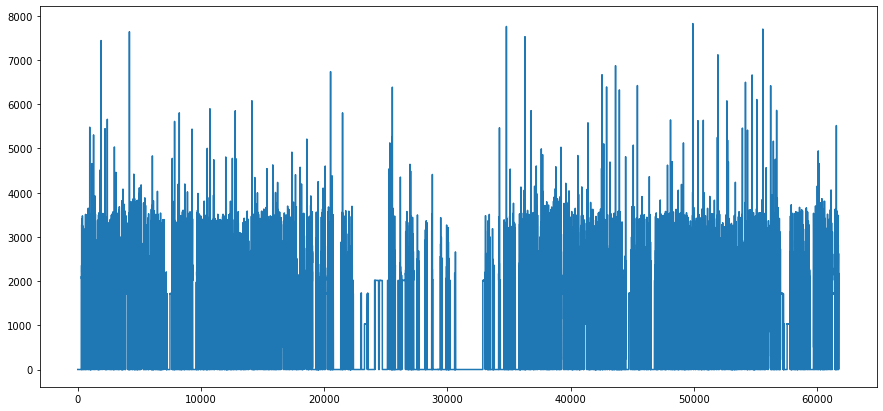

In [86]:
plt.figure(figsize = (15,7))
plt.plot(df_VL04_mod4['current_spindle'])

In [32]:
# # tool 번호 및 상태 생성
# tool_number_list = list(df_VL04_mod3['tool_number'].unique())
# tool_list = [1,1,5,5,9,9,11,11,7,7,3,3,11,3,1,7,9,5]
# tool_state = ['가공', '취소', '취소', '가공', '취소', '가공', '취소', '가공', '취소', '가공', '취소', '가공', '종료', '종료', '종료', '종료', '종료', '종료']
# df_VL04_mod3['tool'] = df_VL04_mod3['tool_number'].replace(tool_number_list, tool_list)
# df_VL04_mod3['tool'] = df_VL04_mod3['tool'].astype('int64')
# df_VL04_mod3['tool_state'] = df_VL04_mod3['tool_number'].replace(tool_number_list, tool_state)
# df_VL04_mod3['datetime'] = pd.to_datetime(df_VL04_mod3['datetime'])
# df_VL04_mod3 = df_VL04_mod3.sort_values(['datetime'])
# df_VL04_mod3 = df_VL04_mod3.set_index('datetime')
# df_VL04_mod3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 947236 entries, 2022-07-10 00:00:00 to 2022-07-20 23:59:59
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             947236 non-null  object 
 1   hour             947236 non-null  object 
 2   minute           947236 non-null  object 
 3   second           947236 non-null  object 
 4   tool_number      947236 non-null  int64  
 5   tool             947236 non-null  int64  
 6   state            947236 non-null  object 
 7   shot_no          947236 non-null  float64
 8   current_x        947236 non-null  float64
 9   current_z        947236 non-null  float64
 10  current_spindle  947236 non-null  float64
 11  vibration        947236 non-null  float64
 12  pos_x_1          947236 non-null  float64
 13  pos_z_1          947236 non-null  float64
 14  rpm              947236 non-null  float64
 15  feed             947236 non-null  float64
 16  load

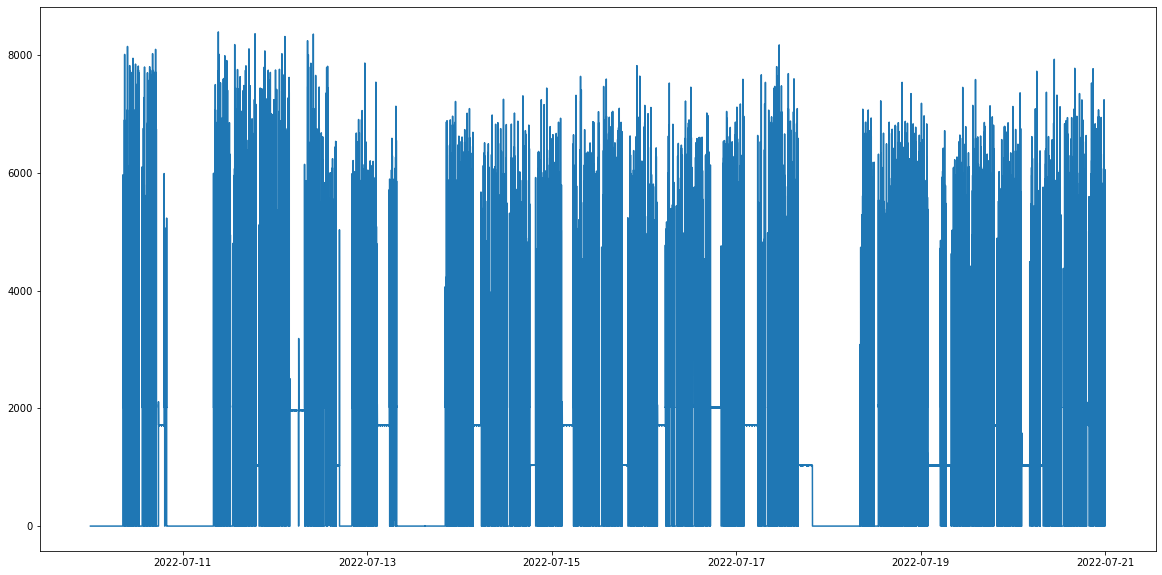

In [33]:
plt.figure(figsize = (20, 10))
plt.plot(df_VL04_mod3['current_spindle'])

7일간의 데이터로 초단위로 데이터 수집
초단위 인덱스가 모두 존재하는지 파악이 필요함
7일을 초단위로 환산할 경우 604800초이며, 위의 인덱스 값을 확인하였을때 607141로
약 2341개의 인덱스가 더 존재함

[ 1  5  9 11  7  3]


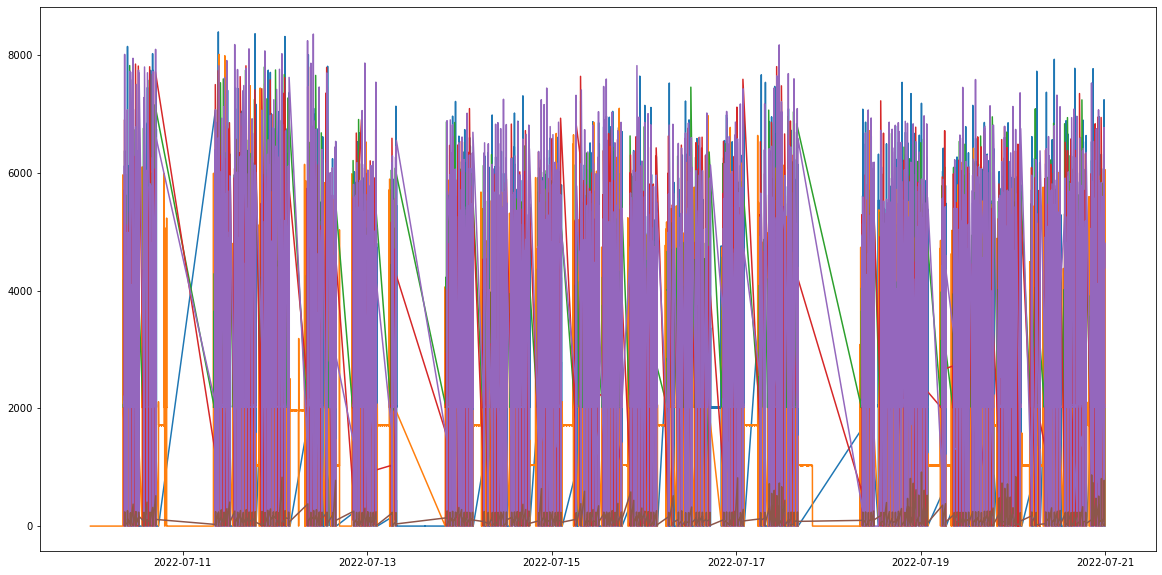

In [34]:
# Tool별 분리
print(df_VL04_mod3['tool'].unique())

for tool_idx in list(df_VL04_mod3['tool'].unique()):
    globals()['df_VL04_Tool{}'.format(tool_idx)] = df_VL04_mod3[df_VL04_mod3['tool'] == tool_idx]

plt.figure(figsize = (20, 10))
plt.plot(df_VL04_Tool7['current_spindle'])
plt.plot(df_VL04_Tool1['current_spindle'])
plt.plot(df_VL04_Tool5['current_spindle'])
plt.plot(df_VL04_Tool9['current_spindle'])
plt.plot(df_VL04_Tool11['current_spindle'])
plt.plot(df_VL04_Tool3['current_spindle'])

In [35]:
df_VL04_mod3['current_x']

datetime
2022-07-10 00:00:00     0.0
2022-07-10 00:00:01     0.0
2022-07-10 00:00:02     0.0
2022-07-10 00:00:03     0.0
2022-07-10 00:00:04     0.0
                       ... 
2022-07-20 23:59:55    31.2
2022-07-20 23:59:56    31.2
2022-07-20 23:59:57    31.0
2022-07-20 23:59:58    31.6
2022-07-20 23:59:59    31.2
Name: current_x, Length: 947236, dtype: float64

In [36]:
df_VL04_mod3['current_z']

datetime
2022-07-10 00:00:00    0.0
2022-07-10 00:00:01    0.0
2022-07-10 00:00:02    0.0
2022-07-10 00:00:03    0.0
2022-07-10 00:00:04    0.0
                      ... 
2022-07-20 23:59:55    2.0
2022-07-20 23:59:56    2.0
2022-07-20 23:59:57    2.0
2022-07-20 23:59:58    2.0
2022-07-20 23:59:59    2.0
Name: current_z, Length: 947236, dtype: float64

In [37]:
df_VL04_mod3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 947236 entries, 2022-07-10 00:00:00 to 2022-07-20 23:59:59
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             947236 non-null  object 
 1   hour             947236 non-null  object 
 2   minute           947236 non-null  object 
 3   second           947236 non-null  object 
 4   tool_number      947236 non-null  int64  
 5   tool             947236 non-null  int64  
 6   state            947236 non-null  object 
 7   shot_no          947236 non-null  float64
 8   current_x        947236 non-null  float64
 9   current_z        947236 non-null  float64
 10  current_spindle  947236 non-null  float64
 11  vibration        947236 non-null  float64
 12  pos_x_1          947236 non-null  float64
 13  pos_z_1          947236 non-null  float64
 14  rpm              947236 non-null  float64
 15  feed             947236 non-null  float64
 16  load

In [38]:
list_date = df_VL04_mod3['date'].unique()
sum_quantity = []
total_date = []
for date_idx in list_date:
    globals()['date_{}'.format(date_idx)] = len(df_VL04_mod3[df_VL04_mod3['date'] == date_idx]['shot_no'].unique())
    sum_quantity.append(globals()['date_{}'.format(date_idx)])
    total_date.append(date_idx)
    print('{} 일자의 생산개수(shot기준)는 {}입니다.'.format(date_idx, globals()['date_{}'.format(date_idx)]))
print('총 {}일 간의 일평균 생산개수는 {:.2f}개 입니다.'.format(len(total_date), np.mean(sum_quantity)))

2022-07-10 일자의 생산개수(shot기준)는 13입니다.
2022-07-11 일자의 생산개수(shot기준)는 18입니다.
2022-07-12 일자의 생산개수(shot기준)는 22입니다.
2022-07-13 일자의 생산개수(shot기준)는 12입니다.
2022-07-14 일자의 생산개수(shot기준)는 26입니다.
2022-07-15 일자의 생산개수(shot기준)는 25입니다.
2022-07-16 일자의 생산개수(shot기준)는 23입니다.
2022-07-17 일자의 생산개수(shot기준)는 18입니다.
2022-07-18 일자의 생산개수(shot기준)는 19입니다.
2022-07-19 일자의 생산개수(shot기준)는 24입니다.
2022-07-20 일자의 생산개수(shot기준)는 26입니다.
총 11일 간의 일평균 생산개수는 20.55개 입니다.


# Shot5836 Tool 순서
Shot5836의 경우 Tool7 -> Tool1(황삭) -> Tool5(황삭) -> Tool9(황삭) -> Tool11(정삭) -> Tool7(정삭) -> Tool3(정삭) 순으로 생산이 수행되고 있음

[5774. 5775. 5776. 5777. 5778. 5779. 5780. 5781. 5782. 5783. 5784. 5785.
 5786. 5787. 5788. 5789. 5790. 5791. 5792. 5793. 5794. 5795. 5796. 5797.
 5798. 5799. 5800. 5801. 5802. 5803. 5804. 5805. 5806. 5807. 5808. 5809.
 5810. 5811. 5812. 5813. 5814. 5815. 5816. 5817. 5818. 5819. 5820. 5821.
 5822. 5823. 5824. 5825. 5826. 5827. 5828. 5829. 5830. 5831. 5832. 5833.
 5834. 5835. 5836. 5837. 5838. 5839. 5840. 5841. 5842. 5843. 5844. 5845.
 5846. 5847. 5848. 5849. 5850. 5851. 5852. 5853. 5854. 5855. 5856. 5857.
 5858. 5859. 5860. 5861. 5862. 5863. 5864. 5865. 5866. 5867. 5868. 5869.
 5870. 5871. 5872. 5873. 5874. 5875. 5876. 5877. 5878. 5879. 5880. 5881.
 5882. 5883. 5884. 5885. 5886. 5887. 5888. 5889. 5890. 5891. 5892. 5893.
 5894. 5895. 5896. 5897. 5898. 5899. 5900. 5901. 5902. 5903. 5904. 5905.
 5906. 5907. 5908. 5909. 5910. 5911. 5912. 5913. 5914. 5915. 5916. 5917.
 5918. 5919. 5920. 5921. 5922. 5923. 5924. 5925. 5926. 5927. 5928. 5929.
 5930. 5931. 5932. 5933. 5934. 5935. 5936. 5937. 59

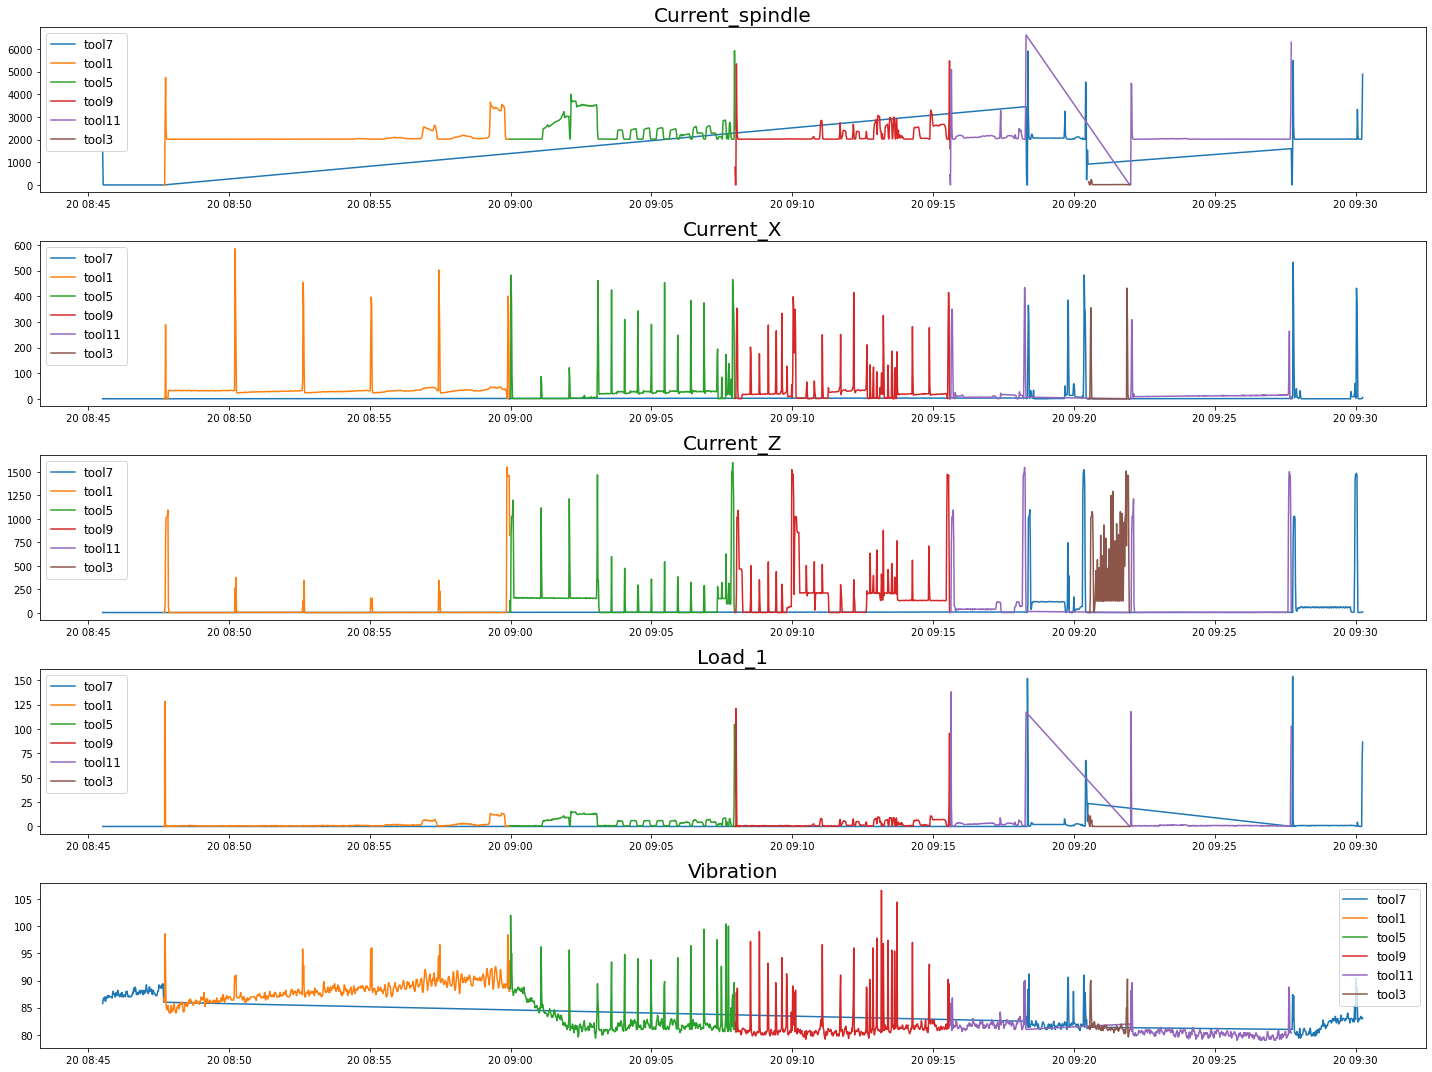

In [39]:
# 1개 shot에 대한 패턴 확인
print(df_VL04_mod3['shot_no'].unique())
Shot5972 = df_VL04_mod3[df_VL04_mod3['shot_no'] == 5972]
fig = plt.figure(figsize = (20, 15))
ax1 = fig.add_subplot(5,1,1)
plt.plot(Shot5972[Shot5972['tool']==7]['current_spindle'], label = 'tool7')
plt.plot(Shot5972[Shot5972['tool']==1]['current_spindle'], label = 'tool1')
plt.plot(Shot5972[Shot5972['tool']==5]['current_spindle'], label = 'tool5')
plt.plot(Shot5972[Shot5972['tool']==9]['current_spindle'], label = 'tool9')
plt.plot(Shot5972[Shot5972['tool']==11]['current_spindle'], label = 'tool11')
plt.plot(Shot5972[Shot5972['tool']==3]['current_spindle'], label = 'tool3')
ax1.set_title('Current_spindle', fontsize = 20)
plt.legend(fontsize = 12)

ax2 = fig.add_subplot(5,1,2)
ax2.plot(Shot5972[Shot5972['tool']==7]['current_x'], label = 'tool7')
ax2.plot(Shot5972[Shot5972['tool']==1]['current_x'], label = 'tool1')
ax2.plot(Shot5972[Shot5972['tool']==5]['current_x'], label = 'tool5')
ax2.plot(Shot5972[Shot5972['tool']==9]['current_x'], label = 'tool9')
ax2.plot(Shot5972[Shot5972['tool']==11]['current_x'], label = 'tool11')
ax2.plot(Shot5972[Shot5972['tool']==3]['current_x'], label = 'tool3')
ax2.set_title('Current_X', fontsize = 20)
ax2.legend(fontsize = 12)

ax3 = fig.add_subplot(5,1,3)
ax3.plot(Shot5972[Shot5972['tool']==7]['current_z'], label = 'tool7')
ax3.plot(Shot5972[Shot5972['tool']==1]['current_z'], label = 'tool1')
ax3.plot(Shot5972[Shot5972['tool']==5]['current_z'], label = 'tool5')
ax3.plot(Shot5972[Shot5972['tool']==9]['current_z'], label = 'tool9')
ax3.plot(Shot5972[Shot5972['tool']==11]['current_z'], label = 'tool11')
ax3.plot(Shot5972[Shot5972['tool']==3]['current_z'], label = 'tool3')
ax3.set_title('Current_Z', fontsize = 20)
ax3.legend(fontsize = 12)

ax4 = fig.add_subplot(5,1,4)
ax4.plot(Shot5972[Shot5972['tool']==7]['load_1'], label = 'tool7')
ax4.plot(Shot5972[Shot5972['tool']==1]['load_1'], label = 'tool1')
ax4.plot(Shot5972[Shot5972['tool']==5]['load_1'], label = 'tool5')
ax4.plot(Shot5972[Shot5972['tool']==9]['load_1'], label = 'tool9')
ax4.plot(Shot5972[Shot5972['tool']==11]['load_1'], label = 'tool11')
ax4.plot(Shot5972[Shot5972['tool']==3]['load_1'], label = 'tool3')
ax4.set_title('Load_1', fontsize = 20)
ax4.legend(fontsize = 12)

ax5 = fig.add_subplot(5,1,5)
ax5.plot(Shot5972[Shot5972['tool']==7]['vibration'], label = 'tool7')
ax5.plot(Shot5972[Shot5972['tool']==1]['vibration'], label = 'tool1')
ax5.plot(Shot5972[Shot5972['tool']==5]['vibration'], label = 'tool5')
ax5.plot(Shot5972[Shot5972['tool']==9]['vibration'], label = 'tool9')
ax5.plot(Shot5972[Shot5972['tool']==11]['vibration'], label = 'tool11')
ax5.plot(Shot5972[Shot5972['tool']==3]['vibration'], label = 'tool3')
ax5.set_title('Vibration', fontsize = 20)
ax5.legend(fontsize = 12)

fig.tight_layout()
plt.show()

1. Current spindle과 Load_1은 거의 같은 패턴이 나타나고 있음
2. Current X, Current Z와 진동이 거의 비슷한 패턴이 발생하고 있음

                 tool_number   shot_no  current_x  current_z  current_spindle  \
tool_number         1.000000  0.036492   0.019148   0.129825         0.171969   
shot_no             0.036492  1.000000   0.114355   0.110065         0.160878   
current_x           0.019148  0.114355   1.000000   0.420625         0.198986   
current_z           0.129825  0.110065   0.420625   1.000000         0.119756   
current_spindle     0.171969  0.160878   0.198986   0.119756         1.000000   
vibration          -0.079991 -0.719152  -0.136274  -0.140127        -0.198546   
pos_x_1            -0.417530 -0.124725  -0.125515  -0.191496        -0.601763   
pos_z_1            -0.068860 -0.209263  -0.099791  -0.082113        -0.805669   
rpm                 0.337731  0.164727   0.220827   0.146352         0.859682   
feed                0.061624  0.024004   0.481068   0.557373         0.080300   
load_1              0.081352  0.028768   0.022782   0.016459         0.327626   
servo_load_x       -0.168191

<AxesSubplot:>

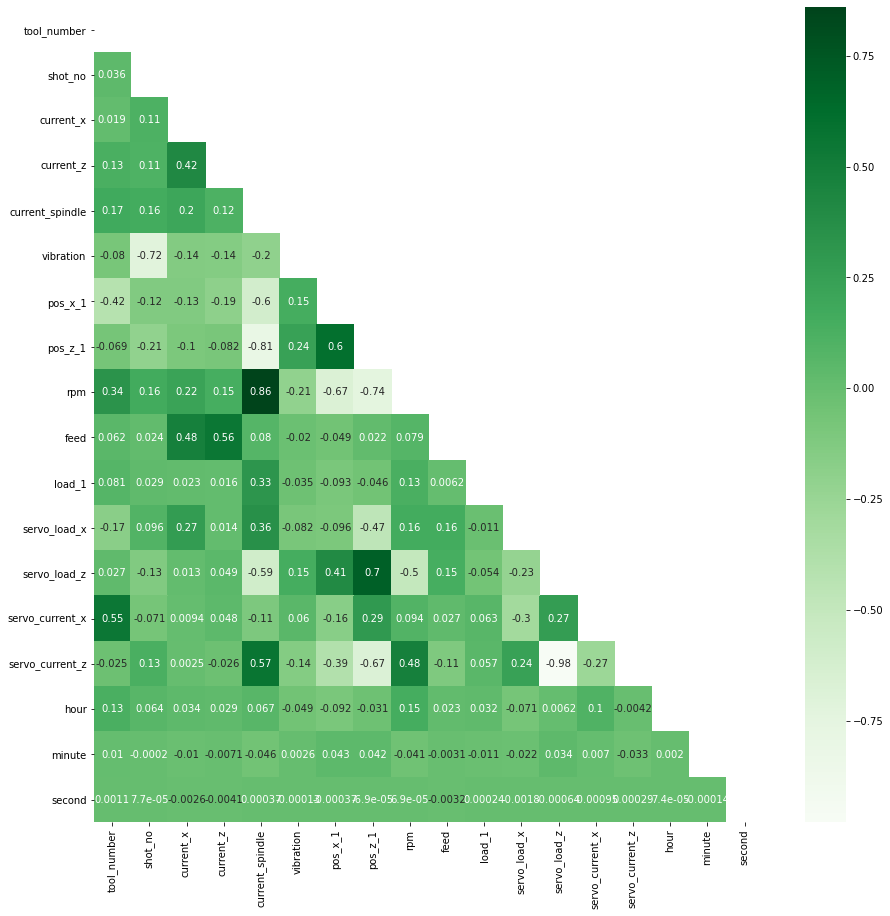

In [40]:
import seaborn as sns
VL04_corr = df_VL04_mod2.corr()
print(VL04_corr)

#삼각형 마스크 만들기
mask = np.zeros_like(VL04_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.rcParams['figure.figsize'] = (15,15)
sns.heatmap(VL04_corr, annot = True, cmap = 'Greens', mask = mask)

# 3개 연속 Shot5836 Tool 순서 확인
Shot 5888. 5889. 5890에 대하여 확인 

[5774. 5775. 5776. 5777. 5778. 5779. 5780. 5781. 5782. 5783. 5784. 5785.
 5786. 5787. 5788. 5789. 5790. 5791. 5792. 5793. 5794. 5795. 5796. 5797.
 5798. 5799. 5800. 5801. 5802. 5803. 5804. 5805. 5806. 5807. 5808. 5809.
 5810. 5811. 5812. 5813. 5814. 5815. 5816. 5817. 5818. 5819. 5820. 5821.
 5822. 5823. 5824. 5825. 5826. 5827. 5828. 5829. 5830. 5831. 5832. 5833.
 5834. 5835. 5836. 5837. 5838. 5839. 5840. 5841. 5842. 5843. 5844. 5845.
 5846. 5847. 5848. 5849. 5850. 5851. 5852. 5853. 5854. 5855. 5856. 5857.
 5858. 5859. 5860. 5861. 5862. 5863. 5864. 5865. 5866. 5867. 5868. 5869.
 5870. 5871. 5872. 5873. 5874. 5875. 5876. 5877. 5878. 5879. 5880. 5881.
 5882. 5883. 5884. 5885. 5886. 5887. 5888. 5889. 5890. 5891. 5892. 5893.
 5894. 5895. 5896. 5897. 5898. 5899. 5900. 5901. 5902. 5903. 5904. 5905.
 5906. 5907. 5908. 5909. 5910. 5911. 5912. 5913. 5914. 5915. 5916. 5917.
 5918. 5919. 5920. 5921. 5922. 5923. 5924. 5925. 5926. 5927. 5928. 5929.
 5930. 5931. 5932. 5933. 5934. 5935. 5936. 5937. 59

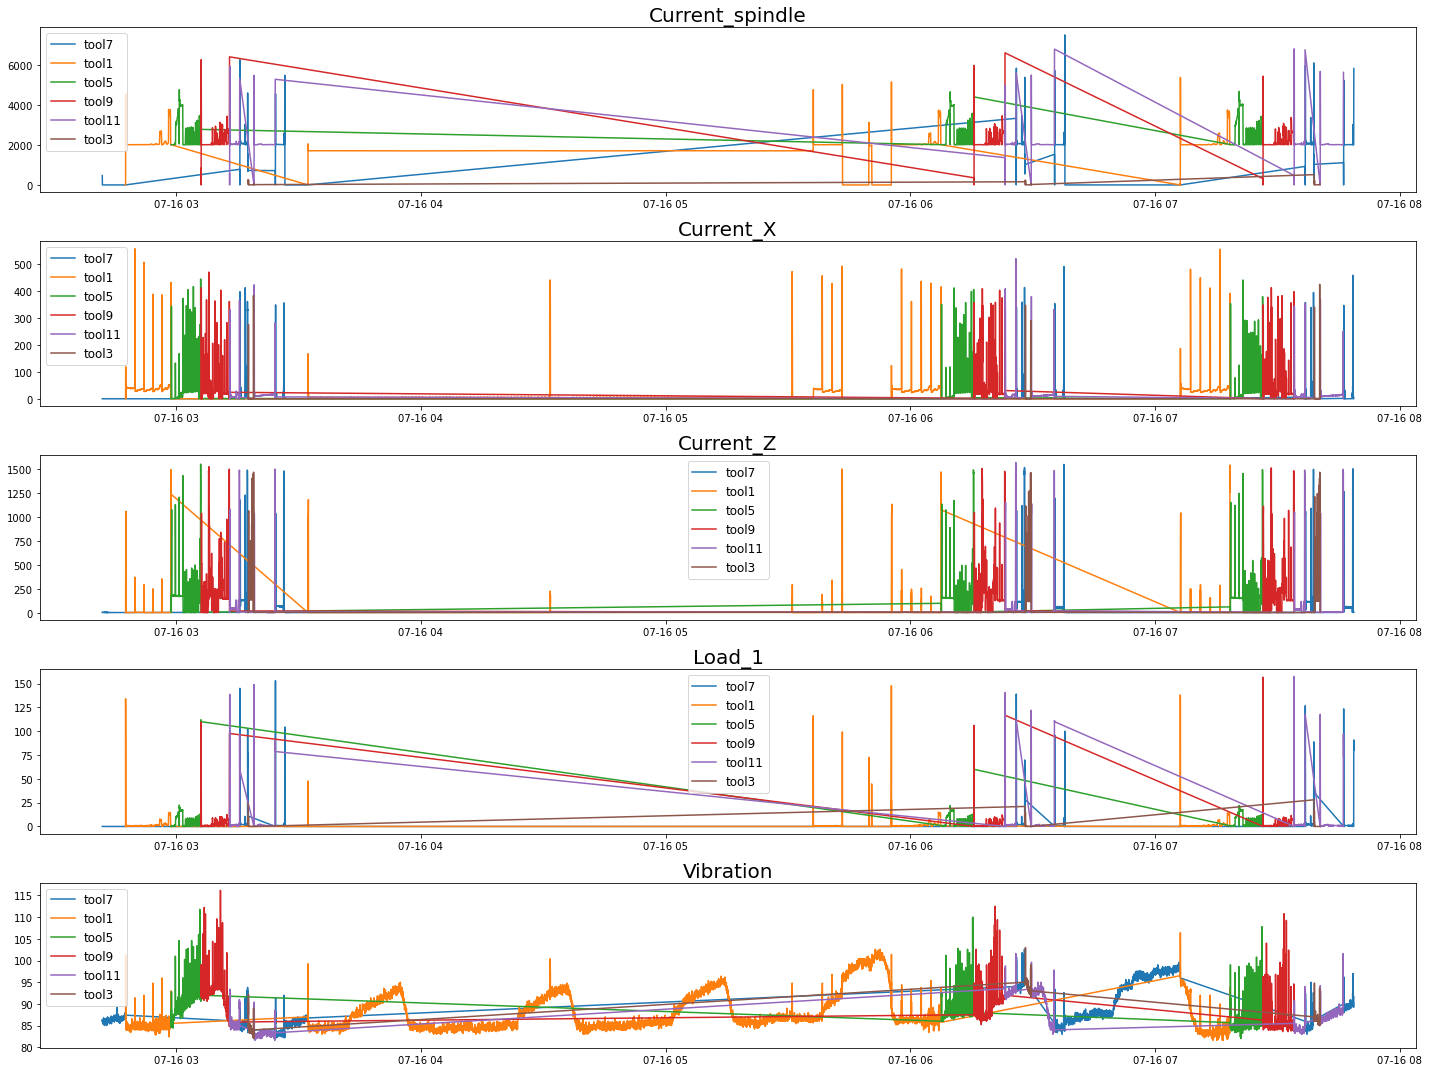

In [41]:
# 1개 shot에 대한 패턴 확인
print(df_VL04_mod3['shot_no'].unique())
Shot5888_3 = df_VL04_mod3[(df_VL04_mod3['shot_no'] == 5888) | (df_VL04_mod3['shot_no'] == 5889) | (df_VL04_mod3['shot_no'] == 5890)]
fig = plt.figure(figsize = (20, 15))
ax1 = fig.add_subplot(5,1,1)
plt.plot(Shot5888_3[Shot5888_3['tool']==7]['current_spindle'], label = 'tool7')
plt.plot(Shot5888_3[Shot5888_3['tool']==1]['current_spindle'], label = 'tool1')
plt.plot(Shot5888_3[Shot5888_3['tool']==5]['current_spindle'], label = 'tool5')
plt.plot(Shot5888_3[Shot5888_3['tool']==9]['current_spindle'], label = 'tool9')
plt.plot(Shot5888_3[Shot5888_3['tool']==11]['current_spindle'], label = 'tool11')
plt.plot(Shot5888_3[Shot5888_3['tool']==3]['current_spindle'], label = 'tool3')
ax1.set_title('Current_spindle', fontsize = 20)
plt.legend(fontsize = 12)

ax2 = fig.add_subplot(5,1,2)
ax2.plot(Shot5888_3[Shot5888_3['tool']==7]['current_x'], label = 'tool7')
ax2.plot(Shot5888_3[Shot5888_3['tool']==1]['current_x'], label = 'tool1')
ax2.plot(Shot5888_3[Shot5888_3['tool']==5]['current_x'], label = 'tool5')
ax2.plot(Shot5888_3[Shot5888_3['tool']==9]['current_x'], label = 'tool9')
ax2.plot(Shot5888_3[Shot5888_3['tool']==11]['current_x'], label = 'tool11')
ax2.plot(Shot5888_3[Shot5888_3['tool']==3]['current_x'], label = 'tool3')
ax2.set_title('Current_X', fontsize = 20)
ax2.legend(fontsize = 12)

ax3 = fig.add_subplot(5,1,3)
ax3.plot(Shot5888_3[Shot5888_3['tool']==7]['current_z'], label = 'tool7')
ax3.plot(Shot5888_3[Shot5888_3['tool']==1]['current_z'], label = 'tool1')
ax3.plot(Shot5888_3[Shot5888_3['tool']==5]['current_z'], label = 'tool5')
ax3.plot(Shot5888_3[Shot5888_3['tool']==9]['current_z'], label = 'tool9')
ax3.plot(Shot5888_3[Shot5888_3['tool']==11]['current_z'], label = 'tool11')
ax3.plot(Shot5888_3[Shot5888_3['tool']==3]['current_z'], label = 'tool3')
ax3.set_title('Current_Z', fontsize = 20)
ax3.legend(fontsize = 12)

ax4 = fig.add_subplot(5,1,4)
ax4.plot(Shot5888_3[Shot5888_3['tool']==7]['load_1'], label = 'tool7')
ax4.plot(Shot5888_3[Shot5888_3['tool']==1]['load_1'], label = 'tool1')
ax4.plot(Shot5888_3[Shot5888_3['tool']==5]['load_1'], label = 'tool5')
ax4.plot(Shot5888_3[Shot5888_3['tool']==9]['load_1'], label = 'tool9')
ax4.plot(Shot5888_3[Shot5888_3['tool']==11]['load_1'], label = 'tool11')
ax4.plot(Shot5888_3[Shot5888_3['tool']==3]['load_1'], label = 'tool3')
ax4.set_title('Load_1', fontsize = 20)
ax4.legend(fontsize = 12)

ax5 = fig.add_subplot(5,1,5)
ax5.plot(Shot5888_3[Shot5888_3['tool']==7]['vibration'], label = 'tool7')
ax5.plot(Shot5888_3[Shot5888_3['tool']==1]['vibration'], label = 'tool1')
ax5.plot(Shot5888_3[Shot5888_3['tool']==5]['vibration'], label = 'tool5')
ax5.plot(Shot5888_3[Shot5888_3['tool']==9]['vibration'], label = 'tool9')
ax5.plot(Shot5888_3[Shot5888_3['tool']==11]['vibration'], label = 'tool11')
ax5.plot(Shot5888_3[Shot5888_3['tool']==3]['vibration'], label = 'tool3')
ax5.set_title('Vibration', fontsize = 20)
ax5.legend(fontsize = 12)

fig.tight_layout()
plt.show()

# 3 shot Tool 순서
Tool7(미세하게) -> Tool1(황삭) -> Tool5(황삭) -> Tool9(황삭) -> Tool11(정삭) -> Tool7(정삭) -> Tool3(정삭) 순으로 생산이 수행되고 있음
shot5836과 같은 순서로 이루어지고 있음

# 공구별 교체 이력 정보
1. Tool1 : 2022-07-10 9:36, 2022-07-18 10:56
2. Tool5 : 2022-07-10 9:36, 2022-07-18 10:56, 2022-07-20 5:55 교체
3. Tool9 : 2022-07-10 9:36, 2022-07-15 15:23, 2022-07-18 10:56 교체
4. Tool11 : 교체정보 없음
5. Tool7 : 2022-07-14 10:51 교체

# Tool1 시각화

<AxesSubplot:>

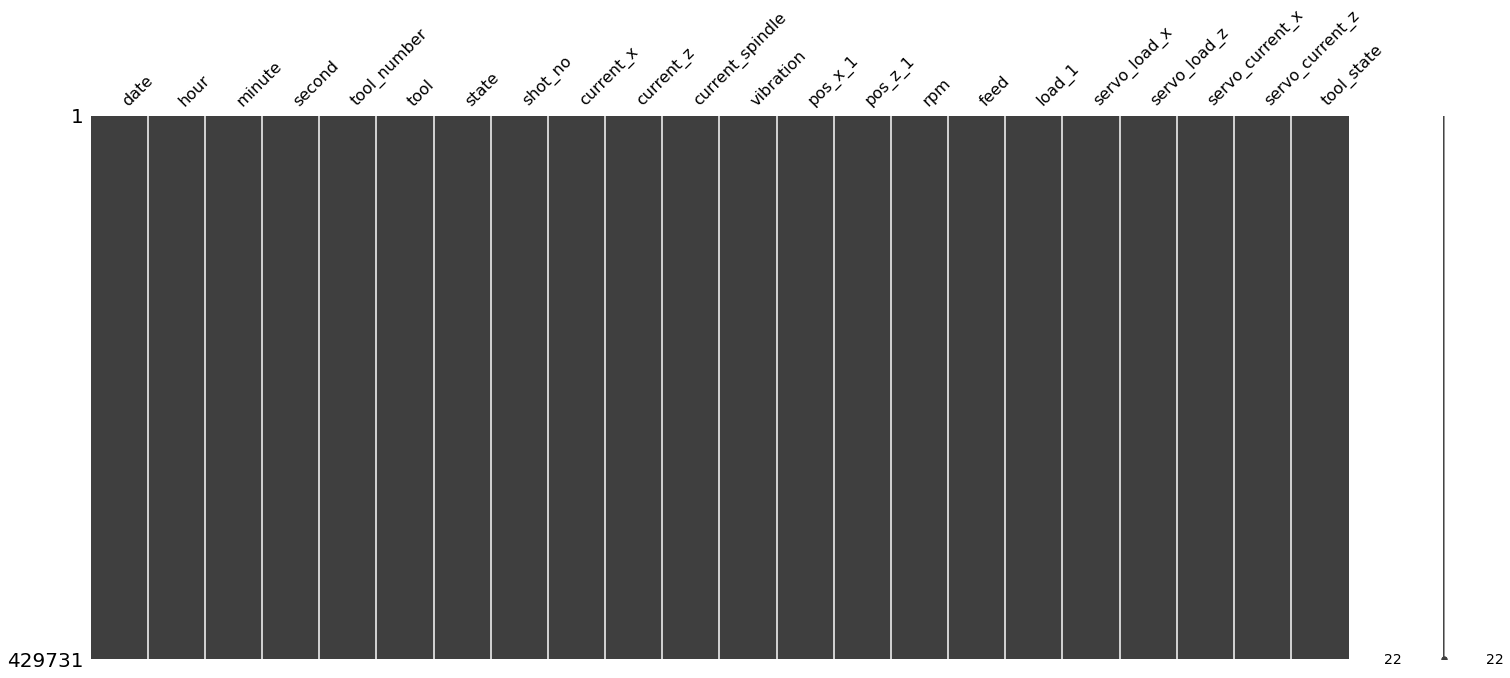

In [42]:
msno.matrix(df_VL04_Tool1)

In [43]:
df_VL04_Tool1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 429731 entries, 2022-07-10 00:00:00 to 2022-07-20 23:59:59
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             429731 non-null  object 
 1   hour             429731 non-null  object 
 2   minute           429731 non-null  object 
 3   second           429731 non-null  object 
 4   tool_number      429731 non-null  int64  
 5   tool             429731 non-null  int64  
 6   state            429731 non-null  object 
 7   shot_no          429731 non-null  float64
 8   current_x        429731 non-null  float64
 9   current_z        429731 non-null  float64
 10  current_spindle  429731 non-null  float64
 11  vibration        429731 non-null  float64
 12  pos_x_1          429731 non-null  float64
 13  pos_z_1          429731 non-null  float64
 14  rpm              429731 non-null  float64
 15  feed             429731 non-null  float64
 16  load

# 1차 교체지점 탐색(07-10 9:36)

<AxesSubplot:xlabel='datetime'>

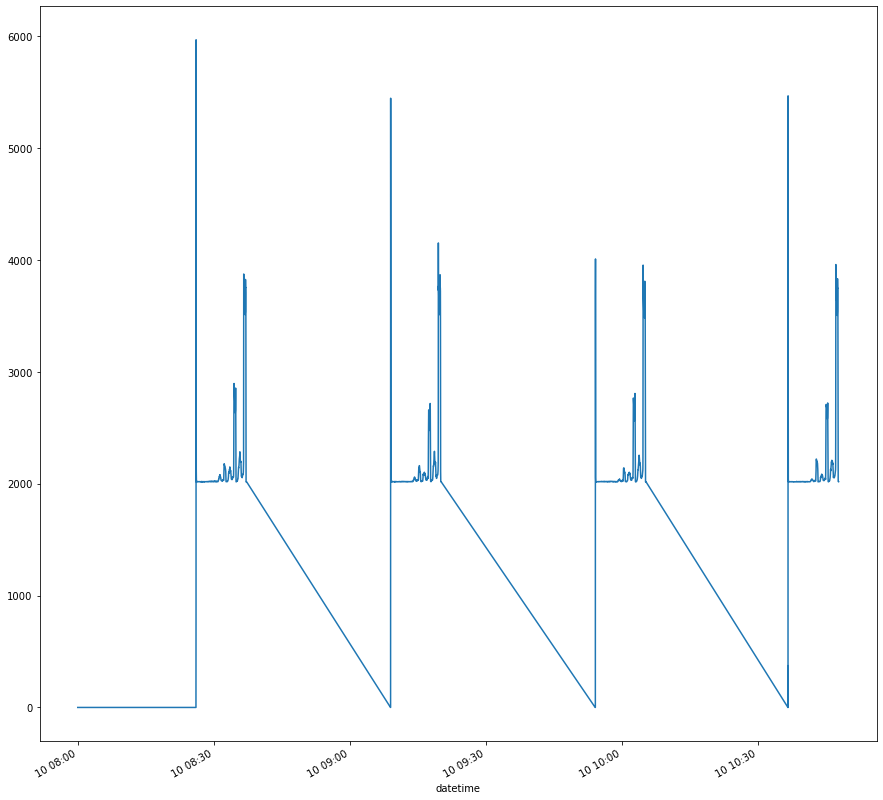

In [44]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & ((df_VL04_Tool1['hour'] == '8') | (df_VL04_Tool1['hour'] == '9') | (df_VL04_Tool1['hour'] == '10'))]['current_spindle'].plot()

In [45]:
max(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '8')].index)

Timestamp('2022-07-10 08:37:14')

In [46]:
min(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '9')].index)

Timestamp('2022-07-10 09:08:57')

In [47]:
min(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '9')].index) - max(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '8')].index)

Timedelta('0 days 00:31:43')

In [48]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '9') & (df_VL04_Tool1['shot_no'] == 5775.0)]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-10 09:08:57,2022-07-10,9,8,57,100,1,cancel,5775.0,0.0,0.0,0.0,201.5,640000.0,483830.0,0.0,0.0,0.0,4.0,72.0,4.0,-72.0,취소
2022-07-10 09:08:58,2022-07-10,9,8,58,100,1,cancel,5775.0,0.0,0.0,0.0,200.0,640000.0,483830.0,0.0,12000.0,0.0,4.0,73.0,4.0,-73.0,취소
2022-07-10 09:08:59,2022-07-10,9,8,59,100,1,cancel,5775.0,0.0,0.0,0.0,200.0,640000.0,483830.0,0.0,0.0,0.0,3.0,73.0,3.0,-73.0,취소
2022-07-10 09:08:59,2022-07-10,9,8,59,101,1,operation,5775.0,0.0,0.0,166.0,200.0,665807.0,483429.0,1.0,0.0,161.0,7.0,72.0,7.0,-72.0,가공
2022-07-10 09:09:00,2022-07-10,9,9,0,101,1,operation,5775.0,0.0,0.0,5444.5,203.0,685403.5,472762.5,233.5,3535.5,45.5,37.5,27.5,37.5,-27.5,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10 09:20:05,2022-07-10,9,20,5,101,1,operation,5775.0,0.0,0.0,2017.0,199.0,352667.0,201583.0,300.0,0.0,0.0,22.0,80.0,22.0,-80.0,가공
2022-07-10 09:20:06,2022-07-10,9,20,6,101,1,operation,5775.0,0.0,0.0,2017.0,198.5,520666.5,285583.5,299.0,7071.0,0.0,20.0,80.0,20.0,-80.0,가공
2022-07-10 09:20:07,2022-07-10,9,20,7,101,1,operation,5775.0,0.0,0.0,2017.0,198.5,661237.0,374916.5,299.0,6035.5,0.0,6.0,80.0,6.0,-80.0,가공


In [49]:
min(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '9') & (df_VL04_Tool1['shot_no'] == 5775.0)].index)

Timestamp('2022-07-10 09:08:57')

In [50]:
max(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '9') & (df_VL04_Tool1['shot_no'] == 5775.0)].index)

Timestamp('2022-07-10 09:20:09')

In [51]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '8') & (df_VL04_Tool1['minute'] == '26') & (df_VL04_Tool1['shot_no'] == 5774.0)].head(1000)

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-10 08:26:00,2022-07-10,8,26,0,101,1,operation,5774.0,0.0,0.0,0.000000,199.000000,640000.000000,483830.0,0.000000,0.0,0.000000,4.000000,71.000000,4.000000,-71.000000,가공
2022-07-10 08:26:01,2022-07-10,8,26,1,101,1,operation,5774.0,0.0,0.0,0.000000,200.000000,640000.000000,483830.0,0.000000,0.0,0.000000,3.500000,71.000000,3.500000,-71.000000,가공
2022-07-10 08:26:02,2022-07-10,8,26,2,100,1,cancel,5774.0,0.0,0.0,0.000000,199.000000,640000.000000,483830.0,0.000000,0.0,0.000000,3.000000,72.000000,3.000000,-72.000000,취소
2022-07-10 08:26:02,2022-07-10,8,26,2,101,1,operation,5774.0,0.0,0.0,0.000000,199.000000,640000.000000,483830.0,0.000000,0.0,0.000000,4.000000,71.000000,4.000000,-71.000000,가공
2022-07-10 08:26:03,2022-07-10,8,26,3,100,1,cancel,5774.0,0.0,0.0,0.000000,199.500000,640000.000000,483830.0,0.000000,0.0,0.000000,3.000000,72.000000,3.000000,-72.000000,취소
2022-07-10 08:26:04,2022-07-10,8,26,4,100,1,cancel,5774.0,0.0,0.0,0.000000,198.500000,640000.000000,483830.0,0.000000,6000.0,0.000000,2.000000,72.000000,2.500000,-72.000000,취소
2022-07-10 08:26:05,2022-07-10,8,26,5,101,1,operation,5774.0,0.0,0.0,875.000000,197.500000,665807.000000,483429.0,39.500000,0.0,156.000000,2.500000,72.000000,2.500000,-72.000000,가공
2022-07-10 08:26:06,2022-07-10,8,26,6,101,1,operation,5774.0,0.0,0.0,5966.500000,197.500000,690737.000000,455429.0,294.500000,6035.5,4.500000,10.000000,55.500000,10.000000,-55.500000,가공
2022-07-10 08:26:07,2022-07-10,8,26,7,101,1,operation,5774.0,0.0,0.0,2862.500000,197.000000,705000.000000,372762.0,299.500000,5000.0,0.500000,7.000000,56.000000,7.000000,-56.000000,가공


In [52]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10')  & (df_VL04_Tool1['shot_no'] == 5774.0)]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-10 00:00:00,2022-07-10,0,0,0,101,1,operation,5774.0,0.0,0.0,0.0,200.000000,640000.0,483830.0,0.0,0.0,0.0,3.5,70.5,3.5,-70.5,가공
2022-07-10 00:00:01,2022-07-10,0,0,1,101,1,operation,5774.0,0.0,0.0,0.0,201.500000,640000.0,483830.0,0.0,0.0,0.0,3.5,71.0,3.5,-71.0,가공
2022-07-10 00:00:02,2022-07-10,0,0,2,101,1,operation,5774.0,0.0,0.0,0.0,199.000000,640000.0,483830.0,0.0,0.0,0.0,4.0,71.0,4.0,-71.0,가공
2022-07-10 00:00:03,2022-07-10,0,0,3,101,1,operation,5774.0,0.0,0.0,0.0,199.666667,640000.0,483830.0,0.0,0.0,0.0,4.0,71.0,4.0,-71.0,가공
2022-07-10 00:00:04,2022-07-10,0,0,4,101,1,operation,5774.0,0.0,0.0,0.0,201.500000,640000.0,483830.0,0.0,0.0,0.0,3.5,71.0,3.5,-71.0,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10 08:37:10,2022-07-10,8,37,10,101,1,operation,5774.0,0.0,0.0,2016.5,201.500000,357333.5,192956.5,299.0,3510.0,1.0,12.0,69.5,12.0,-69.5,가공
2022-07-10 08:37:11,2022-07-10,8,37,11,101,1,operation,5774.0,0.0,0.0,2017.0,200.500000,498000.0,274250.0,299.0,7071.0,1.0,21.0,80.5,21.0,-80.5,가공
2022-07-10 08:37:12,2022-07-10,8,37,12,101,1,operation,5774.0,0.0,0.0,2017.0,200.000000,615333.0,332917.0,299.0,7071.0,1.0,14.0,81.0,14.0,-81.0,가공


In [53]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['shot_no'] == 5775.0)]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-10 09:08:57,2022-07-10,9,8,57,100,1,cancel,5775.0,0.0,0.0,0.0,201.5,640000.0,483830.0,0.0,0.0,0.0,4.0,72.0,4.0,-72.0,취소
2022-07-10 09:08:58,2022-07-10,9,8,58,100,1,cancel,5775.0,0.0,0.0,0.0,200.0,640000.0,483830.0,0.0,12000.0,0.0,4.0,73.0,4.0,-73.0,취소
2022-07-10 09:08:59,2022-07-10,9,8,59,100,1,cancel,5775.0,0.0,0.0,0.0,200.0,640000.0,483830.0,0.0,0.0,0.0,3.0,73.0,3.0,-73.0,취소
2022-07-10 09:08:59,2022-07-10,9,8,59,101,1,operation,5775.0,0.0,0.0,166.0,200.0,665807.0,483429.0,1.0,0.0,161.0,7.0,72.0,7.0,-72.0,가공
2022-07-10 09:09:00,2022-07-10,9,9,0,101,1,operation,5775.0,0.0,0.0,5444.5,203.0,685403.5,472762.5,233.5,3535.5,45.5,37.5,27.5,37.5,-27.5,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10 09:20:05,2022-07-10,9,20,5,101,1,operation,5775.0,0.0,0.0,2017.0,199.0,352667.0,201583.0,300.0,0.0,0.0,22.0,80.0,22.0,-80.0,가공
2022-07-10 09:20:06,2022-07-10,9,20,6,101,1,operation,5775.0,0.0,0.0,2017.0,198.5,520666.5,285583.5,299.0,7071.0,0.0,20.0,80.0,20.0,-80.0,가공
2022-07-10 09:20:07,2022-07-10,9,20,7,101,1,operation,5775.0,0.0,0.0,2017.0,198.5,661237.0,374916.5,299.0,6035.5,0.0,6.0,80.0,6.0,-80.0,가공


In [54]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['shot_no'] == 5776.0)]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-10 09:54:05,2022-07-10,9,54,5,100,1,cancel,5776.0,0.0,0.0,0.0,202.0,640000.0,483830.0,0.0,0.0,0.0,4.0,71.0,4.0,-71.0,취소
2022-07-10 09:54:06,2022-07-10,9,54,6,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,0.0,0.0,4.0,71.5,4.0,-71.5,취소
2022-07-10 09:54:07,2022-07-10,9,54,7,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,12000.0,0.0,3.5,71.5,3.5,-71.5,취소
2022-07-10 09:54:08,2022-07-10,9,54,8,100,1,cancel,5776.0,0.0,0.0,0.0,199.0,640000.0,483830.0,0.0,0.0,0.0,3.0,72.0,3.0,-72.0,취소
2022-07-10 09:54:08,2022-07-10,9,54,8,101,1,operation,5776.0,0.0,0.0,1845.0,200.0,665807.0,483429.0,2.0,0.0,158.0,7.0,71.0,7.0,-71.0,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10 10:05:14,2022-07-10,10,5,14,101,1,operation,5776.0,0.0,0.0,2018.0,204.5,407333.5,228916.5,300.0,7071.0,0.0,22.0,79.5,22.0,-79.5,가공
2022-07-10 10:05:15,2022-07-10,10,5,15,101,1,operation,5776.0,0.0,0.0,2018.0,203.5,575333.0,312917.0,299.0,7071.0,0.0,22.0,79.5,-2.0,-79.5,가공
2022-07-10 10:05:16,2022-07-10,10,5,16,101,1,operation,5776.0,0.0,0.0,2018.0,203.0,665807.0,378250.0,299.0,5000.0,0.0,6.0,79.0,6.0,-79.0,가공


In [55]:
pd.Timestamp('2022-07-10 09:20:09') - pd.Timestamp('2022-07-10 09:08:59')

Timedelta('0 days 00:11:10')

In [56]:
pd.Timestamp('2022-07-10 09:54:07') - pd.Timestamp('2022-07-10 09:20:09')

Timedelta('0 days 00:33:58')

1. shot5774 2022-07-10 08:26:05 ~ 2022-07-10 08:37:14로 약 11분 8초
 - 2022-07-10 08:37:15 ~ 2022-07-10 09:08:58 약 31분 43초
2. shot5775 2022-07-10 09:08:59 ~ 2022-07-10 09:20:09로 약 11분 10초
 - 사이에 유후 시간은 2022-07-10 09:20:10 ~ 09:54:08 약 33분 58초

In [57]:
min(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '9') & (df_VL04_Tool1['shot_no'] == 5776.0)].index)

Timestamp('2022-07-10 09:54:05')

In [58]:
min(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '9') & (df_VL04_Tool1['shot_no'] == 5776.0)].index) -  max(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '9') & (df_VL04_Tool1['shot_no'] == 5775.0)].index)

Timedelta('0 days 00:33:56')

In [59]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '9')]['minute'].value_counts()

17    60
9     60
58    60
57    60
56    60
55    60
19    60
18    60
59    60
16    60
15    60
14    60
13    60
12    60
11    60
10    60
54    56
20    10
8      4
Name: minute, dtype: int64

In [60]:
sorted(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '9')]['minute'].value_counts().index)

['10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '8',
 '9']

In [61]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-10') & (df_VL04_Tool1['hour'] == '9')]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-10 09:08:57,2022-07-10,9,8,57,100,1,cancel,5775.0,0.0,0.0,0.0,201.5,640000.0,483830.0,0.0,0.0,0.0,4.0,72.0,4.0,-72.0,취소
2022-07-10 09:08:58,2022-07-10,9,8,58,100,1,cancel,5775.0,0.0,0.0,0.0,200.0,640000.0,483830.0,0.0,12000.0,0.0,4.0,73.0,4.0,-73.0,취소
2022-07-10 09:08:59,2022-07-10,9,8,59,100,1,cancel,5775.0,0.0,0.0,0.0,200.0,640000.0,483830.0,0.0,0.0,0.0,3.0,73.0,3.0,-73.0,취소
2022-07-10 09:08:59,2022-07-10,9,8,59,101,1,operation,5775.0,0.0,0.0,166.0,200.0,665807.0,483429.0,1.0,0.0,161.0,7.0,72.0,7.0,-72.0,가공
2022-07-10 09:09:00,2022-07-10,9,9,0,101,1,operation,5775.0,0.0,0.0,5444.5,203.0,685403.5,472762.5,233.5,3535.5,45.5,37.5,27.5,37.5,-27.5,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10 09:59:55,2022-07-10,9,59,55,101,1,operation,5776.0,0.0,0.0,2018.5,201.0,494641.0,4250.0,299.5,82.0,1.0,9.5,58.0,-9.5,-58.0,가공
2022-07-10 09:59:56,2022-07-10,9,59,56,101,1,operation,5776.0,0.0,0.0,2018.0,200.5,492005.0,4250.0,299.0,82.0,1.0,9.0,58.0,-9.0,-58.0,가공
2022-07-10 09:59:57,2022-07-10,9,59,57,101,1,operation,5776.0,0.0,0.0,2018.5,201.5,488798.5,4250.0,299.0,82.0,1.0,8.5,58.0,-8.5,-58.0,가공


In [62]:
df_VL04_Tool1.loc['2022-07-10 09:20:10':'2022-07-10 09:54:04']

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,


9시20분10초부터 9시54분04초까지 시간이 비어있음
교체시점은 9시36분임

'2022-07-10 09:20:10':'2022-07-10 09:54:04'

# 2차 교체지점 탐색(07-18 10:56)

<AxesSubplot:xlabel='datetime'>

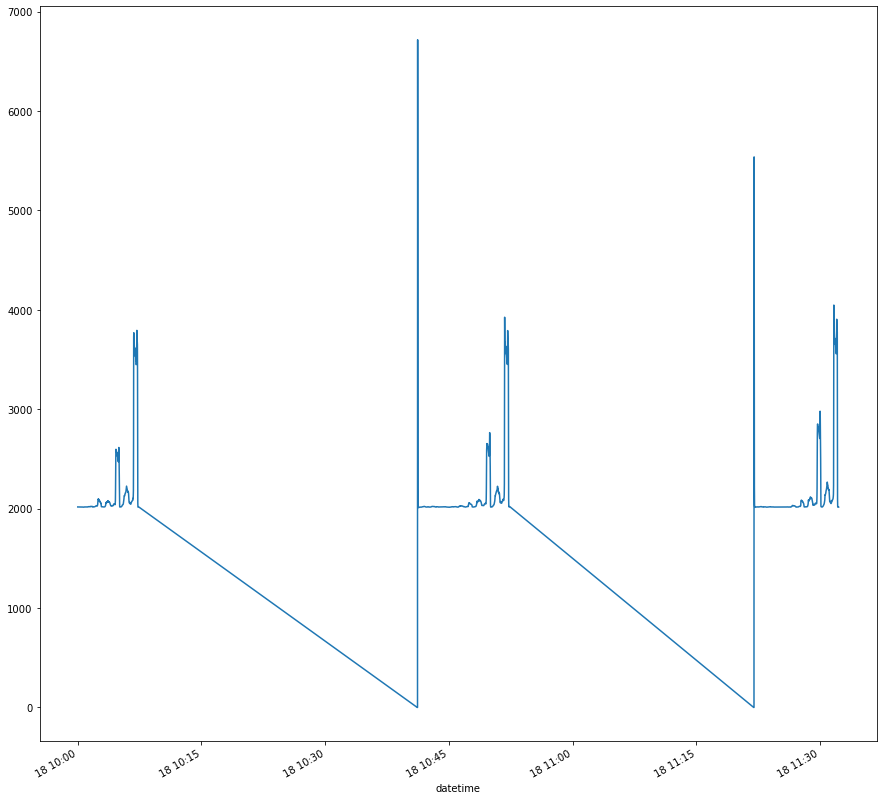

In [63]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & ((df_VL04_Tool1['hour'] == '10') | (df_VL04_Tool1['hour'] == '11'))]['current_spindle'].plot()

In [64]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour'] == '10')]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-18 10:00:00,2022-07-18,10,0,0,101,1,operation,5925.0,33.2,4.8,2017.0,85.0,468157.6,6250.0,299.8,82.0,0.2,9.2,58.6,-9.2,-58.6,가공
2022-07-18 10:00:01,2022-07-18,10,0,1,101,1,operation,5925.0,33.0,4.4,2017.0,85.4,465698.0,6250.0,299.4,82.0,1.0,9.0,58.6,-9.0,-58.6,가공
2022-07-18 10:00:02,2022-07-18,10,0,2,101,1,operation,5925.0,33.2,4.0,2017.0,86.0,462763.2,6250.0,299.0,82.0,0.2,9.2,58.4,-9.2,-58.4,가공
2022-07-18 10:00:03,2022-07-18,10,0,3,101,1,operation,5925.0,33.6,4.0,2016.8,86.0,459934.0,6250.0,299.4,82.0,0.2,9.0,58.2,-9.0,-58.2,가공
2022-07-18 10:00:04,2022-07-18,10,0,4,101,1,operation,5925.0,33.8,4.0,2016.2,86.0,457034.8,6250.0,299.6,82.0,0.4,9.0,58.2,-9.0,-58.2,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 10:52:19,2022-07-18,10,52,19,101,1,operation,5926.0,0.0,1462.6,2020.0,85.6,350000.0,170063.4,299.8,5000.0,0.2,0.4,60.0,-0.4,-60.0,가공
2022-07-18 10:52:20,2022-07-18,10,52,20,101,1,operation,5926.0,512.6,1516.0,2021.2,84.8,428400.2,239449.8,299.4,7071.0,0.2,23.2,79.0,23.2,-79.0,가공
2022-07-18 10:52:21,2022-07-18,10,52,21,101,1,operation,5926.0,377.4,1462.2,2020.4,88.0,603028.0,329050.0,299.0,6656.8,0.6,16.8,78.8,16.8,-78.8,가공


In [65]:
max(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour'] == '10')].index)

Timestamp('2022-07-18 10:52:23')

In [66]:
min(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour'] == '11')].index)

Timestamp('2022-07-18 11:21:57')

In [67]:
min(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour'] == '11')].index)-max(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour'] == '10')].index)

Timedelta('0 days 00:29:34')

In [68]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour'] == '10')]['minute'].value_counts()

0     60
1     60
51    60
50    60
49    60
48    60
47    60
46    60
45    60
44    60
43    60
42    60
6     60
5     60
4     60
3     60
2     60
41    52
7     26
52    24
Name: minute, dtype: int64

In [69]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour'] == '10') & (df_VL04_Tool1['shot_no'] == 5925.0) ]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-18 10:00:00,2022-07-18,10,0,0,101,1,operation,5925.0,33.2,4.80,2017.0,85.0,468157.6,6250.0,299.8,82.0,0.2,9.2,58.6,-9.2,-58.6,가공
2022-07-18 10:00:01,2022-07-18,10,0,1,101,1,operation,5925.0,33.0,4.40,2017.0,85.4,465698.0,6250.0,299.4,82.0,1.0,9.0,58.6,-9.0,-58.6,가공
2022-07-18 10:00:02,2022-07-18,10,0,2,101,1,operation,5925.0,33.2,4.00,2017.0,86.0,462763.2,6250.0,299.0,82.0,0.2,9.2,58.4,-9.2,-58.4,가공
2022-07-18 10:00:03,2022-07-18,10,0,3,101,1,operation,5925.0,33.6,4.00,2016.8,86.0,459934.0,6250.0,299.4,82.0,0.2,9.0,58.2,-9.0,-58.2,가공
2022-07-18 10:00:04,2022-07-18,10,0,4,101,1,operation,5925.0,33.8,4.00,2016.2,86.0,457034.8,6250.0,299.6,82.0,0.4,9.0,58.2,-9.0,-58.2,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 10:07:21,2022-07-18,10,7,21,101,1,operation,5925.0,117.4,1489.00,2015.6,88.0,371333.2,196165.0,299.4,5828.4,0.6,10.4,70.0,10.4,-70.0,가공
2022-07-18 10:07:22,2022-07-18,10,7,22,101,1,operation,5925.0,467.0,1534.00,2015.0,79.0,516400.2,283449.8,299.0,7071.0,0.6,20.6,79.0,20.6,-79.0,가공
2022-07-18 10:07:23,2022-07-18,10,7,23,101,1,operation,5925.0,314.6,1463.80,2016.0,86.0,654456.2,368250.0,299.0,6242.6,0.6,8.8,79.0,4.0,-79.0,가공


In [70]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour'] == '10') & (df_VL04_Tool1['shot_no'] == 5926.0) ]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-18 10:41:09,2022-07-18,10,41,9,100,1,cancel,5926.0,0.0,2.000000,0.0,79.0,640000.0,483830.0,0.000000,0.0,0.000000,4.0,72.0,4.0,-72.0,취소
2022-07-18 10:41:10,2022-07-18,10,41,10,100,1,cancel,5926.0,0.0,2.000000,0.0,78.2,640000.0,483830.0,0.000000,2400.0,0.000000,4.0,72.4,4.0,-72.4,취소
2022-07-18 10:41:11,2022-07-18,10,41,11,100,1,cancel,5926.0,0.0,4.000000,0.0,79.0,640000.0,483830.0,0.000000,9600.0,0.000000,3.8,72.0,3.8,-72.0,취소
2022-07-18 10:41:12,2022-07-18,10,41,12,100,1,cancel,5926.0,0.0,2.000000,0.0,78.5,640000.0,483830.0,0.000000,0.0,0.000000,3.0,72.0,3.0,-72.0,취소
2022-07-18 10:41:12,2022-07-18,10,41,12,101,1,operation,5926.0,4.0,3.333333,1186.0,79.0,665807.0,483429.0,37.666667,0.0,156.333333,6.0,72.0,6.0,-72.0,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 10:52:19,2022-07-18,10,52,19,101,1,operation,5926.0,0.0,1462.600000,2020.0,85.6,350000.0,170063.4,299.800000,5000.0,0.200000,0.4,60.0,-0.4,-60.0,가공
2022-07-18 10:52:20,2022-07-18,10,52,20,101,1,operation,5926.0,512.6,1516.000000,2021.2,84.8,428400.2,239449.8,299.400000,7071.0,0.200000,23.2,79.0,23.2,-79.0,가공
2022-07-18 10:52:21,2022-07-18,10,52,21,101,1,operation,5926.0,377.4,1462.200000,2020.4,88.0,603028.0,329050.0,299.000000,6656.8,0.600000,16.8,78.8,16.8,-78.8,가공


In [71]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour'] == '10') & (df_VL04_Tool1['minute'] == '52')]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-18 10:52:00,2022-07-18,10,52,0,101,1,operation,5926.0,50.2,2.0,3527.4,79.4,396498.0,330.0,299.4,82.0,12.6,10.6,58.8,-10.6,-58.8,가공
2022-07-18 10:52:01,2022-07-18,10,52,1,101,1,operation,5926.0,52.4,2.0,3513.4,81.0,393758.4,330.0,299.6,82.4,12.2,11.2,59.0,-11.2,-59.0,가공
2022-07-18 10:52:02,2022-07-18,10,52,2,101,1,operation,5926.0,50.8,2.0,3491.4,81.4,391071.4,330.0,299.2,82.0,11.8,11.6,58.6,-11.6,-58.6,가공
2022-07-18 10:52:03,2022-07-18,10,52,3,101,1,operation,5926.0,51.6,2.0,3470.4,82.8,387998.0,330.0,298.8,82.2,12.4,11.4,59.4,-11.8,-59.6,가공
2022-07-18 10:52:04,2022-07-18,10,52,4,101,1,operation,5926.0,50.4,2.0,3456.8,83.0,385855.6,330.0,299.2,82.4,12.8,10.2,59.0,-10.2,-59.0,가공
2022-07-18 10:52:05,2022-07-18,10,52,5,101,1,operation,5926.0,51.0,2.0,3454.0,82.4,382641.6,330.0,299.2,82.0,12.4,11.4,59.4,-11.4,-59.4,가공
2022-07-18 10:52:06,2022-07-18,10,52,6,101,1,operation,5926.0,51.4,2.0,3450.8,80.6,380112.8,330.0,299.2,82.0,12.4,11.0,59.2,-11.0,-59.2,가공
2022-07-18 10:52:07,2022-07-18,10,52,7,101,1,operation,5926.0,51.4,2.0,3538.4,80.4,377285.6,330.0,299.4,82.0,13.4,13.2,59.4,-13.2,-59.4,가공
2022-07-18 10:52:08,2022-07-18,10,52,8,101,1,operation,5926.0,44.2,3.6,3791.4,80.6,374493.8,330.0,299.4,82.0,15.2,12.0,59.2,-12.0,-59.2,가공


In [72]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['shot_no'] == 5925.0)]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-18 09:56:13,2022-07-18,9,56,13,100,1,cancel,5925.0,0.0,2.000000,0.000000,87.0,640000.000000,483830.000000,0.000000,2400.0,0.0,4.000000,72.000000,4.000000,-72.000000,취소
2022-07-18 09:56:14,2022-07-18,9,56,14,100,1,cancel,5925.0,0.0,3.600000,0.000000,86.8,640000.000000,483830.000000,0.000000,9600.0,0.0,4.000000,72.400000,4.000000,-72.400000,취소
2022-07-18 09:56:15,2022-07-18,9,56,15,100,1,cancel,5925.0,0.0,4.000000,0.000000,86.0,640000.000000,483830.000000,0.000000,0.0,0.0,3.000000,72.000000,3.000000,-72.000000,취소
2022-07-18 09:56:15,2022-07-18,9,56,15,101,1,operation,5925.0,3.0,2.666667,651.666667,87.0,657204.666667,483562.666667,5.333333,0.0,117.0,4.333333,72.333333,4.333333,-72.333333,가공
2022-07-18 09:56:16,2022-07-18,9,56,16,101,1,operation,5925.0,174.6,58.800000,5538.200000,102.8,672207.000000,480229.000000,212.200000,1414.2,125.6,8.400000,68.600000,8.400000,-68.600000,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 10:07:21,2022-07-18,10,7,21,101,1,operation,5925.0,117.4,1489.000000,2015.600000,88.0,371333.200000,196165.000000,299.400000,5828.4,0.6,10.400000,70.000000,10.400000,-70.000000,가공
2022-07-18 10:07:22,2022-07-18,10,7,22,101,1,operation,5925.0,467.0,1534.000000,2015.000000,79.0,516400.200000,283449.800000,299.000000,7071.0,0.6,20.600000,79.000000,20.600000,-79.000000,가공
2022-07-18 10:07:23,2022-07-18,10,7,23,101,1,operation,5925.0,314.6,1463.800000,2016.000000,86.0,654456.200000,368250.000000,299.000000,6242.6,0.6,8.800000,79.000000,4.000000,-79.000000,가공


In [73]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['shot_no'] == 5926.0)]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-18 10:41:09,2022-07-18,10,41,9,100,1,cancel,5926.0,0.0,2.000000,0.0,79.0,640000.0,483830.0,0.000000,0.0,0.000000,4.0,72.0,4.0,-72.0,취소
2022-07-18 10:41:10,2022-07-18,10,41,10,100,1,cancel,5926.0,0.0,2.000000,0.0,78.2,640000.0,483830.0,0.000000,2400.0,0.000000,4.0,72.4,4.0,-72.4,취소
2022-07-18 10:41:11,2022-07-18,10,41,11,100,1,cancel,5926.0,0.0,4.000000,0.0,79.0,640000.0,483830.0,0.000000,9600.0,0.000000,3.8,72.0,3.8,-72.0,취소
2022-07-18 10:41:12,2022-07-18,10,41,12,100,1,cancel,5926.0,0.0,2.000000,0.0,78.5,640000.0,483830.0,0.000000,0.0,0.000000,3.0,72.0,3.0,-72.0,취소
2022-07-18 10:41:12,2022-07-18,10,41,12,101,1,operation,5926.0,4.0,3.333333,1186.0,79.0,665807.0,483429.0,37.666667,0.0,156.333333,6.0,72.0,6.0,-72.0,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 10:52:19,2022-07-18,10,52,19,101,1,operation,5926.0,0.0,1462.600000,2020.0,85.6,350000.0,170063.4,299.800000,5000.0,0.200000,0.4,60.0,-0.4,-60.0,가공
2022-07-18 10:52:20,2022-07-18,10,52,20,101,1,operation,5926.0,512.6,1516.000000,2021.2,84.8,428400.2,239449.8,299.400000,7071.0,0.200000,23.2,79.0,23.2,-79.0,가공
2022-07-18 10:52:21,2022-07-18,10,52,21,101,1,operation,5926.0,377.4,1462.200000,2020.4,88.0,603028.0,329050.0,299.000000,6656.8,0.600000,16.8,78.8,16.8,-78.8,가공


In [74]:
pd.Timestamp('2022-07-18 10:41:11')- pd.Timestamp('2022-07-18 10:07:25')

Timedelta('0 days 00:33:46')

In [75]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['shot_no'] == 5927.0)]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-18 11:21:57,2022-07-18,11,21,57,100,1,cancel,5927.0,0.000000,2.000000,0.000000,78.0,640000.0,483830.0,0.000000,0.0,0.000000,4.000000,72.000000,4.000000,-72.000000,취소
2022-07-18 11:21:58,2022-07-18,11,21,58,100,1,cancel,5927.0,0.000000,2.000000,0.000000,77.4,640000.0,483830.0,0.000000,2400.0,0.000000,4.000000,72.200000,3.800000,-72.200000,취소
2022-07-18 11:21:59,2022-07-18,11,21,59,100,1,cancel,5927.0,0.000000,3.600000,0.000000,77.8,640000.0,483830.0,0.000000,9600.0,0.000000,3.600000,72.200000,3.400000,-72.200000,취소
2022-07-18 11:22:00,2022-07-18,11,22,0,100,1,cancel,5927.0,0.000000,3.000000,0.000000,77.5,640000.0,483830.0,0.000000,0.0,0.000000,3.000000,72.000000,3.000000,-72.000000,취소
2022-07-18 11:22:00,2022-07-18,11,22,0,101,1,operation,5927.0,6.666667,2.666667,622.333333,78.0,665807.0,483429.0,15.333333,0.0,134.000000,3.333333,72.333333,3.333333,-72.333333,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 11:32:12,2022-07-18,11,32,12,101,1,operation,5927.0,160.800000,1427.200000,2015.400000,93.2,381733.4,207348.6,299.000000,6242.6,0.200000,15.000000,79.400000,14.200000,-79.400000,가공
2022-07-18 11:32:13,2022-07-18,11,32,13,101,1,operation,5927.0,423.600000,1495.200000,2015.000000,85.2,522000.0,286250.0,299.400000,7071.0,0.600000,20.400000,78.800000,20.400000,-78.800000,가공
2022-07-18 11:32:14,2022-07-18,11,32,14,101,1,operation,5927.0,277.200000,1459.400000,2015.000000,91.2,650951.0,367849.8,299.000000,5828.4,0.400000,11.800000,79.400000,11.800000,-79.400000,가공


In [76]:
pd.Timestamp('2022-07-18 11:21:59') - pd.Timestamp('2022-07-18 10:52:24')

Timedelta('0 days 00:29:35')

1. shot5925 생산 2022-07-18 09:56:15 ~ 10:07:24로 11분 9초
 - 사이 유휴 시간은 2022-07-18 10:07:25 ~ 10:41:11 33분 46초

2. shot5926 생산 2022-07-18 10:41:12 ~ 10:52:23로 11분 11초
 - 사이 유휴 시간은 2022-07-18 10:52:24 ~ 11:21:59 29분 35초

In [77]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour'] == '10') & (df_VL04_Tool1['shot_no'] == 5925.0)]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-18 10:00:00,2022-07-18,10,0,0,101,1,operation,5925.0,33.2,4.80,2017.0,85.0,468157.6,6250.0,299.8,82.0,0.2,9.2,58.6,-9.2,-58.6,가공
2022-07-18 10:00:01,2022-07-18,10,0,1,101,1,operation,5925.0,33.0,4.40,2017.0,85.4,465698.0,6250.0,299.4,82.0,1.0,9.0,58.6,-9.0,-58.6,가공
2022-07-18 10:00:02,2022-07-18,10,0,2,101,1,operation,5925.0,33.2,4.00,2017.0,86.0,462763.2,6250.0,299.0,82.0,0.2,9.2,58.4,-9.2,-58.4,가공
2022-07-18 10:00:03,2022-07-18,10,0,3,101,1,operation,5925.0,33.6,4.00,2016.8,86.0,459934.0,6250.0,299.4,82.0,0.2,9.0,58.2,-9.0,-58.2,가공
2022-07-18 10:00:04,2022-07-18,10,0,4,101,1,operation,5925.0,33.8,4.00,2016.2,86.0,457034.8,6250.0,299.6,82.0,0.4,9.0,58.2,-9.0,-58.2,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 10:07:21,2022-07-18,10,7,21,101,1,operation,5925.0,117.4,1489.00,2015.6,88.0,371333.2,196165.0,299.4,5828.4,0.6,10.4,70.0,10.4,-70.0,가공
2022-07-18 10:07:22,2022-07-18,10,7,22,101,1,operation,5925.0,467.0,1534.00,2015.0,79.0,516400.2,283449.8,299.0,7071.0,0.6,20.6,79.0,20.6,-79.0,가공
2022-07-18 10:07:23,2022-07-18,10,7,23,101,1,operation,5925.0,314.6,1463.80,2016.0,86.0,654456.2,368250.0,299.0,6242.6,0.6,8.8,79.0,4.0,-79.0,가공


In [78]:
df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour'] == '11') & (df_VL04_Tool1['minute'] == '21')]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-18 11:21:57,2022-07-18,11,21,57,100,1,cancel,5927.0,0.0,2.0,0.0,78.0,640000.0,483830.0,0.0,0.0,0.0,4.0,72.0,4.0,-72.0,취소
2022-07-18 11:21:58,2022-07-18,11,21,58,100,1,cancel,5927.0,0.0,2.0,0.0,77.4,640000.0,483830.0,0.0,2400.0,0.0,4.0,72.2,3.8,-72.2,취소
2022-07-18 11:21:59,2022-07-18,11,21,59,100,1,cancel,5927.0,0.0,3.6,0.0,77.8,640000.0,483830.0,0.0,9600.0,0.0,3.6,72.2,3.4,-72.2,취소


2차 교체 2022-07-18 10:52:23부터 2022-07-18 11:21:56까지 데이터가 없음
2022-07-18 10:52:24 ~ 2022-07-18 11:21:56

In [79]:
# # dateindex = pd.date_range(max(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour']=='10') & (df_VL04_Tool1['minute']=='7')].index) + datetime.timedelta(seconds = 1), min(df_VL04_Tool1[(df_VL04_Tool1['date'] == '2022-07-18') & (df_VL04_Tool1['hour']=='10') & (df_VL04_Tool1['minute']=='52')].index) - datetime.timedelta(seconds = 1), freq = 'S')
# dateindex = pd.date_range('2022-07-14 00:00:00', '2022-07-20 23:59:59', freq = 'S')
# create_value = pd.DataFrame(np.NaN, index = dateindex, columns = list(df_VL04_Tool1.columns))
# create_value.replace(np.NaN, 0, inplace = True)

In [80]:
# df_VL04_Tool1.columns

In [81]:
# df_VL04_Tool1_mod1 = pd.merge(create_value, df_VL04_Tool1, left_index = True, right_index = True, how = 'outer')
# df_VL04_Tool1_mod1.drop(columns = [col_idx for col_idx in list(df_VL04_Tool1_mod1) if col_idx.endswith('_x')], axis = 1, inplace = True) 
# df_VL04_Tool1_mod1.columns = list(df_VL04_Tool1.columns)

<AxesSubplot:xlabel='datetime'>

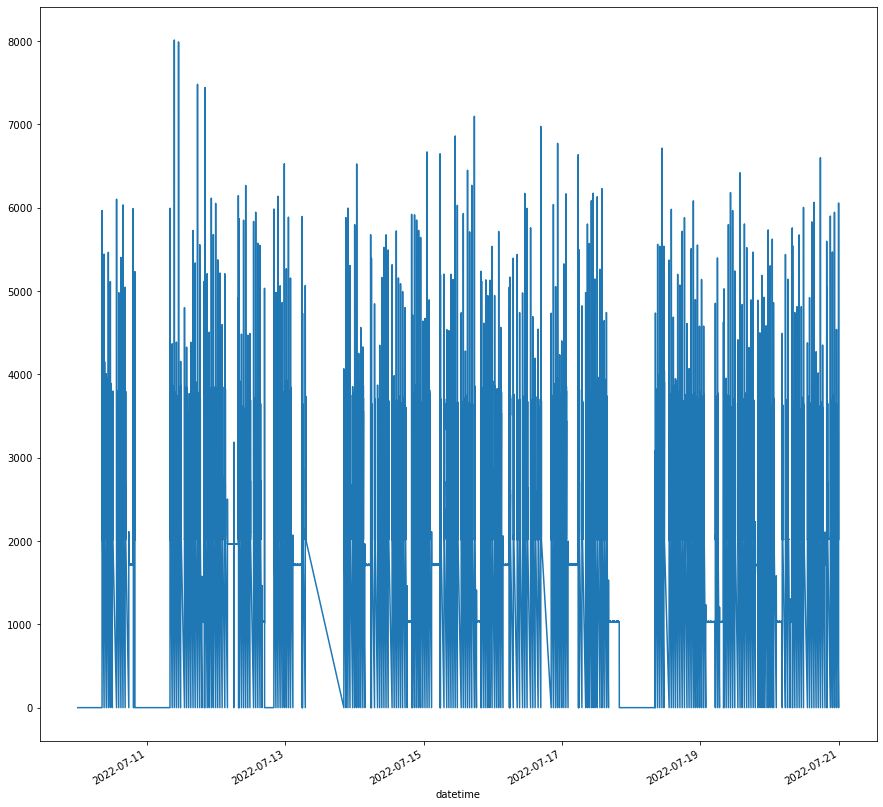

In [82]:
df_VL04_Tool1['current_spindle'].plot()

In [83]:
# df_VL04_Tool1_mod1 = df_VL04_Tool1_mod1.fillna(0)

In [84]:
# df_VL04_Tool1_mod1['current_spindle'].plot()

<AxesSubplot:xlabel='datetime'>

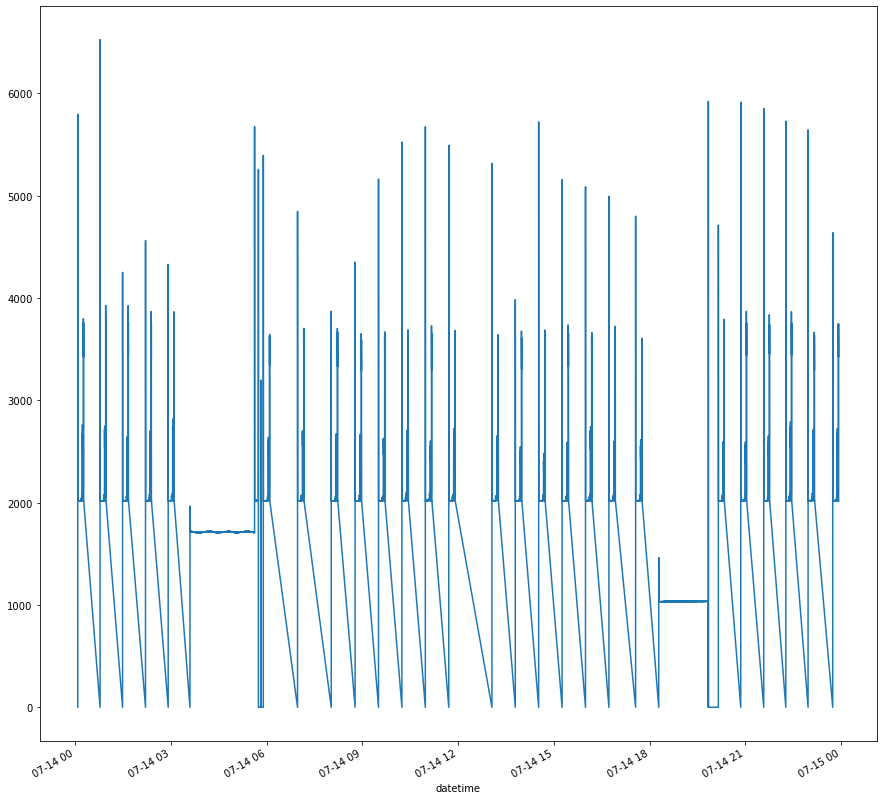

In [85]:
df_VL04_Tool1[df_VL04_Tool1['date'] == '2022-07-14']['current_spindle'].plot()

# 공구교체 데이터 변경
1. 1차 : '2022-07-10 09:20:10':'2022-07-10 09:54:04'
2, 2차 : '2022-07-18 10:52:24': '2022-07-18 11:21:56'

In [86]:
df_VL04_Tool1_mod1 = df_VL04_Tool1

# tool_state 변경
df_VL04_Tool1_mod1.loc['2022-07-10 09:20:10':'2022-07-10 09:54:04']['tool_state'] = '공구교체'
df_VL04_Tool1_mod1.loc['2022-07-18 10:52:24':'2022-07-18 11:21:56']['tool_state'] = '공구교체'
df_VL04_Tool1_mod1[df_VL04_Tool1_mod1['tool_state']=='공구교체']

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,


In [87]:
df_VL04_Tool1_mod1[(df_VL04_Tool1_mod1.index >= '2022-07-10 09:20:10') & (df_VL04_Tool1_mod1.index <= '2022-07-10 09:54:04')]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,


In [88]:
df_VL04_Tool1_mod1[(df_VL04_Tool1_mod1.index >= '2022-07-18 10:52:24') & (df_VL04_Tool1_mod1.index <= '2022-07-18 11:21:56')]['tool_state']

Series([], Name: tool_state, dtype: object)

In [89]:
df_VL04_Tool1_mod1

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-10 00:00:00,2022-07-10,0,0,0,101,1,operation,5774.0,0.0,0.0,0.0,200.000000,640000.0,483830.0,0.0,0.0,0.0,3.5,70.5,3.5,-70.5,가공
2022-07-10 00:00:01,2022-07-10,0,0,1,101,1,operation,5774.0,0.0,0.0,0.0,201.500000,640000.0,483830.0,0.0,0.0,0.0,3.5,71.0,3.5,-71.0,가공
2022-07-10 00:00:02,2022-07-10,0,0,2,101,1,operation,5774.0,0.0,0.0,0.0,199.000000,640000.0,483830.0,0.0,0.0,0.0,4.0,71.0,4.0,-71.0,가공
2022-07-10 00:00:03,2022-07-10,0,0,3,101,1,operation,5774.0,0.0,0.0,0.0,199.666667,640000.0,483830.0,0.0,0.0,0.0,4.0,71.0,4.0,-71.0,가공
2022-07-10 00:00:04,2022-07-10,0,0,4,101,1,operation,5774.0,0.0,0.0,0.0,201.500000,640000.0,483830.0,0.0,0.0,0.0,3.5,71.0,3.5,-71.0,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-20 23:59:55,2022-07-20,23,59,55,101,1,operation,5989.0,31.2,2.0,2018.8,85.000000,528317.4,8250.0,299.6,75.0,0.4,9.6,60.0,-9.6,-60.0,가공
2022-07-20 23:59:56,2022-07-20,23,59,56,101,1,operation,5989.0,31.2,2.0,2020.0,85.400000,526241.0,8250.0,299.2,75.0,0.8,10.0,60.0,-10.0,-60.0,가공
2022-07-20 23:59:57,2022-07-20,23,59,57,101,1,operation,5989.0,31.0,2.0,2019.4,86.800000,523333.6,8250.0,299.4,75.0,0.8,10.0,60.6,-10.0,-60.6,가공


In [90]:
df_VL04_Tool1_mod1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 429731 entries, 2022-07-10 00:00:00 to 2022-07-20 23:59:59
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             429731 non-null  object 
 1   hour             429731 non-null  object 
 2   minute           429731 non-null  object 
 3   second           429731 non-null  object 
 4   tool_number      429731 non-null  int64  
 5   tool             429731 non-null  int64  
 6   state            429731 non-null  object 
 7   shot_no          429731 non-null  float64
 8   current_x        429731 non-null  float64
 9   current_z        429731 non-null  float64
 10  current_spindle  429731 non-null  float64
 11  vibration        429731 non-null  float64
 12  pos_x_1          429731 non-null  float64
 13  pos_z_1          429731 non-null  float64
 14  rpm              429731 non-null  float64
 15  feed             429731 non-null  float64
 16  load

In [91]:
df_VL04_Tool1_mod1['shot_no'].value_counts()

5923.0    59378
5786.0    47740
5774.0    31035
5819.0    15355
5909.0    14254
          ...  
5917.0      601
5969.0       90
5989.0       82
5809.0       36
5970.0       17
Name: shot_no, Length: 211, dtype: int64

In [92]:
shot_list = [5922.0, 5923.0, 5924.0, 5925.0, 5926.0]
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    a = df_VL04_Tool1_mod1[df_VL04_Tool1_mod1['shot_no'] == shot_idx]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-17 15:25:29,2022-07-17,15,25,29,100,1,cancel,5922.0,0.0,2.000000,0.0,94.200000,640000.0,483830.0,0.0,2400.0,0.0,3.8,72.0,3.8,-72.0,취소
2022-07-17 15:25:30,2022-07-17,15,25,30,100,1,cancel,5922.0,0.0,2.800000,0.0,94.000000,640000.0,483830.0,0.0,11485.8,0.0,3.8,72.0,3.8,-72.0,취소
2022-07-17 15:25:31,2022-07-17,15,25,31,100,1,cancel,5922.0,0.0,2.666667,0.0,93.333333,640000.0,483830.0,0.0,0.0,0.0,3.0,72.0,3.0,-72.0,취소
2022-07-17 15:25:31,2022-07-17,15,25,31,101,1,operation,5922.0,0.0,3.000000,718.5,96.500000,665807.0,483429.0,24.0,0.0,147.0,5.0,72.0,5.0,-72.0,가공
2022-07-17 15:25:32,2022-07-17,15,25,32,101,1,operation,5922.0,9.6,9.600000,4743.4,106.600000,673645.6,479429.0,148.0,1414.2,124.2,8.8,68.8,8.8,-69.2,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 10:52:19,2022-07-18,10,52,19,101,1,operation,5926.0,0.0,1462.600000,2020.0,85.600000,350000.0,170063.4,299.8,5000.0,0.2,0.4,60.0,-0.4,-60.0,가공
2022-07-18 10:52:20,2022-07-18,10,52,20,101,1,operation,5926.0,512.6,1516.000000,2021.2,84.800000,428400.2,239449.8,299.4,7071.0,0.2,23.2,79.0,23.2,-79.0,가공
2022-07-18 10:52:21,2022-07-18,10,52,21,101,1,operation,5926.0,377.4,1462.200000,2020.4,88.000000,603028.0,329050.0,299.0,6656.8,0.6,16.8,78.8,16.8,-78.8,가공


In [93]:
df_VL04_Tool1_mod1[(df_VL04_Tool1_mod1.index >= '2022-07-18 11:32:17') & (df_VL04_Tool1_mod1.index <= '2022-07-18 13:10:45')].head(200)

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,


# 공구교체 및 점심시간
1. 공구교체
1. 1차 : '2022-07-10 09:20:10':'2022-07-10 09:54:04'
1. 2차 : '2022-07-18 10:52:24': '2022-07-18 11:21:56'
2. 점심시간은 '2022-07-18 11:32:17' : '2022-07-18 13:10:45'
3. shot5927부터 새로운 공구로 사용한 1 Cycle의 시작 지점
4. 주간 8시 시작
5. 12 ~ 13시 점심
6. 5시 ~ 5시 반 저녁
7. 8시 특근

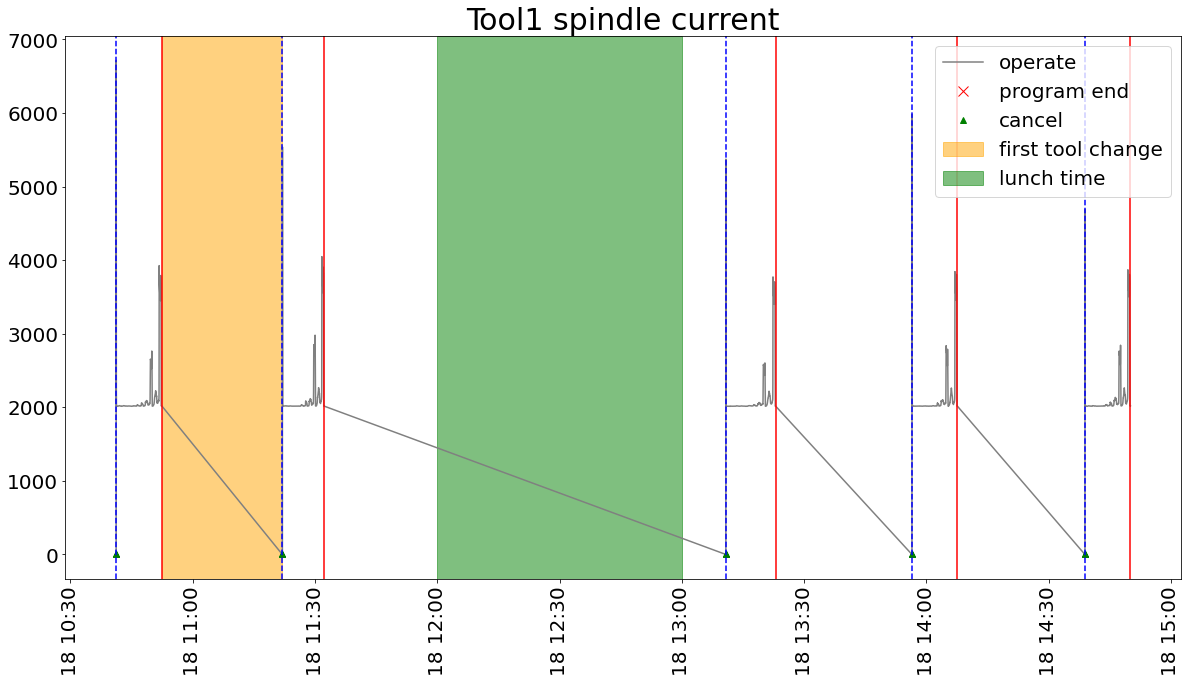

In [94]:
shot_list = [5926.0,5927.0, 5928.0, 5929.0, 5930.0]
shot_df = pd.DataFrame()
for shot_idx in shot_list:
    a = df_VL04_Tool1_mod1[df_VL04_Tool1_mod1['shot_no'] == shot_idx]
    shot_df = pd.concat([shot_df, a], axis = 0)
shot_df_cancel = shot_df[shot_df['tool_state'] == '취소']
shot_df_end = shot_df[shot_df['tool_state'] == '종료']
shot_df_change = shot_df[shot_df['tool_state'] == '공구교체']

plt.figure(figsize = (20,10))
plt.plot(shot_df['current_spindle'], label = 'operate', color = 'gray')
plt.plot(shot_df_end['current_spindle'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(shot_df_cancel['current_spindle'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
for idx in range(len(shot_list)):
    plt.axvline(x = max(shot_df[(shot_df['shot_no'] == shot_list[idx])].index), color = 'red', linestyle = 'solid')
for idx2 in range(len(shot_list)):
    plt.axvline(x = min(shot_df[(shot_df['shot_no'] == shot_list[idx2])].index), color = 'blue', linestyle = '--')
plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'first tool change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
plt.axvspan('2022-07-18 12:00:00', '2022-07-18 13:00:00', color = 'green', alpha = 0.5, label = 'lunch time')
# plt.axvspan('2022-07-18 17:00:00', '2022-07-18 17:30:00', color = 'green', alpha = 0.5, label = 'dinner time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool1 spindle current', fontsize = 30)
plt.show()

In [95]:
shot_df[shot_df['shot_no'] == 5933.0]

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,


# shot 5933번의 경우 기존 패턴과 다르게 1shot에 거의 한시간에 걸쳐 2 shot에 패턴이 나타나고 있음

In [96]:
df_VL04_Tool1_mod1['shot_no'].unique()

array([5774., 5775., 5776., 5777., 5778., 5779., 5780., 5781., 5782.,
       5783., 5784., 5785., 5786., 5787., 5788., 5789., 5790., 5791.,
       5792., 5793., 5794., 5795., 5796., 5797., 5798., 5799., 5800.,
       5801., 5802., 5803., 5804., 5805., 5806., 5807., 5808., 5809.,
       5810., 5811., 5812., 5813., 5814., 5815., 5816., 5817., 5818.,
       5819., 5820., 5821., 5822., 5823., 5824., 5825., 5826., 5827.,
       5828., 5830., 5831., 5832., 5833., 5834., 5835., 5836., 5837.,
       5838., 5839., 5840., 5841., 5842., 5843., 5844., 5845., 5846.,
       5847., 5848., 5849., 5850., 5851., 5852., 5853., 5854., 5855.,
       5856., 5857., 5858., 5859., 5860., 5861., 5862., 5863., 5864.,
       5865., 5867., 5868., 5869., 5870., 5871., 5872., 5873., 5874.,
       5875., 5876., 5877., 5878., 5879., 5880., 5881., 5882., 5883.,
       5884., 5885., 5886., 5887., 5888., 5889., 5890., 5891., 5892.,
       5893., 5894., 5895., 5896., 5897., 5898., 5899., 5900., 5901.,
       5902., 5903.,

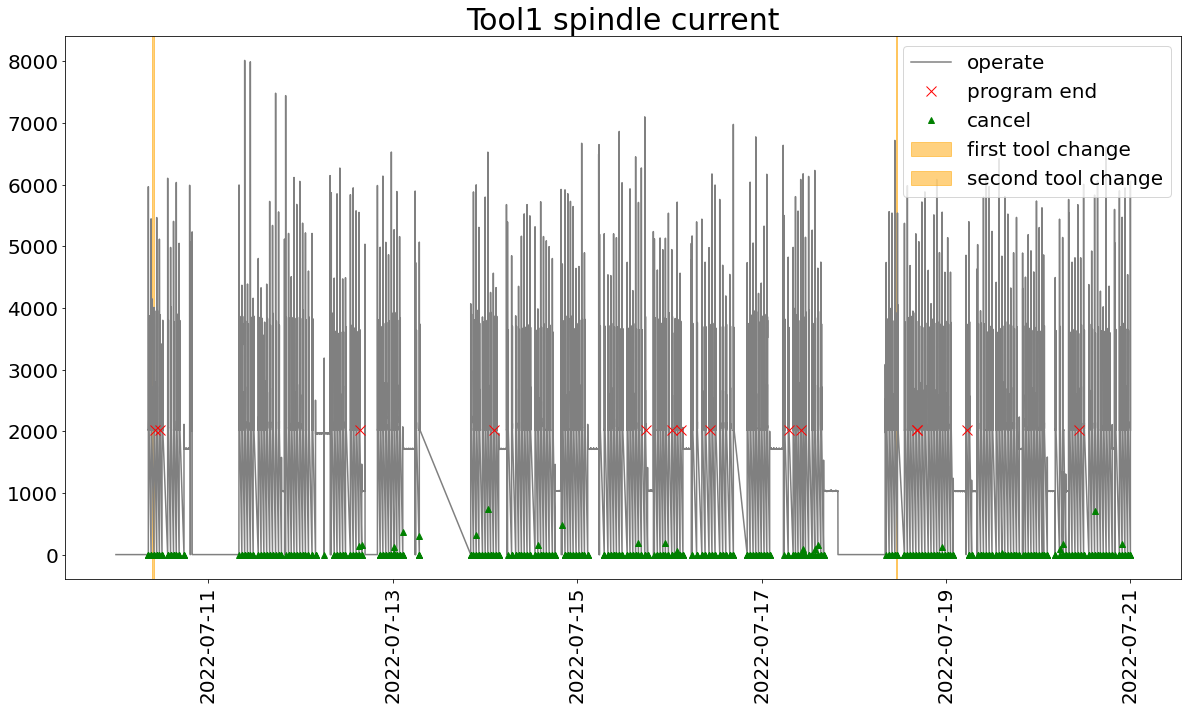

In [97]:
df_VL04_Tool1_mod1_cancel = df_VL04_Tool1_mod1[df_VL04_Tool1_mod1['tool_state'] == '취소']
df_VL04_Tool1_mod1_end = df_VL04_Tool1_mod1[df_VL04_Tool1_mod1['tool_state'] == '종료']
df_VL04_Tool1_mod1_change = df_VL04_Tool1_mod1[df_VL04_Tool1_mod1['tool_state'] == '공구교체']

plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool1_mod1['current_spindle'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool1_mod1_end['current_spindle'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool1_mod1_cancel['current_spindle'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
# for idx in range(len(df_VL04_Tool1_mod1['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod1[(df_VL04_Tool1_mod1['shot_no'] == df_VL04_Tool1_mod1['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod1['shot_no'].unique())):
#     plt.axvline(x = min(df_VL04_Tool1_mod1[(df_VL04_Tool1_mod1['shot_no'] == df_VL04_Tool1_mod1['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
plt.axvspan('2022-07-10 09:20:10', '2022-07-10 09:54:04', color = 'orange', alpha = 0.5, label = 'first tool change')
plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool1 spindle current', fontsize = 30)
plt.show()

위 그림에서 노란색 사이(tip 교체후 다음 tip 교체까지)의 값으로만 모델 구성
148개의 shot으로 구성되어 있음 -> 중간에 tip 교체가 더 존재할 것으로 추측됨

In [98]:
df_VL04_Tool1_mod2 = df_VL04_Tool1_mod1.loc['2022-07-10 09:20:10':'2022-07-18 11:21:56']
len(df_VL04_Tool1_mod2['shot_no'].unique())

148

In [99]:
df_VL04_Tool1_mod2

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-10 09:54:05,2022-07-10,9,54,5,100,1,cancel,5776.0,0.0,0.0,0.0,202.0,640000.0,483830.0,0.0,0.0,0.0,4.0,71.0,4.0,-71.0,취소
2022-07-10 09:54:06,2022-07-10,9,54,6,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,0.0,0.0,4.0,71.5,4.0,-71.5,취소
2022-07-10 09:54:07,2022-07-10,9,54,7,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,12000.0,0.0,3.5,71.5,3.5,-71.5,취소
2022-07-10 09:54:08,2022-07-10,9,54,8,100,1,cancel,5776.0,0.0,0.0,0.0,199.0,640000.0,483830.0,0.0,0.0,0.0,3.0,72.0,3.0,-72.0,취소
2022-07-10 09:54:08,2022-07-10,9,54,8,101,1,operation,5776.0,0.0,0.0,1845.0,200.0,665807.0,483429.0,2.0,0.0,158.0,7.0,71.0,7.0,-71.0,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 10:52:19,2022-07-18,10,52,19,101,1,operation,5926.0,0.0,1462.6,2020.0,85.6,350000.0,170063.4,299.8,5000.0,0.2,0.4,60.0,-0.4,-60.0,가공
2022-07-18 10:52:20,2022-07-18,10,52,20,101,1,operation,5926.0,512.6,1516.0,2021.2,84.8,428400.2,239449.8,299.4,7071.0,0.2,23.2,79.0,23.2,-79.0,가공
2022-07-18 10:52:21,2022-07-18,10,52,21,101,1,operation,5926.0,377.4,1462.2,2020.4,88.0,603028.0,329050.0,299.0,6656.8,0.6,16.8,78.8,16.8,-78.8,가공


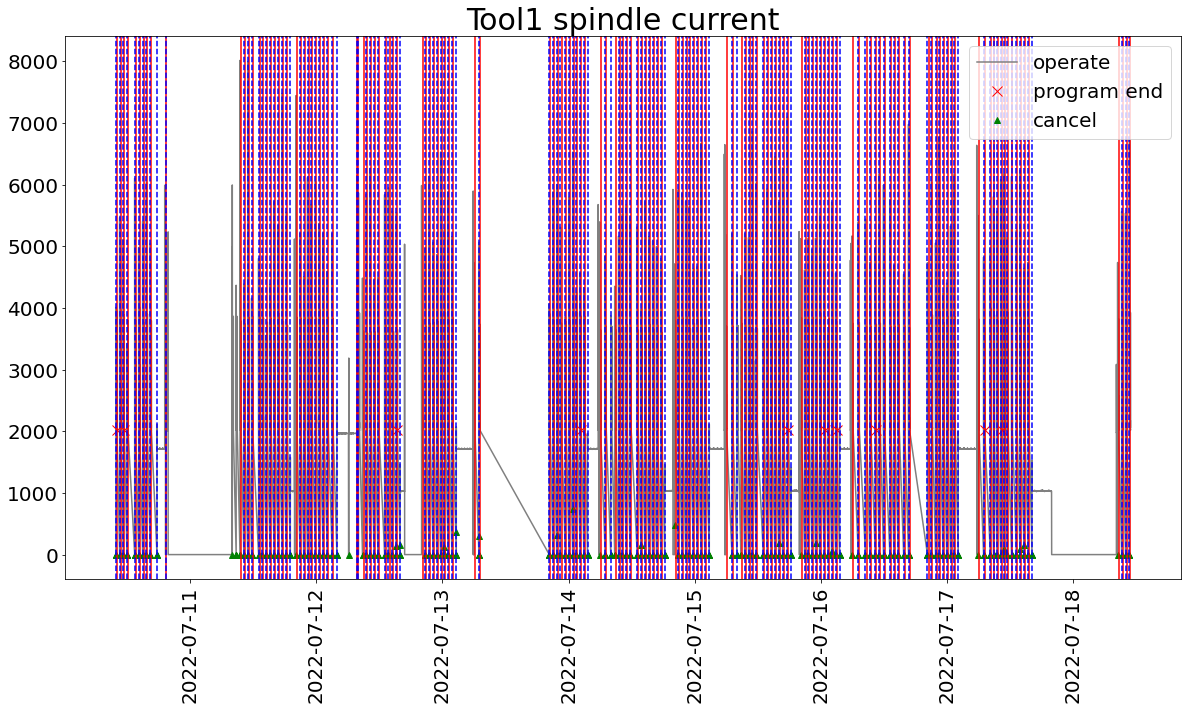

In [100]:
df_VL04_Tool1_mod2_cancel = df_VL04_Tool1_mod2[df_VL04_Tool1_mod2['tool_state'] == '취소']
df_VL04_Tool1_mod2_end = df_VL04_Tool1_mod2[df_VL04_Tool1_mod2['tool_state'] == '종료']
df_VL04_Tool1_mod2_change = df_VL04_Tool1_mod2[df_VL04_Tool1_mod2['tool_state'] == '공구교체']

plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool1_mod2['current_spindle'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool1_mod2_end['current_spindle'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool1_mod2_cancel['current_spindle'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
for idx in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
    plt.axvline(x = max(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
for idx2 in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
    plt.axvline(x = min(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
# plt.axvspan('2022-07-10 09:20:10', '2022-07-10 09:54:04', color = 'orange', alpha = 0.5, label = 'first tool change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool1 spindle current', fontsize = 30)
plt.show()

In [101]:
df_VL04_Tool1_mod2

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
datetime,,,,,,,,,,,,,,,,,,,,,,
2022-07-10 09:54:05,2022-07-10,9,54,5,100,1,cancel,5776.0,0.0,0.0,0.0,202.0,640000.0,483830.0,0.0,0.0,0.0,4.0,71.0,4.0,-71.0,취소
2022-07-10 09:54:06,2022-07-10,9,54,6,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,0.0,0.0,4.0,71.5,4.0,-71.5,취소
2022-07-10 09:54:07,2022-07-10,9,54,7,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,12000.0,0.0,3.5,71.5,3.5,-71.5,취소
2022-07-10 09:54:08,2022-07-10,9,54,8,100,1,cancel,5776.0,0.0,0.0,0.0,199.0,640000.0,483830.0,0.0,0.0,0.0,3.0,72.0,3.0,-72.0,취소
2022-07-10 09:54:08,2022-07-10,9,54,8,101,1,operation,5776.0,0.0,0.0,1845.0,200.0,665807.0,483429.0,2.0,0.0,158.0,7.0,71.0,7.0,-71.0,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 10:52:19,2022-07-18,10,52,19,101,1,operation,5926.0,0.0,1462.6,2020.0,85.6,350000.0,170063.4,299.8,5000.0,0.2,0.4,60.0,-0.4,-60.0,가공
2022-07-18 10:52:20,2022-07-18,10,52,20,101,1,operation,5926.0,512.6,1516.0,2021.2,84.8,428400.2,239449.8,299.4,7071.0,0.2,23.2,79.0,23.2,-79.0,가공
2022-07-18 10:52:21,2022-07-18,10,52,21,101,1,operation,5926.0,377.4,1462.2,2020.4,88.0,603028.0,329050.0,299.0,6656.8,0.6,16.8,78.8,16.8,-78.8,가공


In [102]:
df_VL04_Tool1_mod2['date'].unique()

array(['2022-07-10', '2022-07-11', '2022-07-12', '2022-07-13',
       '2022-07-14', '2022-07-15', '2022-07-16', '2022-07-17',
       '2022-07-18'], dtype=object)

In [103]:
len(df_VL04_Tool1_mod2['shot_no'].unique())

148

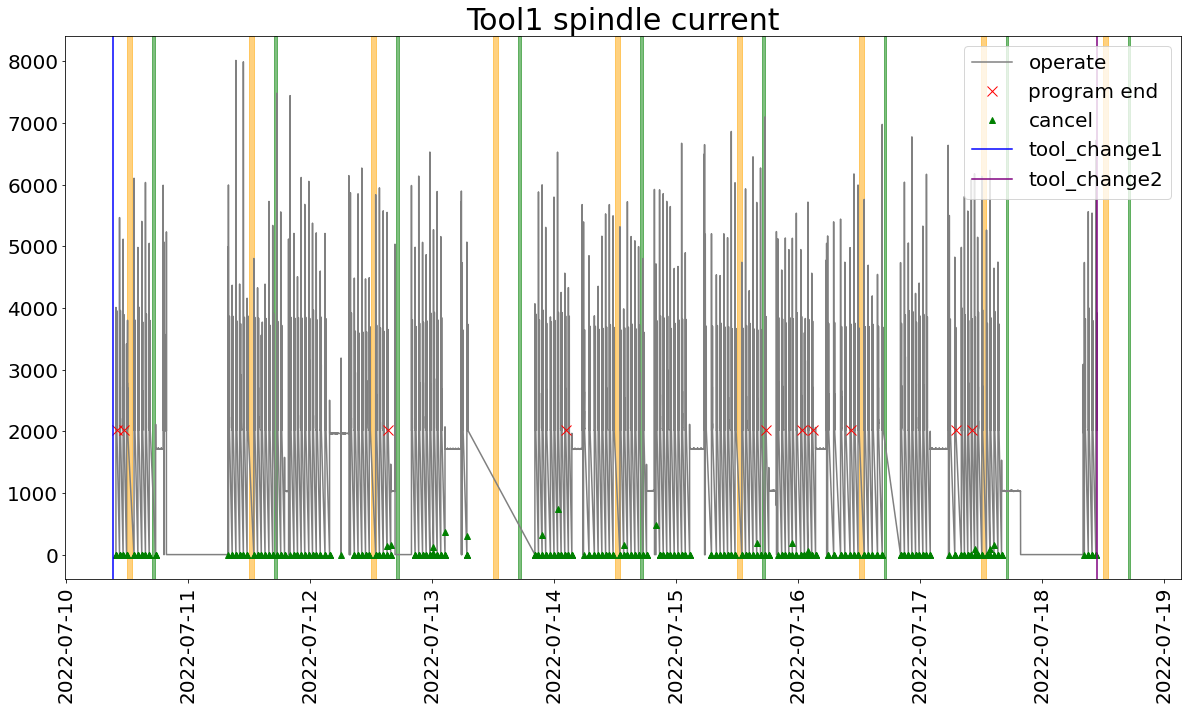

In [104]:
date_list = df_VL04_Tool1_mod2['date'].unique()
df_VL04_Tool1_mod2_cancel = df_VL04_Tool1_mod2[df_VL04_Tool1_mod2['tool_state'] == '취소']
df_VL04_Tool1_mod2_end = df_VL04_Tool1_mod2[df_VL04_Tool1_mod2['tool_state'] == '종료']
df_VL04_Tool1_mod2_change = df_VL04_Tool1_mod2[df_VL04_Tool1_mod2['tool_state'] == '공구교체']


plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool1_mod2['current_spindle'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool1_mod2_end['current_spindle'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool1_mod2_cancel['current_spindle'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
# for idx in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#    plt.axvline(x = min(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
for date_idx in range(len(date_list)):
    plt.axvspan(str(date_list[date_idx]) + ' ' + '12:00:00', str(date_list[date_idx]) + ' ' + '13:00:00', color = 'orange', alpha = 0.5)
    plt.axvspan(str(date_list[date_idx]) + ' ' + '17:00:00', str(date_list[date_idx]) + ' ' + '17:30:00', color = 'green', alpha = 0.5)

plt.axvline('2022-07-10 09:20:10', color = 'blue', label = 'tool_change1', linestyle = 'solid')
plt.axvline('2022-07-18 10:52:24', color = 'purple', label = 'tool_change2', linestyle = 'solid')
#     if date_idx == 0:
#         continue
#     else:
#         plt.axvline(str(date_list[date_idx]) + ' ' + '8:00:00', color = 'blue', alpha = 0.5, label = 'change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool1 spindle current', fontsize = 30)
plt.show()

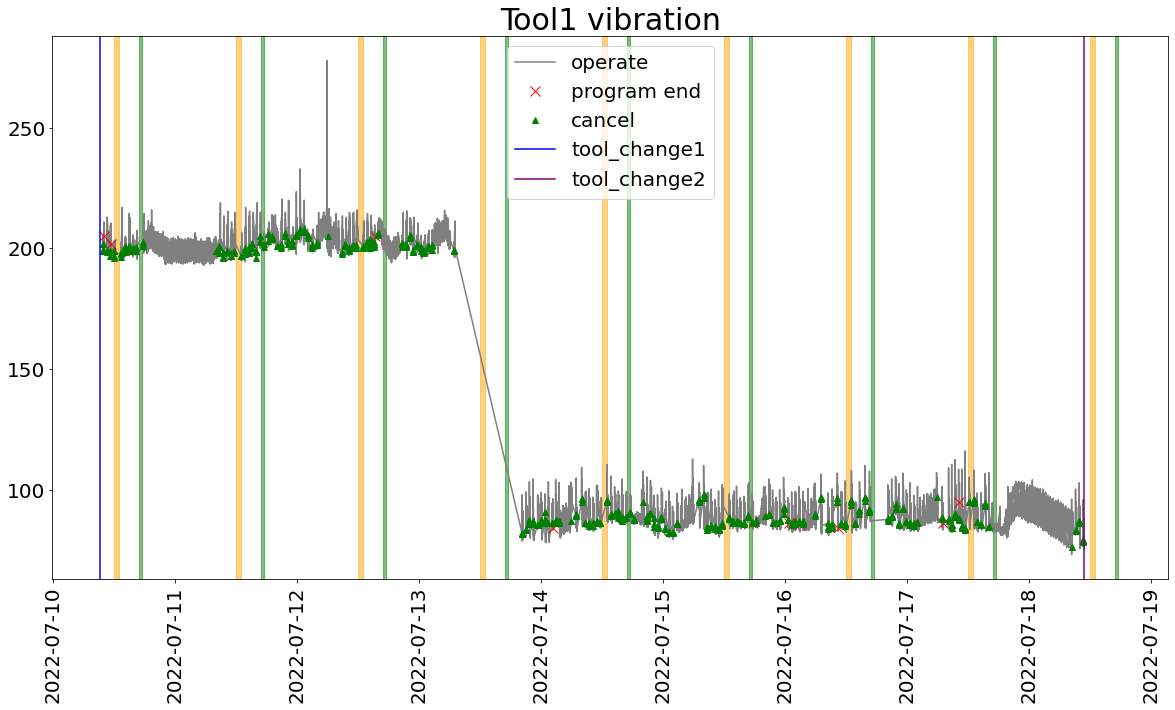

In [105]:
plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool1_mod2['vibration'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool1_mod2_end['vibration'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool1_mod2_cancel['vibration'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
# for idx in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#    plt.axvline(x = min(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
for date_idx in range(len(date_list)):
    plt.axvspan(str(date_list[date_idx]) + ' ' + '12:00:00', str(date_list[date_idx]) + ' ' + '13:00:00', color = 'orange', alpha = 0.5)
    plt.axvspan(str(date_list[date_idx]) + ' ' + '17:00:00', str(date_list[date_idx]) + ' ' + '17:30:00', color = 'green', alpha = 0.5)

plt.axvline('2022-07-10 09:20:10', color = 'blue', label = 'tool_change1', linestyle = 'solid')
plt.axvline('2022-07-18 10:52:24', color = 'purple', label = 'tool_change2', linestyle = 'solid')
#     if date_idx == 0:
#         continue
#     else:
#         plt.axvline(str(date_list[date_idx]) + ' ' + '8:00:00', color = 'blue', alpha = 0.5, label = 'change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool1 vibration', fontsize = 30)
plt.show()

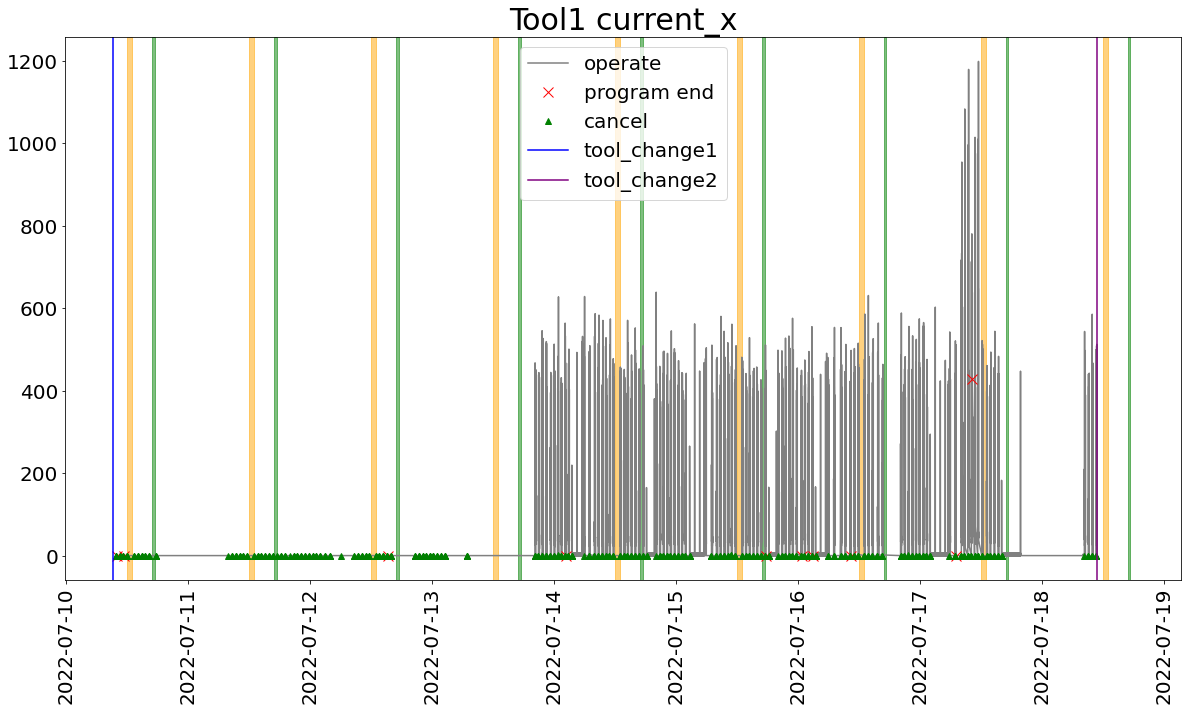

In [106]:
plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool1_mod2['current_x'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool1_mod2_end['current_x'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool1_mod2_cancel['current_x'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
# for idx in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#    plt.axvline(x = min(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
for date_idx in range(len(date_list)):
    plt.axvspan(str(date_list[date_idx]) + ' ' + '12:00:00', str(date_list[date_idx]) + ' ' + '13:00:00', color = 'orange', alpha = 0.5)
    plt.axvspan(str(date_list[date_idx]) + ' ' + '17:00:00', str(date_list[date_idx]) + ' ' + '17:30:00', color = 'green', alpha = 0.5)

plt.axvline('2022-07-10 09:20:10', color = 'blue', label = 'tool_change1', linestyle = 'solid')
plt.axvline('2022-07-18 10:52:24', color = 'purple', label = 'tool_change2', linestyle = 'solid')
#     if date_idx == 0:
#         continue
#     else:
#         plt.axvline(str(date_list[date_idx]) + ' ' + '8:00:00', color = 'blue', alpha = 0.5, label = 'change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool1 current_x', fontsize = 30)
plt.show()

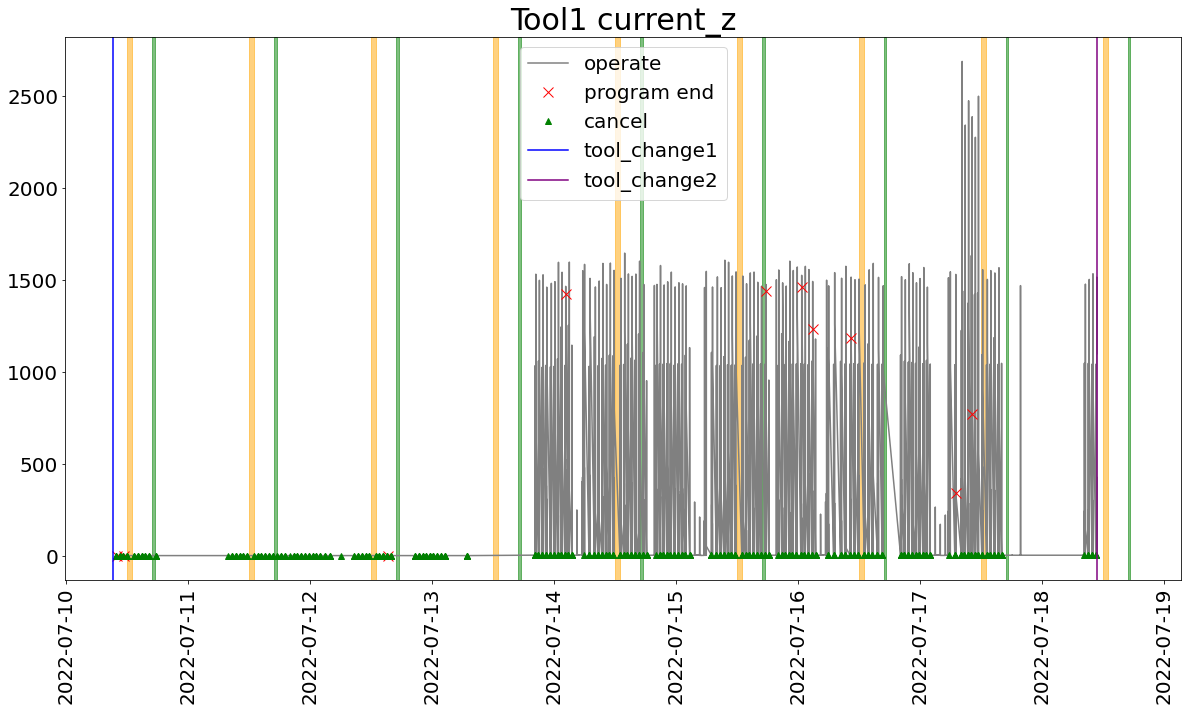

In [107]:
plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool1_mod2['current_z'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool1_mod2_end['current_z'], linestyle = 'none', marker = 'x', label = 'program end', color = 'red', markersize = 10)
plt.plot(df_VL04_Tool1_mod2_cancel['current_z'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
# for idx in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod2['shot_no'].unique())):
#    plt.axvline(x = min(df_VL04_Tool1_mod2[(df_VL04_Tool1_mod2['shot_no'] == df_VL04_Tool1_mod2['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
for date_idx in range(len(date_list)):
    plt.axvspan(str(date_list[date_idx]) + ' ' + '12:00:00', str(date_list[date_idx]) + ' ' + '13:00:00', color = 'orange', alpha = 0.5)
    plt.axvspan(str(date_list[date_idx]) + ' ' + '17:00:00', str(date_list[date_idx]) + ' ' + '17:30:00', color = 'green', alpha = 0.5)

plt.axvline('2022-07-10 09:20:10', color = 'blue', label = 'tool_change1', linestyle = 'solid')
plt.axvline('2022-07-18 10:52:24', color = 'purple', label = 'tool_change2', linestyle = 'solid')
#     if date_idx == 0:
#         continue
#     else:
#         plt.axvline(str(date_list[date_idx]) + ' ' + '8:00:00', color = 'blue', alpha = 0.5, label = 'change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool1 current_z', fontsize = 30)
plt.show()

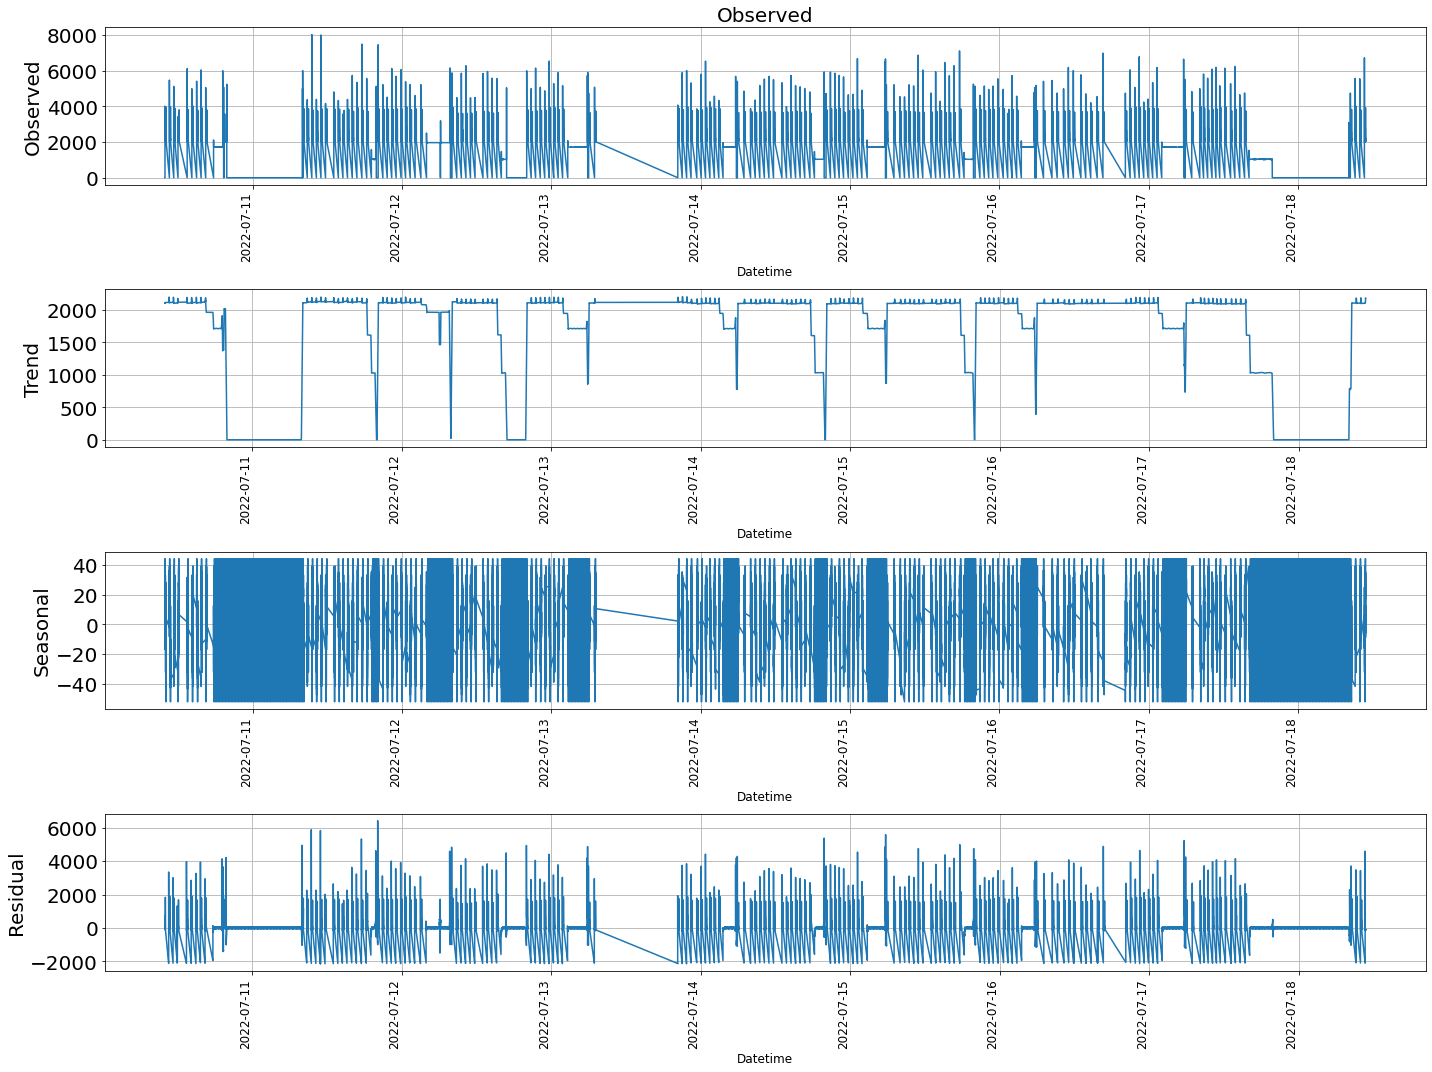

In [108]:
# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose

current_seasonal_decompose = seasonal_decompose(df_VL04_Tool1_mod2['current_spindle'], model = 'Additive', freq = 840)

# observed data
plt.figure(figsize = (20,15))
plt.subplot(4,1,1)
current_seasonal_decompose.observed.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Observed', fontsize = 20)
plt.title('Observed', fontsize = 20)

# trend factor
plt.subplot(4,1,2)
current_seasonal_decompose.trend.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Trend', fontsize = 20)

# seasonal factor
plt.subplot(4,1,3)
current_seasonal_decompose.seasonal.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Seasonal', fontsize = 20)

# seasonal factor
plt.subplot(4,1,4)
current_seasonal_decompose.resid.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Residual', fontsize = 20)

plt.tight_layout()
plt.show()

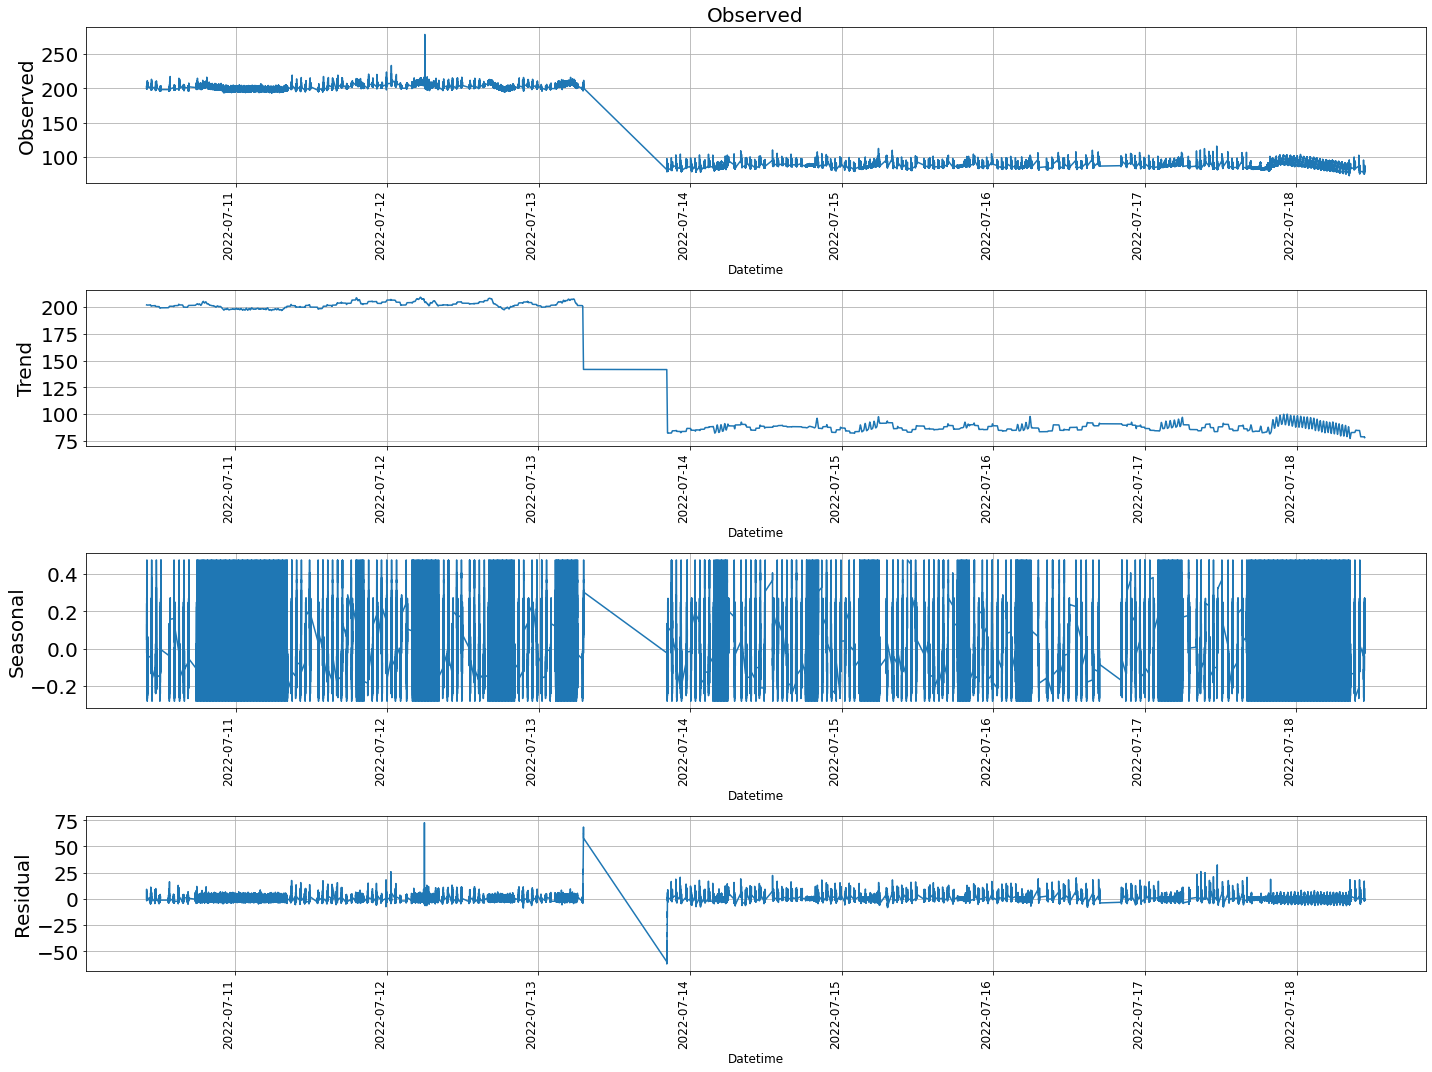

In [109]:
# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose

current_seasonal_decompose = seasonal_decompose(df_VL04_Tool1_mod2['vibration'], model = 'Additive', freq = 840)

# observed data
plt.figure(figsize = (20,15))
plt.subplot(4,1,1)
current_seasonal_decompose.observed.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Observed', fontsize = 20)
plt.title('Observed', fontsize = 20)

# trend factor
plt.subplot(4,1,2)
current_seasonal_decompose.trend.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Trend', fontsize = 20)

# seasonal factor
plt.subplot(4,1,3)
current_seasonal_decompose.seasonal.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Seasonal', fontsize = 20)

# seasonal factor
plt.subplot(4,1,4)
current_seasonal_decompose.resid.plot()
plt.grid(True)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 12)
plt.ylabel('Residual', fontsize = 20)

plt.tight_layout()
plt.show()

In [110]:
# 시계열 current_spindle 분해값 출력
decompose_ob_tr = pd.concat([current_seasonal_decompose.observed, current_seasonal_decompose.trend],axis = 1)
decompose_ob_tr_ss = pd.concat([decompose_ob_tr, current_seasonal_decompose.seasonal], axis = 1)
decompose_ob_tr_ss_rs = pd.concat([decompose_ob_tr_ss, current_seasonal_decompose.resid], axis = 1)
decompose_ob_tr_ss_rs.head(50)

,vibration,trend,seasonal,resid
datetime,,,,
2022-07-10 09:54:05,202.000000,NaN,0.050285,NaN
2022-07-10 09:54:06,199.500000,NaN,0.078151,NaN
2022-07-10 09:54:07,199.500000,NaN,0.018020,NaN
2022-07-10 09:54:08,199.000000,NaN,0.089710,NaN
2022-07-10 09:54:08,200.000000,NaN,0.054379,NaN
2022-07-10 09:54:09,200.000000,NaN,0.091460,NaN
2022-07-10 09:54:10,199.500000,NaN,0.092007,NaN
2022-07-10 09:54:11,200.000000,NaN,0.042141,NaN
2022-07-10 09:54:12,201.500000,NaN,0.064007,NaN


In [111]:
df_VL04_Tool1_mod3 = df_VL04_Tool1_mod2.reset_index()

In [112]:
df_VL04_Tool1_mod3

,datetime,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state
0,2022-07-10 09:54:05,2022-07-10,9,54,5,100,1,cancel,5776.0,0.0,0.0,0.0,202.0,640000.0,483830.0,0.0,0.0,0.0,4.0,71.0,4.0,-71.0,취소
1,2022-07-10 09:54:06,2022-07-10,9,54,6,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,0.0,0.0,4.0,71.5,4.0,-71.5,취소
2,2022-07-10 09:54:07,2022-07-10,9,54,7,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,12000.0,0.0,3.5,71.5,3.5,-71.5,취소
3,2022-07-10 09:54:08,2022-07-10,9,54,8,100,1,cancel,5776.0,0.0,0.0,0.0,199.0,640000.0,483830.0,0.0,0.0,0.0,3.0,72.0,3.0,-72.0,취소
4,2022-07-10 09:54:08,2022-07-10,9,54,8,101,1,operation,5776.0,0.0,0.0,1845.0,200.0,665807.0,483429.0,2.0,0.0,158.0,7.0,71.0,7.0,-71.0,가공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315925,2022-07-18 10:52:19,2022-07-18,10,52,19,101,1,operation,5926.0,0.0,1462.6,2020.0,85.6,350000.0,170063.4,299.8,5000.0,0.2,0.4,60.0,-0.4,-60.0,가공
315926,2022-07-18 10:52:20,2022-07-18,10,52,20,101,1,operation,5926.0,512.6,1516.0,2021.2,84.8,428400.2,239449.8,299.4,7071.0,0.2,23.2,79.0,23.2,-79.0,가공
315927,2022-07-18 10:52:21,2022-07-18,10,52,21,101,1,operation,5926.0,377.4,1462.2,2020.4,88.0,603028.0,329050.0,299.0,6656.8,0.6,16.8,78.8,16.8,-78.8,가공
315928,2022-07-18 10:52:22,2022-07-18,10,52,22,101,1,operation,5926.0,172.8,1462.6,2020.2,84.0,665807.0,408516.4,299.0,5000.0,0.6,6.0,79.6,6.0,-79.6,가공


In [113]:
df_VL04_Tool1_mod3.drop_duplicates(['datetime'], keep = 'first',inplace = True)
df_VL04_Tool1_mod3 = df_VL04_Tool1_mod3.set_index('datetime')
df_VL04_Tool1_mod3_para = df_VL04_Tool1_mod3[['current_spindle','vibration', 'rpm',	'feed',	'load_1',	'servo_load_x',	'servo_load_z',	'servo_current_x',	'servo_current_z']]
df_VL04_Tool1_mod3_info = df_VL04_Tool1_mod3[['tool_number', 'shot_no', 'tool_state']]

In [114]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# parameter_scaler = pd.DataFrame(scaler.fit_transform(df_VL04_Tool1_mod3_para), columns = df_VL04_Tool1_mod3_para.columns, index = df_VL04_Tool1_mod3.index)
# parameter_scaler = parameter_scaler.reset_index()
# spindle_scaler = parameter_scaler[['datetime','current_spindle']]
# vibration_scaler = parameter_scaler['vibration']
# rpm_scaler = parameter_scaler['rpm']
# feed_scaler = parameter_scaler['feed']
# load1_scaler = parameter_scaler['load_1']
# servo_load_x_scaler = parameter_scaler['servo_load_x']
# servo_load_z_scaler = parameter_scaler['servo_load_z']
# servo_current_x_scaler = parameter_scaler['servo_current_x']
# servo_current_z_scaler = parameter_scaler['servo_current_z']

# anomaly detection

1. Statistical Anomaly Detection Techniques
 - Gaussian Model Based
 - Histogram Based
2. Cluster based technique
3. Support Vector Machines based techniques
4. Tree based techniques
 - Isolation Forest를 활용한 이상탐지 수행

# 1. Statistical technique

# 2. Cluster based technique

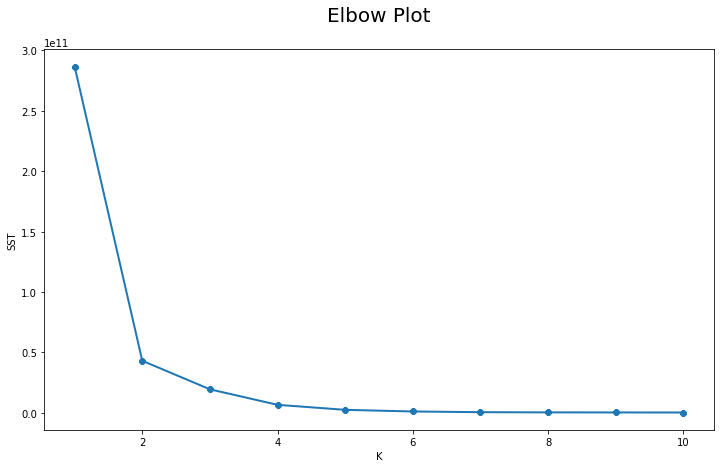

In [115]:
from sklearn.cluster import KMeans

#Elbow 시각화
X1 = df_VL04_Tool1_mod3[['current_spindle']].values

SST= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    SST.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), SST, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('SST')
plt.show()

In [116]:
kmeans = KMeans(n_clusters = 4)
labels = kmeans.fit_predict(X1)

In [117]:
df_VL04_Tool1_mod3['k-means_cluster'] = kmeans.predict(X1)
df_VL04_Tool1_mod3['k-means_cluster'].value_counts()

0    171956
1    108309
3     30211
2      5327
Name: k-means_cluster, dtype: int64

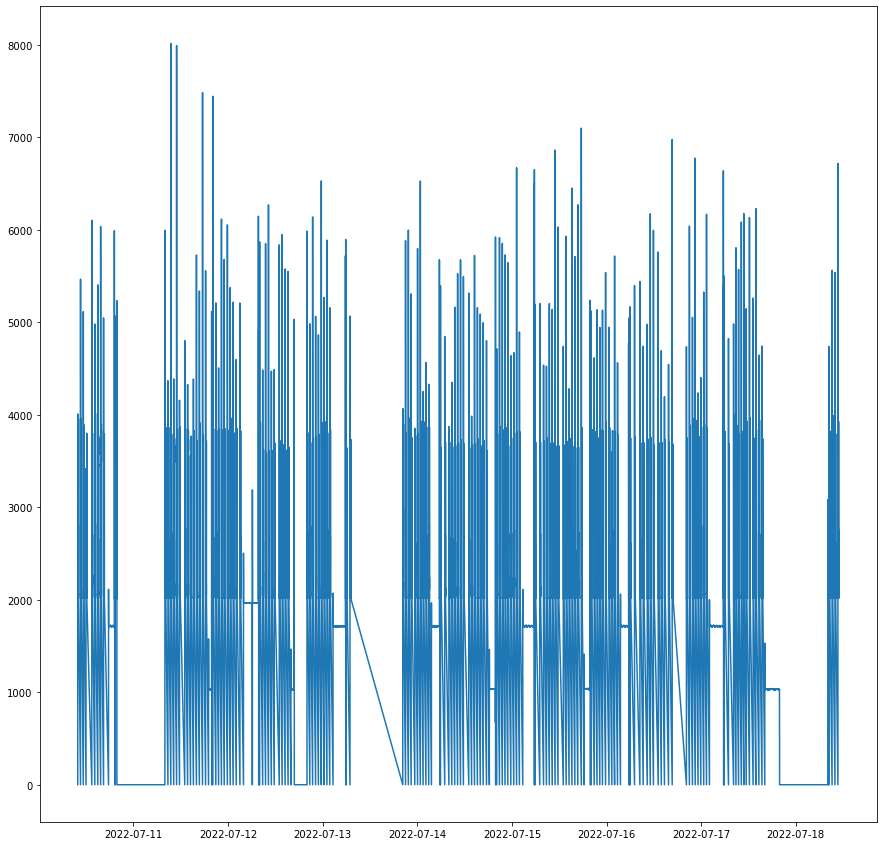

In [118]:
plt.plot(df_VL04_Tool1_mod3['current_spindle'])

# 3. Support Vector Machines based techniques\
One class SVM

In [119]:
df_VL04_Tool1_mod3

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state,k-means_cluster
datetime,,,,,,,,,,,,,,,,,,,,,,,
2022-07-10 09:54:05,2022-07-10,9,54,5,100,1,cancel,5776.0,0.0,0.0,0.0,202.0,640000.0,483830.0,0.0,0.0,0.0,4.0,71.0,4.0,-71.0,취소,1
2022-07-10 09:54:06,2022-07-10,9,54,6,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,0.0,0.0,4.0,71.5,4.0,-71.5,취소,1
2022-07-10 09:54:07,2022-07-10,9,54,7,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,12000.0,0.0,3.5,71.5,3.5,-71.5,취소,1
2022-07-10 09:54:08,2022-07-10,9,54,8,100,1,cancel,5776.0,0.0,0.0,0.0,199.0,640000.0,483830.0,0.0,0.0,0.0,3.0,72.0,3.0,-72.0,취소,1
2022-07-10 09:54:09,2022-07-10,9,54,9,101,1,operation,5776.0,0.0,0.0,3686.0,200.0,682473.5,475095.5,222.5,3535.5,69.5,37.0,27.5,37.0,-27.5,가공,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 10:52:19,2022-07-18,10,52,19,101,1,operation,5926.0,0.0,1462.6,2020.0,85.6,350000.0,170063.4,299.8,5000.0,0.2,0.4,60.0,-0.4,-60.0,가공,0
2022-07-18 10:52:20,2022-07-18,10,52,20,101,1,operation,5926.0,512.6,1516.0,2021.2,84.8,428400.2,239449.8,299.4,7071.0,0.2,23.2,79.0,23.2,-79.0,가공,0
2022-07-18 10:52:21,2022-07-18,10,52,21,101,1,operation,5926.0,377.4,1462.2,2020.4,88.0,603028.0,329050.0,299.0,6656.8,0.6,16.8,78.8,16.8,-78.8,가공,0


In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM

data = df_VL04_Tool1_mod3[['current_spindle', 'current_x', 'current_z']]
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
st_scaled_data = standard_scaler.fit_transform(data)
mm_scaled_data = minmax_scaler.fit_transform(data)

model = OneClassSVM(nu=0.005)
scaled_data = pd.DataFrame(mm_scaled_data)
model.fit(scaled_data)
df_VL04_Tool1_mod3['SVM_anomaly'] = pd.Series(model.predict(scaled_data), index = df_VL04_Tool1_mod3.index)
df_VL04_Tool1_mod3['SVM_anomaly'] = df_VL04_Tool1_mod3['SVM_anomaly'].map({1:0, -1:1})

In [121]:
df_VL04_Tool1_mod3['SVM_anomaly'].value_counts()

0    241606
1     74197
Name: SVM_anomaly, dtype: int64

In [122]:
a.index

DatetimeIndex(['2022-07-18 14:38:53', '2022-07-18 14:38:54',
               '2022-07-18 14:38:55', '2022-07-18 14:38:56',
               '2022-07-18 14:38:56', '2022-07-18 14:38:57',
               '2022-07-18 14:38:58', '2022-07-18 14:38:59',
               '2022-07-18 14:39:00', '2022-07-18 14:39:01',
               ...
               '2022-07-18 14:49:57', '2022-07-18 14:49:58',
               '2022-07-18 14:49:59', '2022-07-18 14:50:00',
               '2022-07-18 14:50:01', '2022-07-18 14:50:02',
               '2022-07-18 14:50:03', '2022-07-18 14:50:04',
               '2022-07-18 14:50:05', '2022-07-18 14:50:06'],
              dtype='datetime64[ns]', name='datetime', length=675, freq=None)

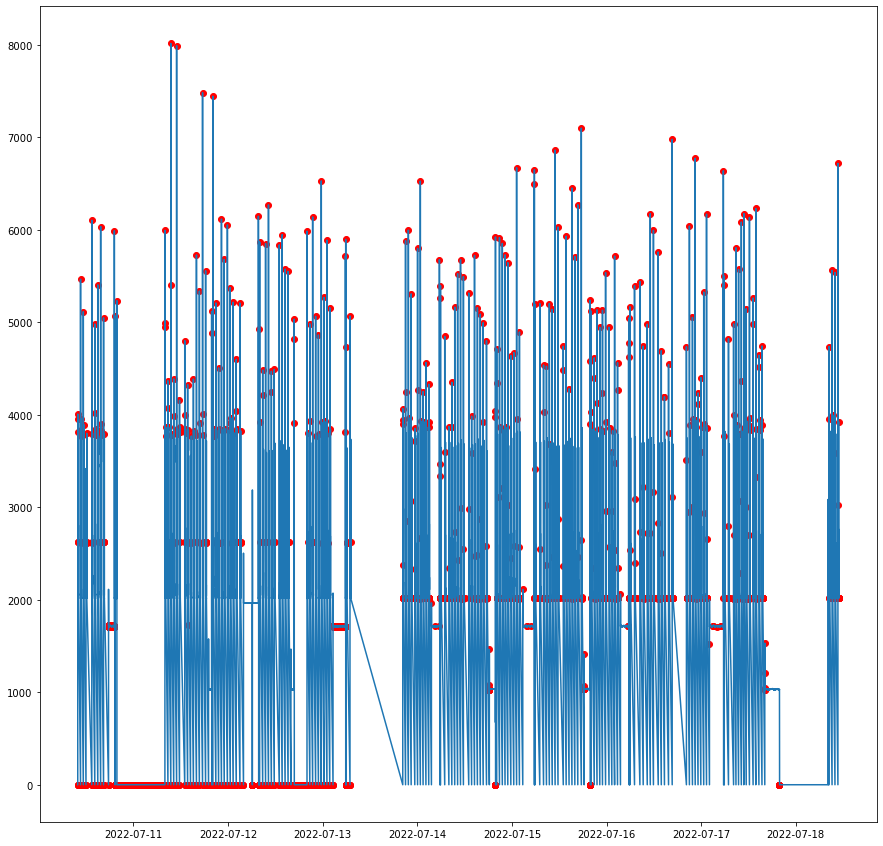

In [123]:
a = df_VL04_Tool1_mod3.query('SVM_anomaly == 1')
a.reset_index(inplace = True)

plt.plot(df_VL04_Tool1_mod3['current_spindle'])
plt.scatter(a['datetime'], a['current_spindle'], color = 'red')

# 4. Tree based techniques
IsolationForest (https://partrita.github.io/posts/isolation-forest/)
1. 밀도기반으로 이상 탐지하는 Isolation forest
2. Isolation forest는 기본적으로 데이터셋을 의사결정나무 형태로 표현해 정상값을 분리하기 위해서는 의사결정나무를 깊숙하게 타고 내려가야 하고, 반대로 이상값은 의사결정 나무 상단부에서 분리할수 있음
3. 군집기반 이상탐지 알고리즘에 비해 계산량이 매우 적음

In [124]:
from sklearn.ensemble import IsolationForest

IF = IsolationForest(random_state = 0, contamination = 0.0001, n_estimators = 200, max_samples = 0.5)
IF.fit(df_VL04_Tool1_mod3[['current_spindle']])

# Outlier column 생성
df_VL04_Tool1_mod3['Isolation_anomaly'] = pd.Series(IF.predict(df_VL04_Tool1_mod3[['current_spindle']]), index = df_VL04_Tool1_mod3.index).apply(lambda x: 1 if x == -1 else 0)

In [126]:
df_VL04_Tool1_mod3['Isolation_anomaly'].value_counts()

0    315771
1        32
Name: Isolation_anomaly, dtype: int64

In [127]:
# Get Anomaly Score
score = IF.decision_function(df_VL04_Tool1_mod3[['current_spindle']])

# New Anomaly Score column
df_VL04_Tool1_mod3['Score'] = score
df_VL04_Tool1_mod3.head()

,date,hour,minute,second,tool_number,tool,state,shot_no,current_x,current_z,current_spindle,vibration,pos_x_1,pos_z_1,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state,k-means_cluster,SVM_anomaly,Isolation_anomaly,Score
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-10 09:54:05,2022-07-10,9,54,5,100,1,cancel,5776.0,0.0,0.0,0.0,202.0,640000.0,483830.0,0.0,0.0,0.0,4.0,71.0,4.0,-71.0,취소,1,1,0,0.364508
2022-07-10 09:54:06,2022-07-10,9,54,6,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,0.0,0.0,4.0,71.5,4.0,-71.5,취소,1,1,0,0.364508
2022-07-10 09:54:07,2022-07-10,9,54,7,100,1,cancel,5776.0,0.0,0.0,0.0,199.5,640000.0,483830.0,0.0,12000.0,0.0,3.5,71.5,3.5,-71.5,취소,1,1,0,0.364508
2022-07-10 09:54:08,2022-07-10,9,54,8,100,1,cancel,5776.0,0.0,0.0,0.0,199.0,640000.0,483830.0,0.0,0.0,0.0,3.0,72.0,3.0,-72.0,취소,1,1,0,0.364508
2022-07-10 09:54:09,2022-07-10,9,54,9,101,1,operation,5776.0,0.0,0.0,3686.0,200.0,682473.5,475095.5,222.5,3535.5,69.5,37.0,27.5,37.0,-27.5,가공,2,0,0,0.223599


In [130]:
x = df_VL04_Tool1_mod3.query('Isolation_anomaly == 1').index
y = df_VL04_Tool1_mod3.loc[x]['current_spindle']

In [132]:
df_VL04_Tool1_mod3.query('Isolation_anomaly == 1')['current_spindle']

datetime
2022-07-11 08:00:19     173.000000
2022-07-11 09:30:18    8014.000000
2022-07-11 10:58:22     236.000000
2022-07-11 10:58:23    7991.000000
2022-07-11 17:33:06    7482.000000
2022-07-11 20:10:03    7443.000000
2022-07-12 07:53:15     116.000000
2022-07-12 10:16:18    6268.500000
2022-07-12 15:14:52     144.500000
2022-07-12 23:39:58    6528.000000
2022-07-13 00:22:41     118.000000
2022-07-13 06:56:36     303.000000
2022-07-14 00:46:55    6526.200000
2022-07-14 13:47:30     154.666667
2022-07-15 01:11:47    6670.500000
2022-07-15 05:37:15    6494.000000
2022-07-15 05:42:26    6648.400000
2022-07-15 10:57:56    6862.000000
2022-07-15 15:14:13    6450.600000
2022-07-15 15:58:10     181.800000
2022-07-15 16:43:06    6269.600000
2022-07-15 17:36:31    7098.400000
2022-07-15 19:50:27     122.800000
2022-07-15 22:58:47     186.500000
2022-07-16 02:02:53      56.500000
2022-07-16 16:39:28    6976.400000
2022-07-16 22:29:45    6773.800000
2022-07-17 05:37:49    6637.000000
2022-07-17 

In [133]:
y

datetime
2022-07-11 08:00:19     173.000000
2022-07-11 09:30:18    8014.000000
2022-07-11 10:58:22     236.000000
2022-07-11 10:58:23    7991.000000
2022-07-11 17:33:06    7482.000000
2022-07-11 20:10:03    7443.000000
2022-07-12 07:53:15     116.000000
2022-07-12 10:16:18    6268.500000
2022-07-12 15:14:52     144.500000
2022-07-12 23:39:58    6528.000000
2022-07-13 00:22:41     118.000000
2022-07-13 06:56:36     303.000000
2022-07-14 00:46:55    6526.200000
2022-07-14 13:47:30     154.666667
2022-07-15 01:11:47    6670.500000
2022-07-15 05:37:15    6494.000000
2022-07-15 05:42:26    6648.400000
2022-07-15 10:57:56    6862.000000
2022-07-15 15:14:13    6450.600000
2022-07-15 15:58:10     181.800000
2022-07-15 16:43:06    6269.600000
2022-07-15 17:36:31    7098.400000
2022-07-15 19:50:27     122.800000
2022-07-15 22:58:47     186.500000
2022-07-16 02:02:53      56.500000
2022-07-16 16:39:28    6976.400000
2022-07-16 22:29:45    6773.800000
2022-07-17 05:37:49    6637.000000
2022-07-17 

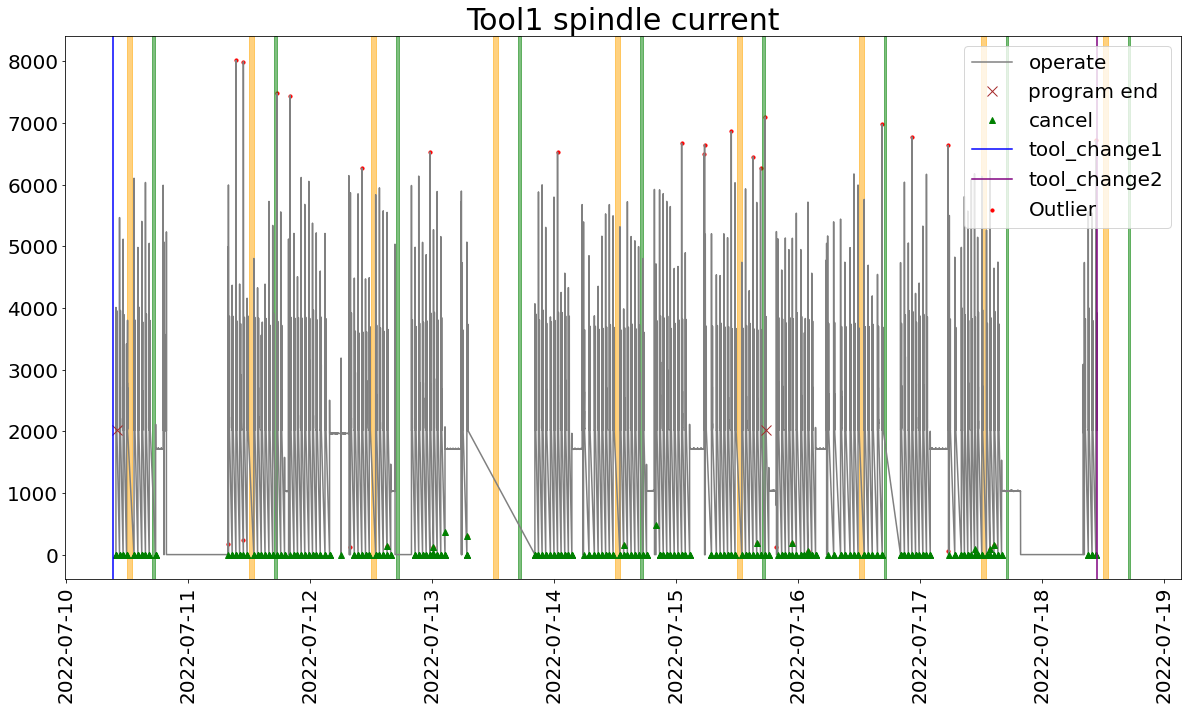

In [134]:
date_list = df_VL04_Tool1_mod3['date'].unique()
df_VL04_Tool1_mod3_cancel = df_VL04_Tool1_mod3[df_VL04_Tool1_mod3['tool_state'] == '취소']
df_VL04_Tool1_mod3_end = df_VL04_Tool1_mod3[df_VL04_Tool1_mod3['tool_state'] == '종료']
df_VL04_Tool1_mod3_change = df_VL04_Tool1_mod3[df_VL04_Tool1_mod3['tool_state'] == '공구교체']


plt.figure(figsize = (20,10))
plt.plot(df_VL04_Tool1_mod3['current_spindle'], label = 'operate', color = 'gray')
plt.plot(df_VL04_Tool1_mod3_end['current_spindle'], linestyle = 'none', marker = 'x', label = 'program end', color = 'brown', markersize = 10)
plt.plot(df_VL04_Tool1_mod3_cancel['current_spindle'], linestyle = 'none', marker = '^', label = 'cancel', color = 'green')
plt.scatter(x, y,label = 'Outlier', color = 'red', s = 10)
# for idx in range(len(df_VL04_Tool1_mod3['shot_no'].unique())):
#     plt.axvline(x = max(df_VL04_Tool1_mod3[(df_VL04_Tool1_mod3['shot_no'] == df_VL04_Tool1_mod3['shot_no'].unique()[idx])].index), color = 'red', linestyle = 'solid')
# for idx2 in range(len(df_VL04_Tool1_mod3['shot_no'].unique())):
#    plt.axvline(x = min(df_VL04_Tool1_mod3[(df_VL04_Tool1_mod3['shot_no'] == df_VL04_Tool1_mod3['shot_no'].unique()[idx2])].index), color = 'blue', linestyle = '--')
for date_idx in range(len(date_list)):
    plt.axvspan(str(date_list[date_idx]) + ' ' + '12:00:00', str(date_list[date_idx]) + ' ' + '13:00:00', color = 'orange', alpha = 0.5)
    plt.axvspan(str(date_list[date_idx]) + ' ' + '17:00:00', str(date_list[date_idx]) + ' ' + '17:30:00', color = 'green', alpha = 0.5)

plt.axvline('2022-07-10 09:20:10', color = 'blue', label = 'tool_change1', linestyle = 'solid')
plt.axvline('2022-07-18 10:52:24', color = 'purple', label = 'tool_change2', linestyle = 'solid')
#     if date_idx == 0:
#         continue
#     else:
#         plt.axvline(str(date_list[date_idx]) + ' ' + '8:00:00', color = 'blue', alpha = 0.5, label = 'change')
# plt.axvspan('2022-07-18 10:52:24', '2022-07-18 11:21:56', color = 'orange', alpha = 0.5, label = 'second tool change')
# plt.axvspan('2022-07-18 11:32:17', '2022-07-18 13:10:45', color = 'green', alpha = 0.5, label = 'lunch time')
plt.legend(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.title('Tool1 spindle current', fontsize = 30)
plt.show()

In [ ]:
plt.plot(df_VL04_Tool1_mod3['current_spindle'])
plt.plot(x, y,label = 'Outlier', color = 'red')
plt.legend()